In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive

**Подтяните необходимый датасет.**

In [27]:
#drive.mount('/content/drive')
#file_path = "/content/drive/My Drive/classification_of_reviews/wb_reviews.csv"

#df = pd.read_csv(file_path)

#df = df.rename(columns={"Good's name": 'Name'})

#df.head()

In [28]:
#drive.mount('/content/drive')
#file_path = "/content/drive/My Drive/classification_of_reviews/mustapp_reviews_total.csv"

#df = pd.read_csv(file_path)

#df = df.drop(['Mustapp page ID'], axis=1)
#df = df.rename(columns={'Title': 'Name', 'Review text': 'Review', 'Score (out of 10)': 'Rating'})

#df.head()

In [29]:
#drive.mount('/content/drive')
#file_path = "/content/drive/My Drive/classification_of_reviews/lamoda_reviews.csv"

#df = pd.read_csv(file_path)

#df.head()

In [30]:
#drive.mount('/content/drive')
#file_path = "/content/drive/My Drive/classification_of_reviews/lamoda_and_wb_reviews.csv"

#df = pd.read_csv(file_path)

#df.head()

In [31]:
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/classification_of_reviews/all_reviews.csv"

df = pd.read_csv(file_path)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Name  \
0  Кроссовки NIKE AIR MAX SC   
1  Кроссовки NIKE AIR MAX SC   
2  Кроссовки NIKE AIR MAX SC   
3  Кроссовки NIKE AIR MAX SC   
4  Кроссовки NIKE AIR MAX SC   

                                         Description  \
0  Кроссовки выполнены из натуральной кожи с текс...   
1  Кроссовки выполнены из натуральной кожи с текс...   
2  Кроссовки выполнены из натуральной кожи с текс...   
3  Кроссовки выполнены из натуральной кожи с текс...   
4  Кроссовки выполнены из натуральной кожи с текс...   

                                              Review  Rating  
0  Отличные кроссовки, очень лёгкие, на ножке акк...      10  
1                       Красивые, стильные, удобные.      10  
2                          Все хорошо. Идет в размер      10  
3  Удобные и красивые, но вся грязь собирается на...       8  
4                            Удобные пока не носоли.      10

**Далее идет анализ выбранного датасета.**

In [32]:
print(df.describe(include='all'))

            Name Description  Review         Rating
count     486920      445787  486917  486920.000000
unique      8751        6644  401406            NaN
top     Футболка  Не найдено       👍            NaN
freq       23543       64521    3758            NaN
mean         NaN         NaN     NaN       8.710983
std          NaN         NaN     NaN       2.077262
min          NaN         NaN     NaN       1.000000
25%          NaN         NaN     NaN       8.000000
50%          NaN         NaN     NaN      10.000000
75%          NaN         NaN     NaN      10.000000
max          NaN         NaN     NaN      10.000000


Подтянем для начала анализ из базового анализа датасета.

<Axes: ylabel='count'>

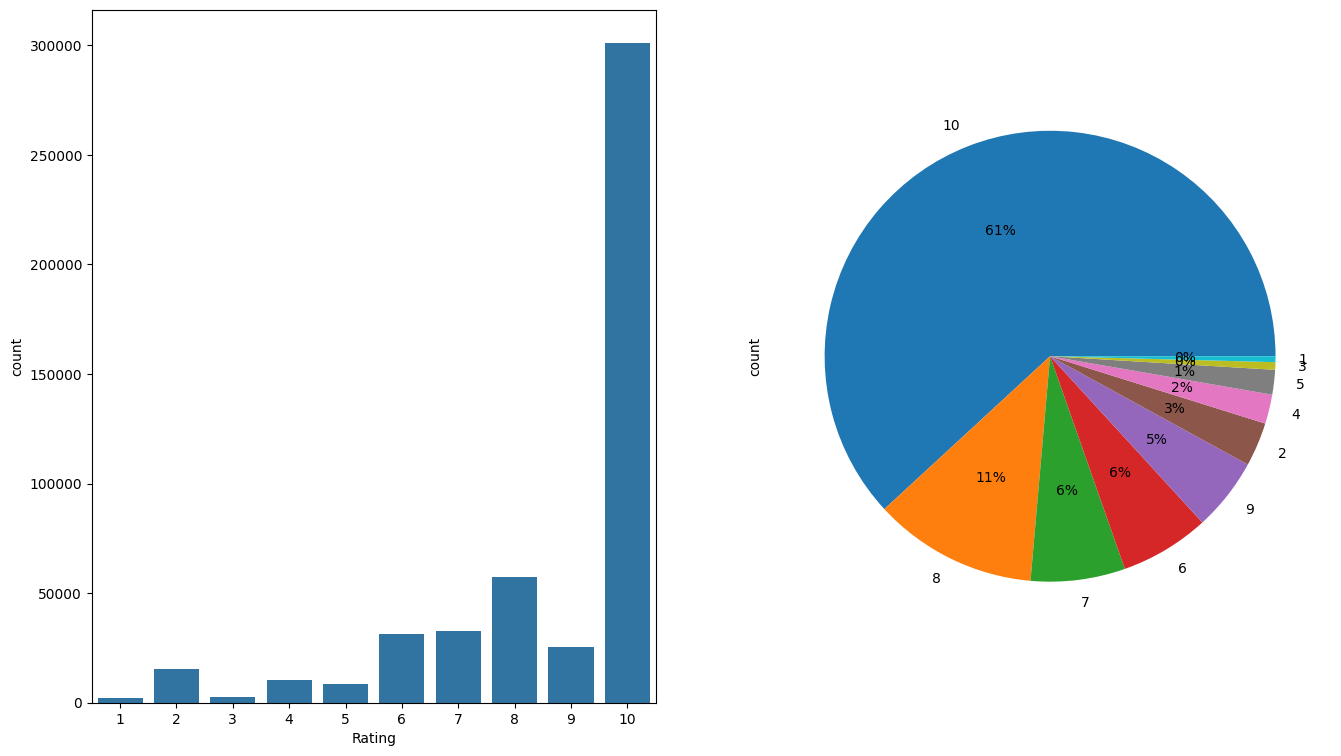

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x="Rating", data=df, ax=axes[0])
df["Rating"].value_counts().plot(kind = "pie", autopct = "%.d%%", ax=axes[1])

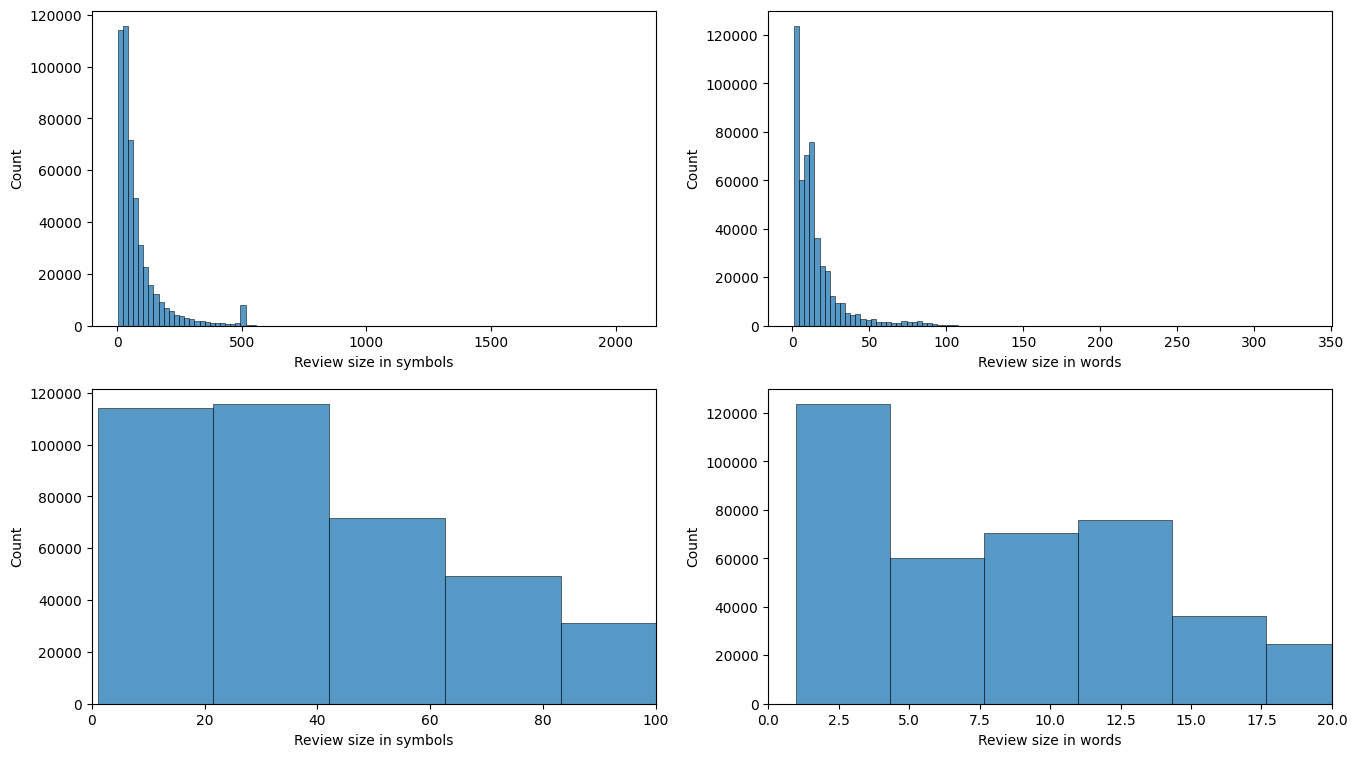

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Считаем относительно символов
df["Review size in symbols"] = df["Review"].apply(lambda x: len(str(x)))
sns.histplot(data=df["Review size in symbols"], ax=axes[0, 0], bins=100)

#Считаем относительно количества слов
df["Review size in words"] = df["Review"].apply(lambda x: len(str(x).split(' ')))
sns.histplot(data=df["Review size in words"], ax=axes[0, 1], bins=100)

#Теперь посмотрим на аналогичное, но приблизим на начало

#Считаем относительно символов
sns.histplot(data=df["Review size in symbols"], ax=axes[1, 0], bins=100)
axes[1, 0].set_xlim(0, 100)

#Считаем относительно количества слов
sns.histplot(data=df["Review size in words"], ax=axes[1, 1], bins=100)
axes[1, 1].set_xlim(0, 20)

plt.show()

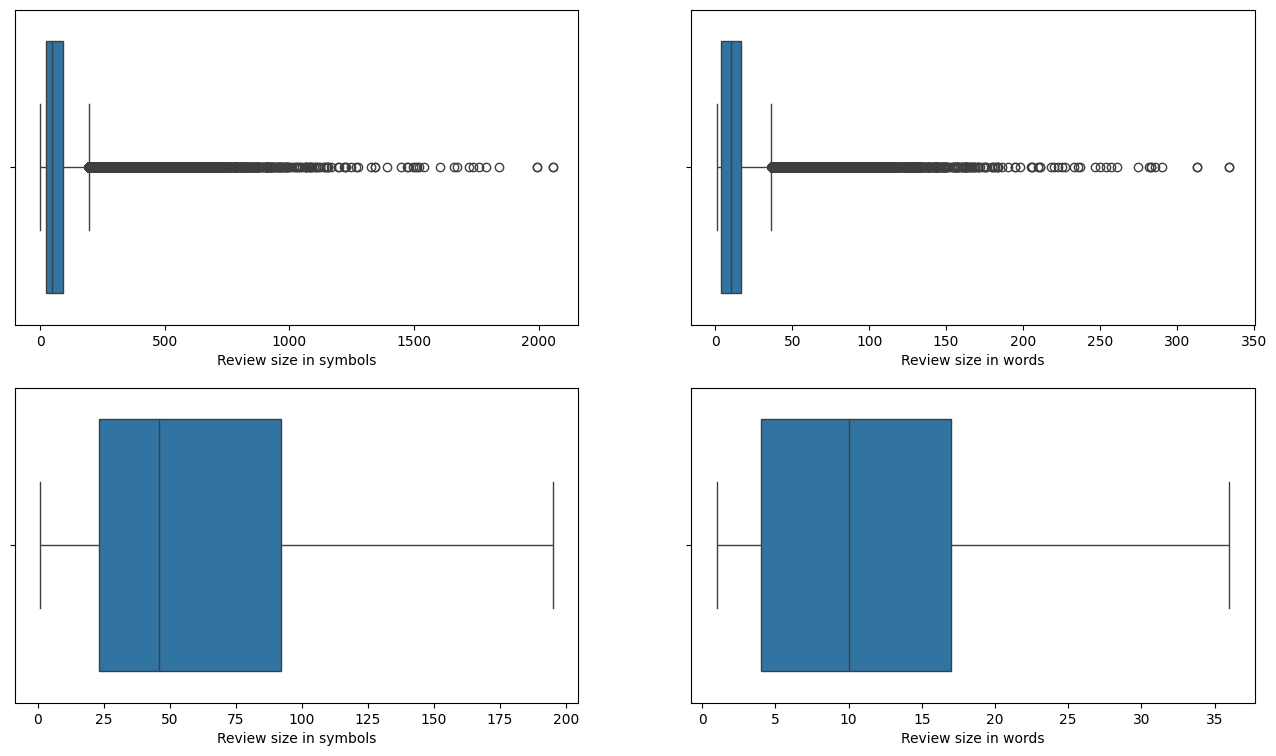

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Size in symbols
sns.boxplot(x="Review size in symbols", data=df, ax=axes[0, 0])

#Size in words
sns.boxplot(x="Review size in words", data=df, ax=axes[0, 1])

#Size in symbols without fliers
sns.boxplot(x="Review size in symbols", data=df, ax=axes[1, 0], showfliers=False)

#Size in words without fliers
sns.boxplot(x="Review size in words", data=df, ax=axes[1, 1], showfliers=False)

plt.show()

In [36]:
!pip install nbformat>=4.2.0

In [37]:
df['review_length'] = df['Review'].str.len()

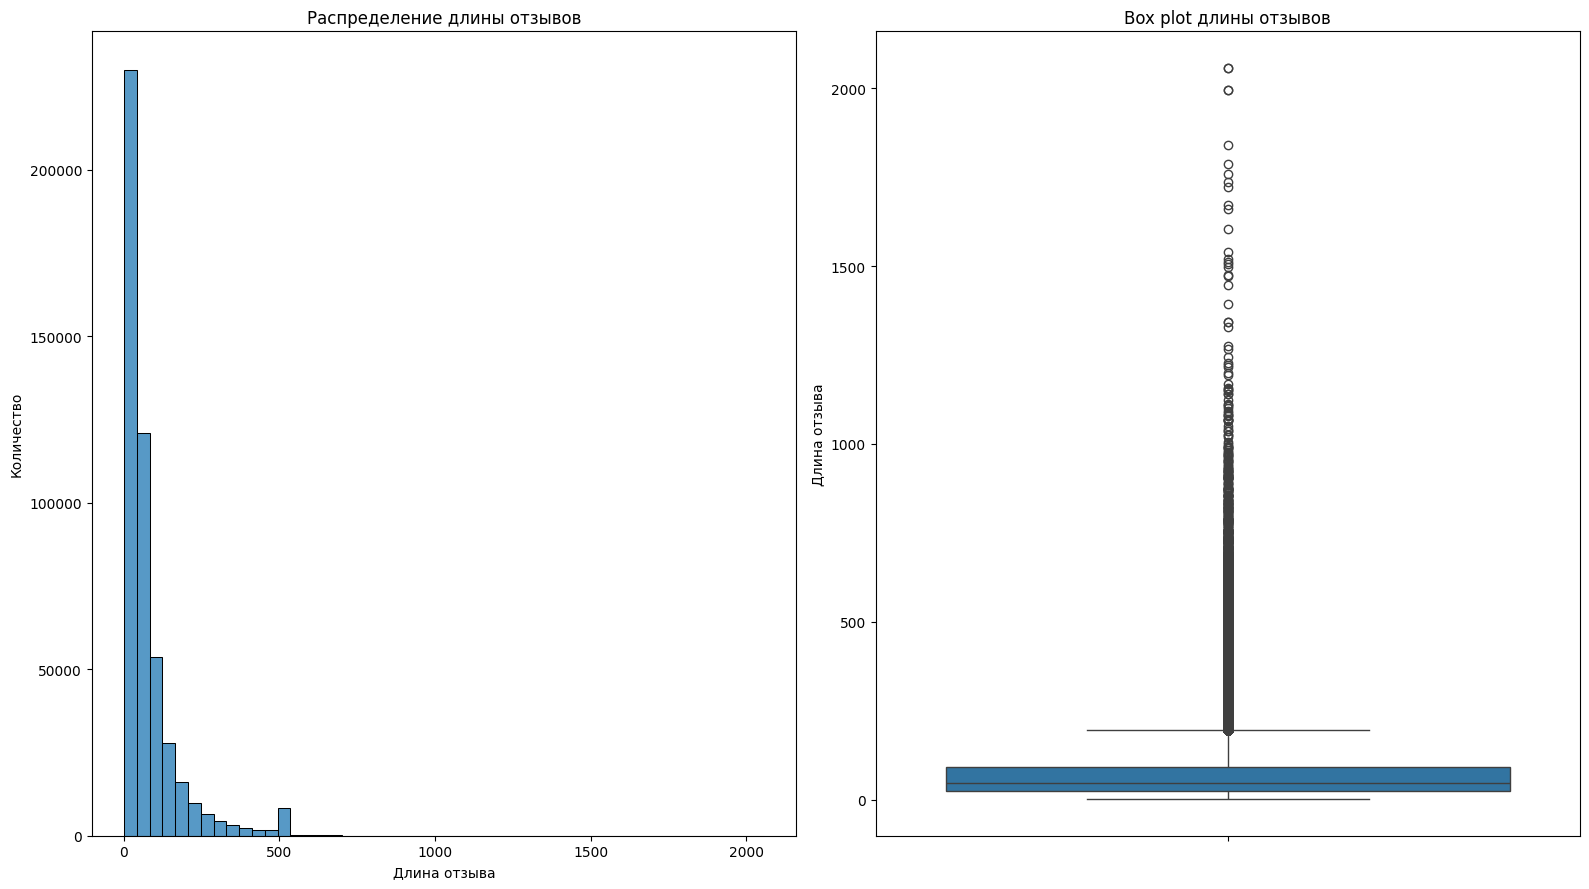


Корреляция между длиной отзыва и оценкой: -0.175


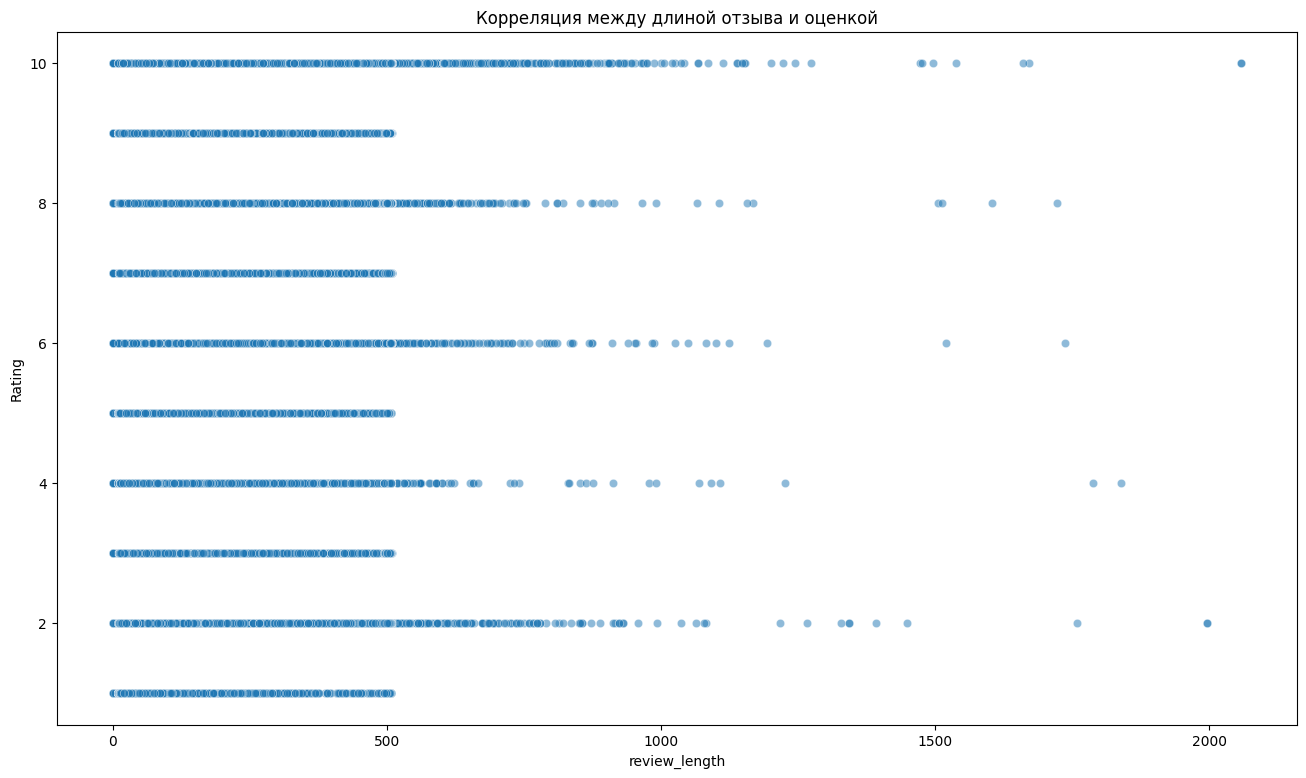


Анализ выбросов:
Количество выбросов: 42251
Процент выбросов: 8.68%

Средняя оценка для обычных отзывов: 8.80
Средняя оценка для очень длинных отзывов: 7.79


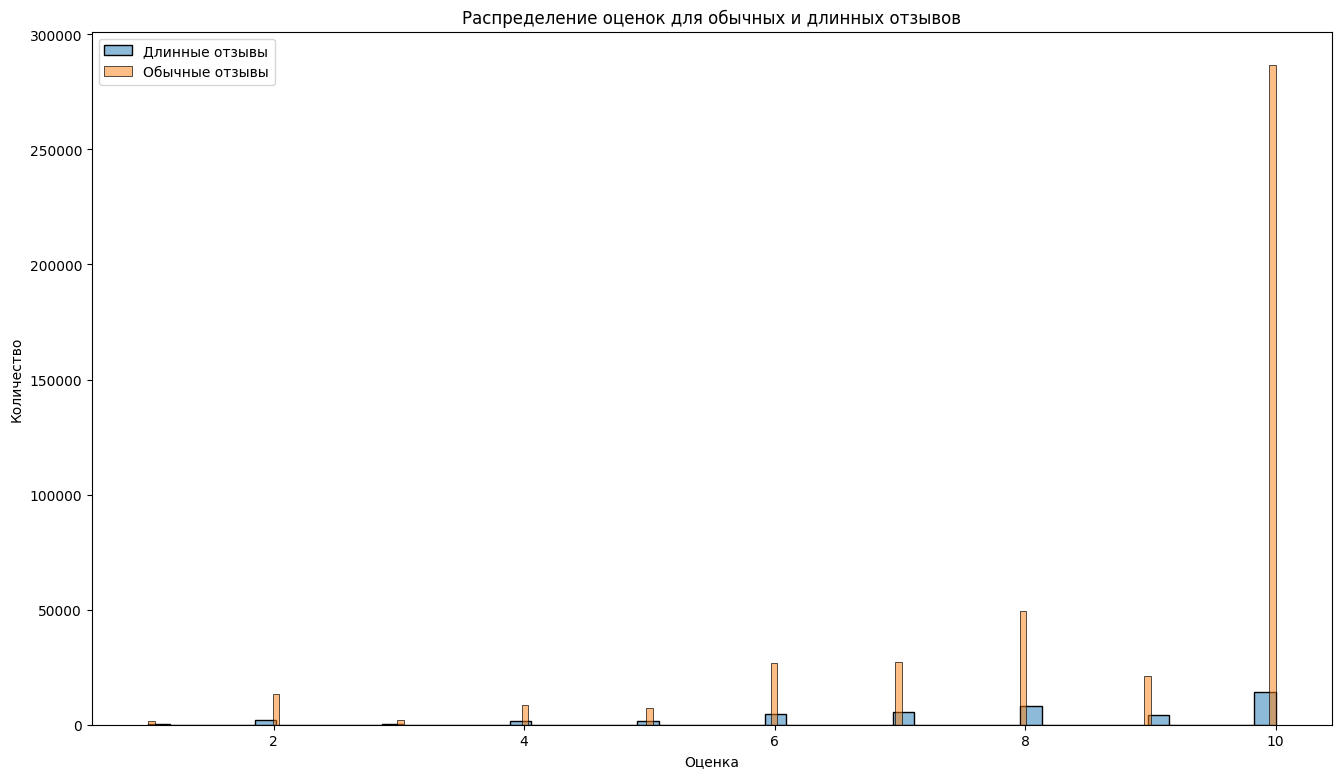


Топ-10 самых частых смайликов:
👍: 15499


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


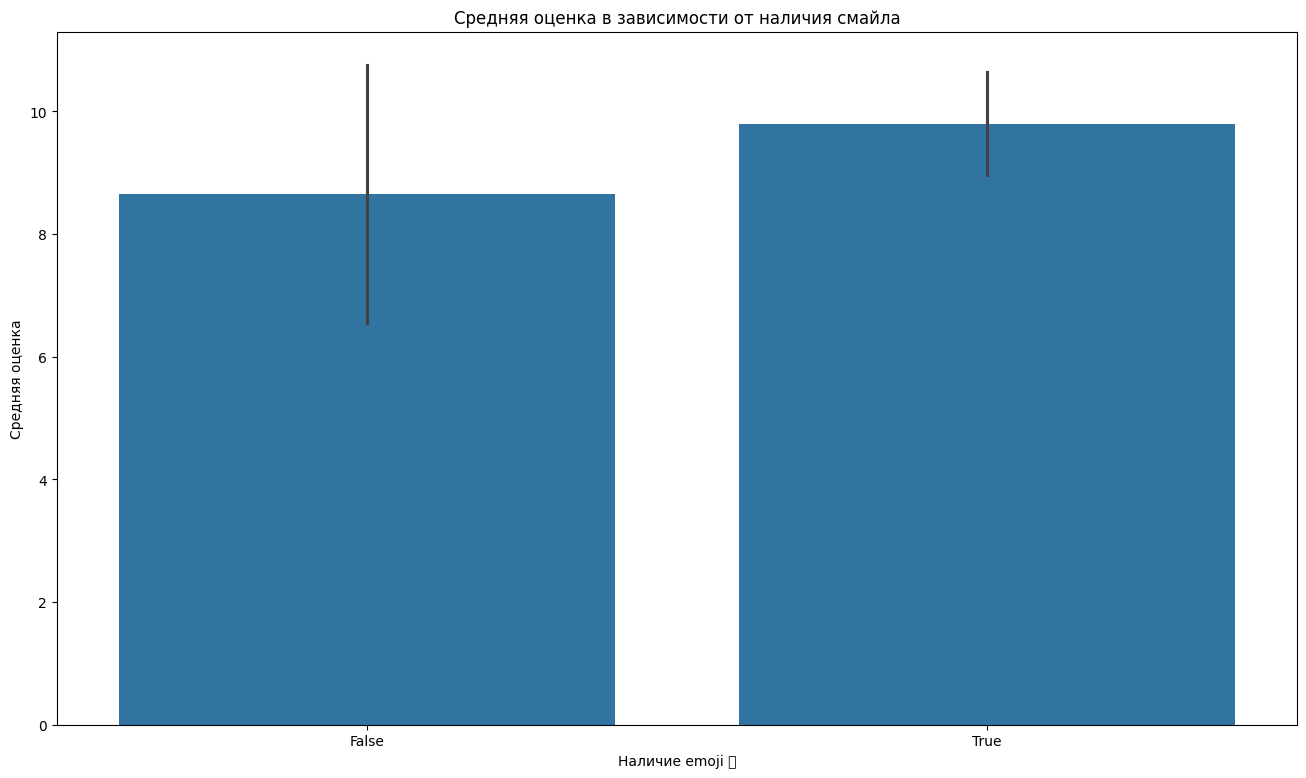

🔥: 3514


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


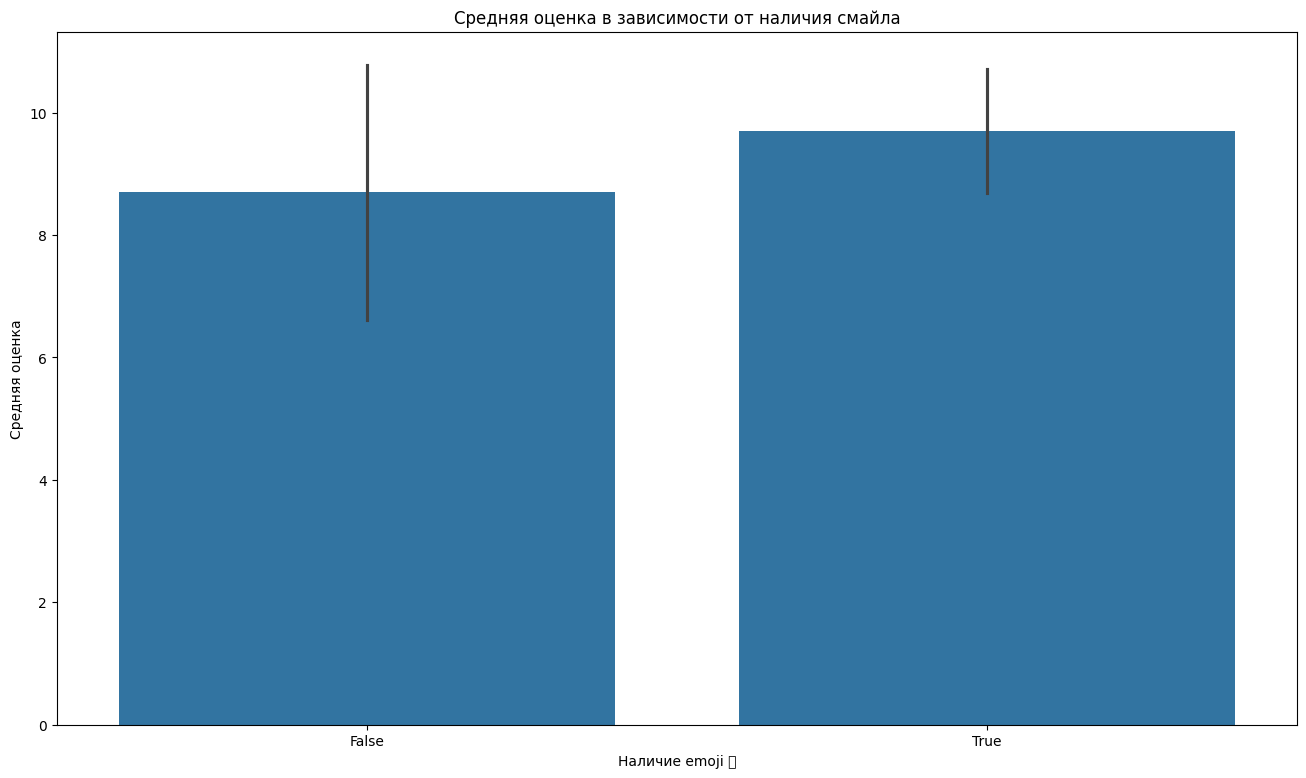

👍🏻: 2674


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


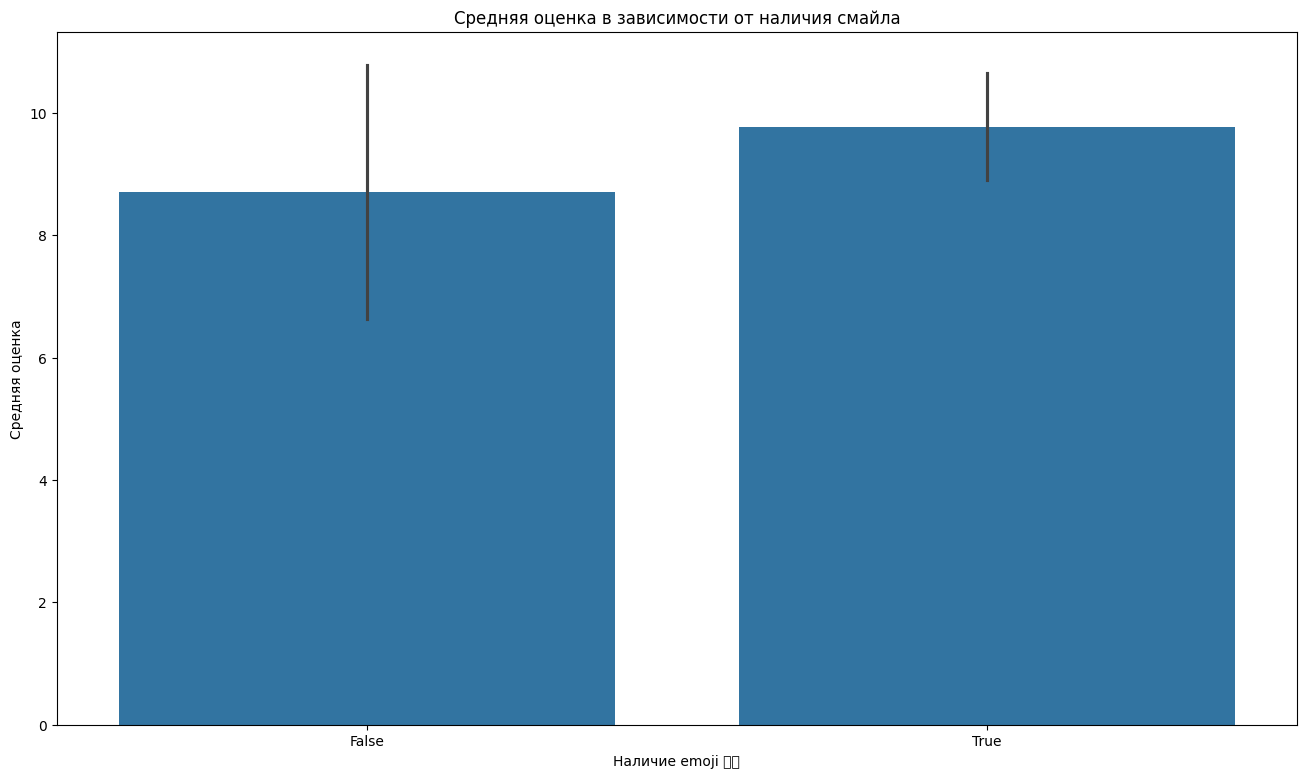

❤️: 2554


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


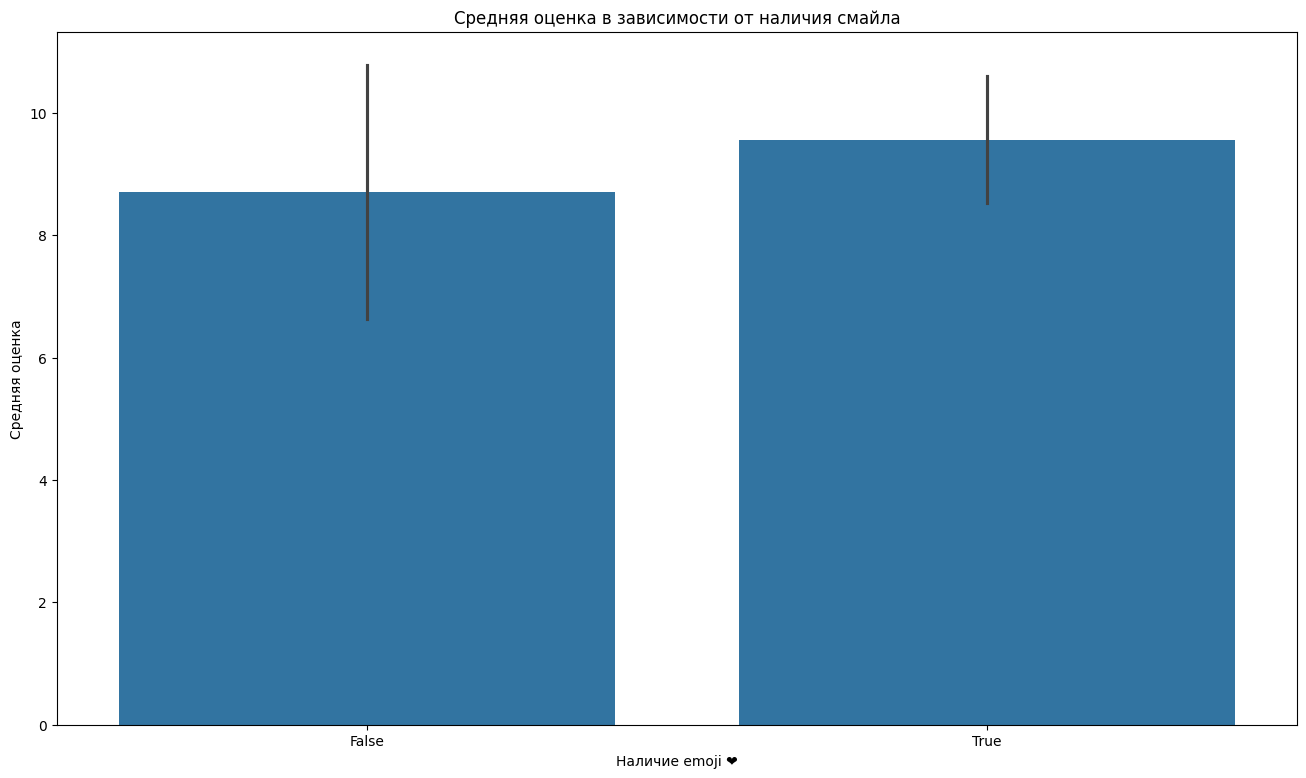

😍: 2244


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


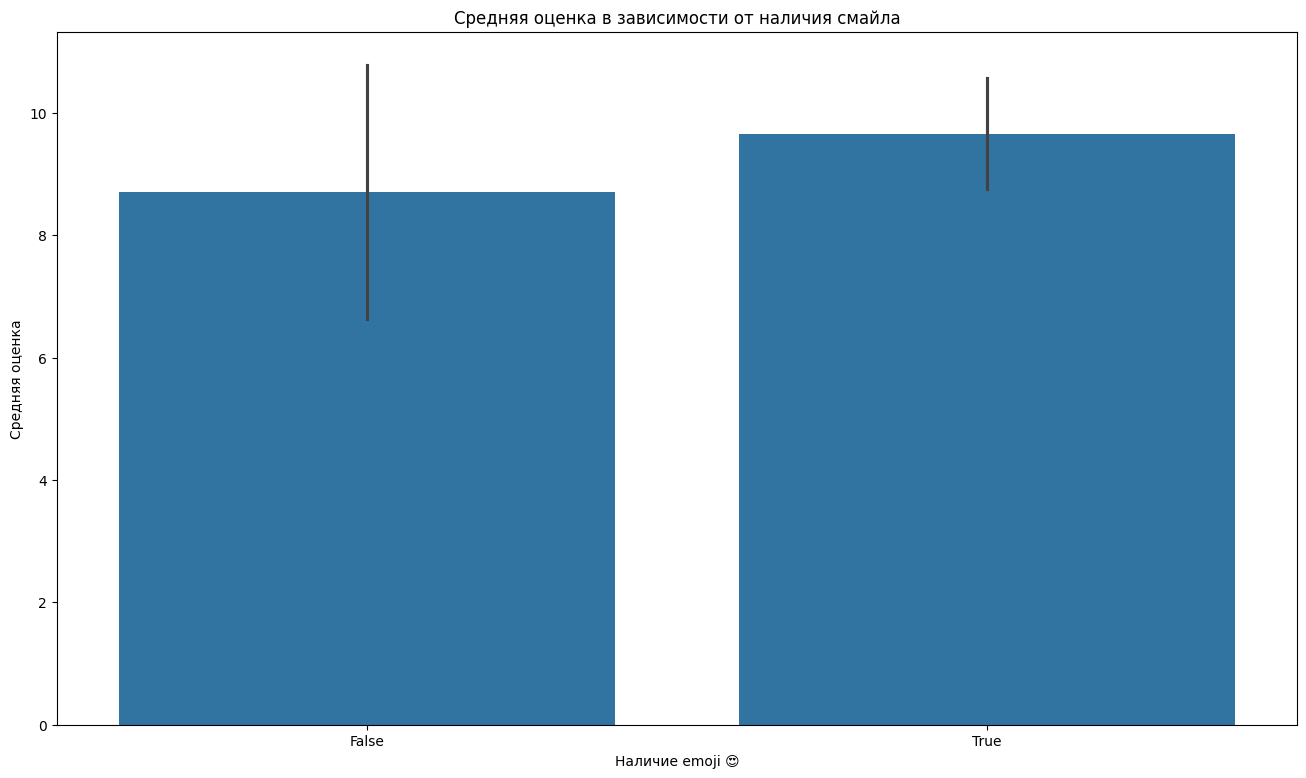

👌: 1870


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


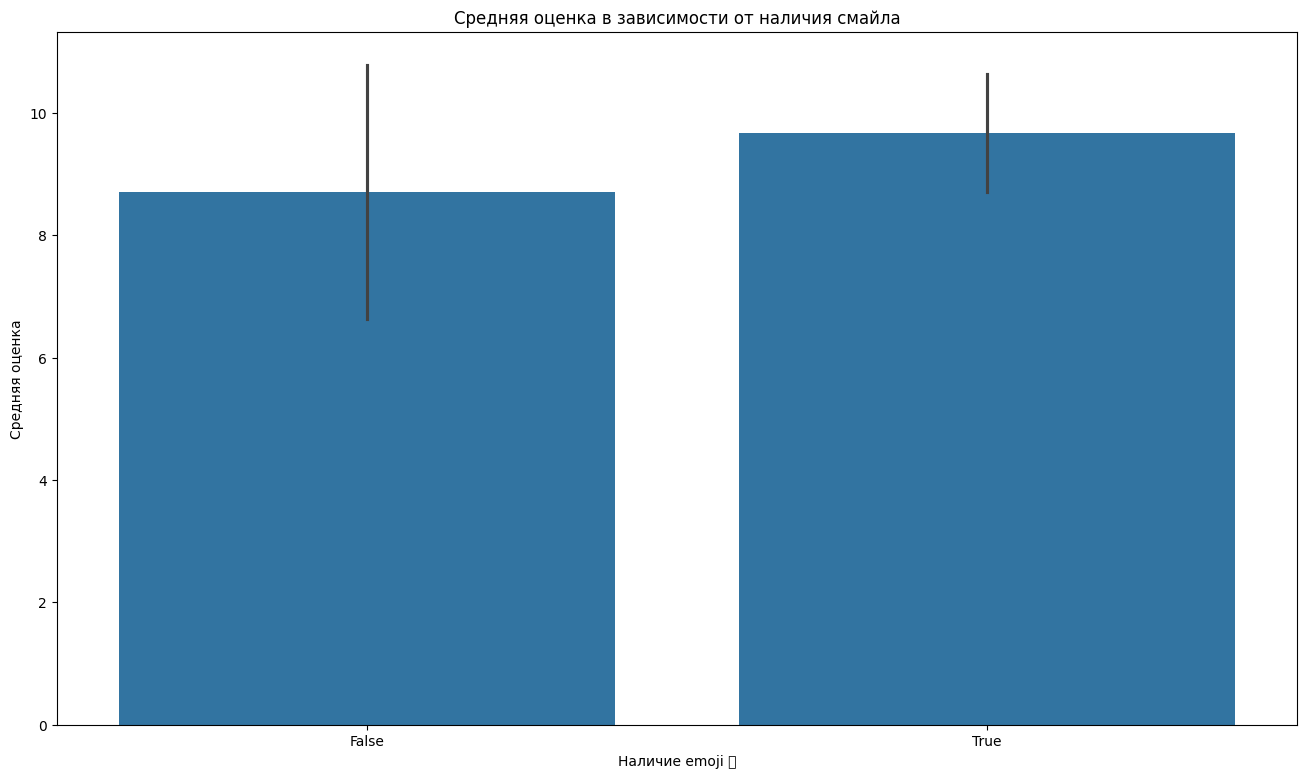

👍👍👍: 1702


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


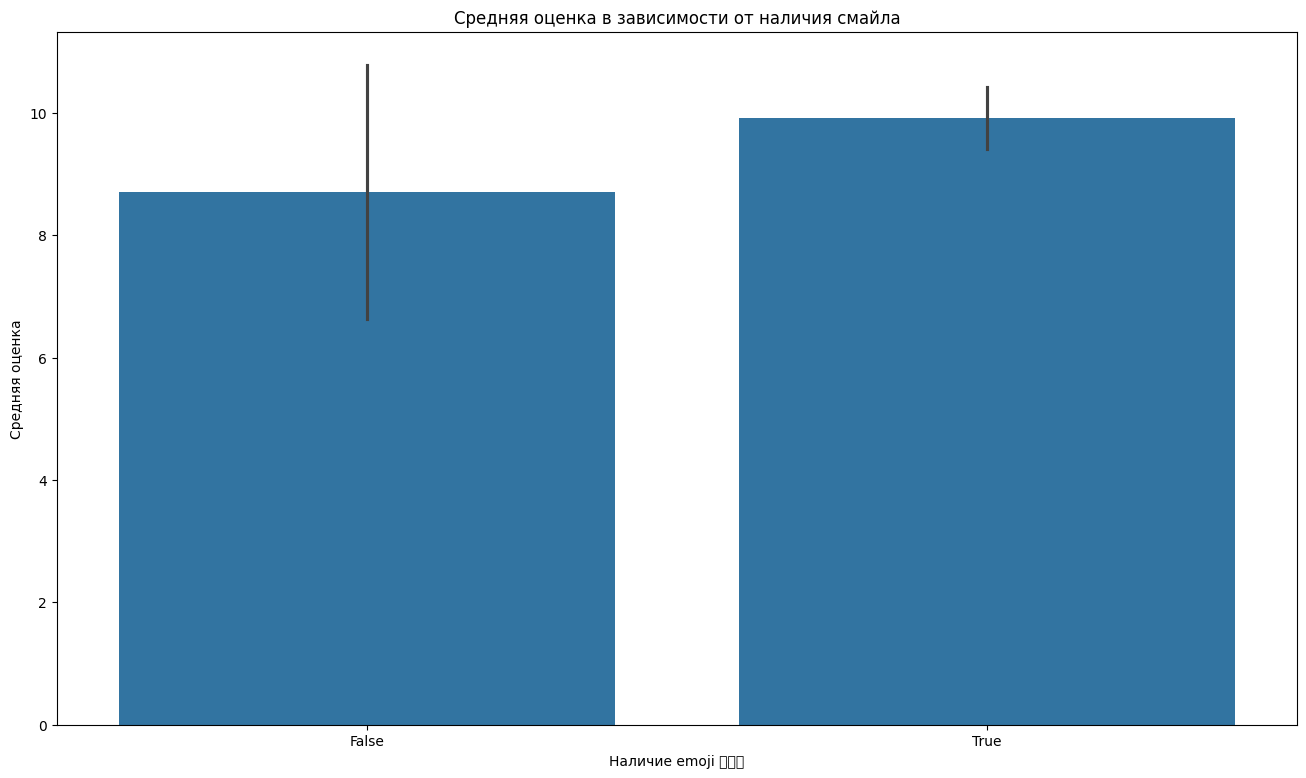

😂: 899


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


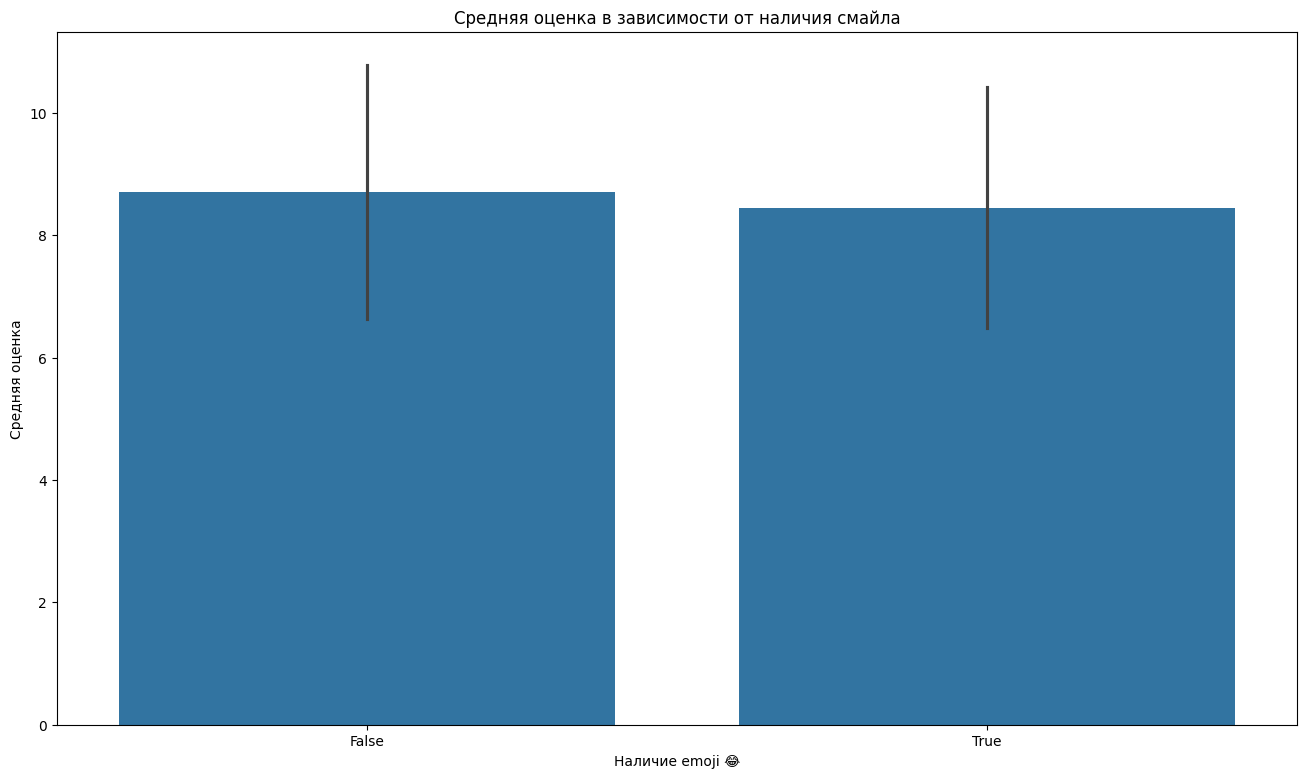

💔: 896


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


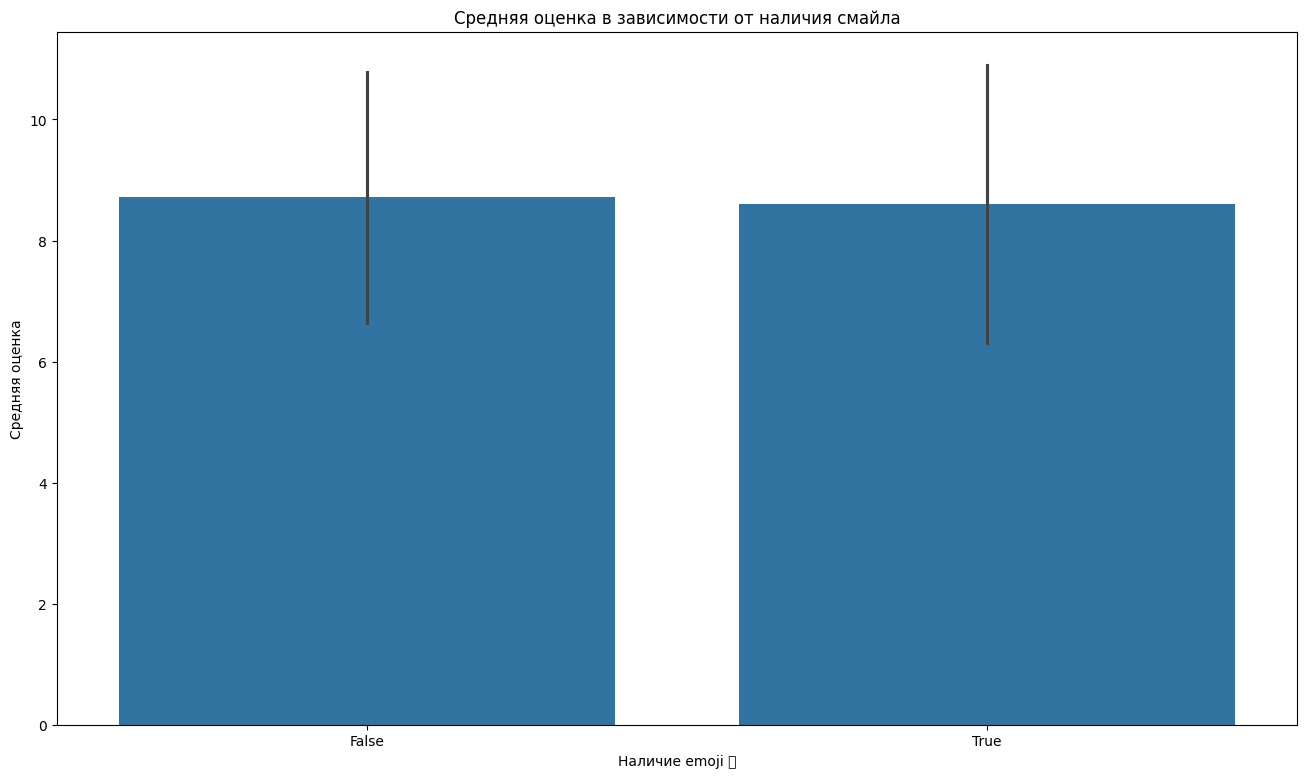

👍🏼: 852


<ipython-input-38-0396009ae765>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127996 (\N{EMOJI MODIFIER FITZPATRICK TYPE-3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


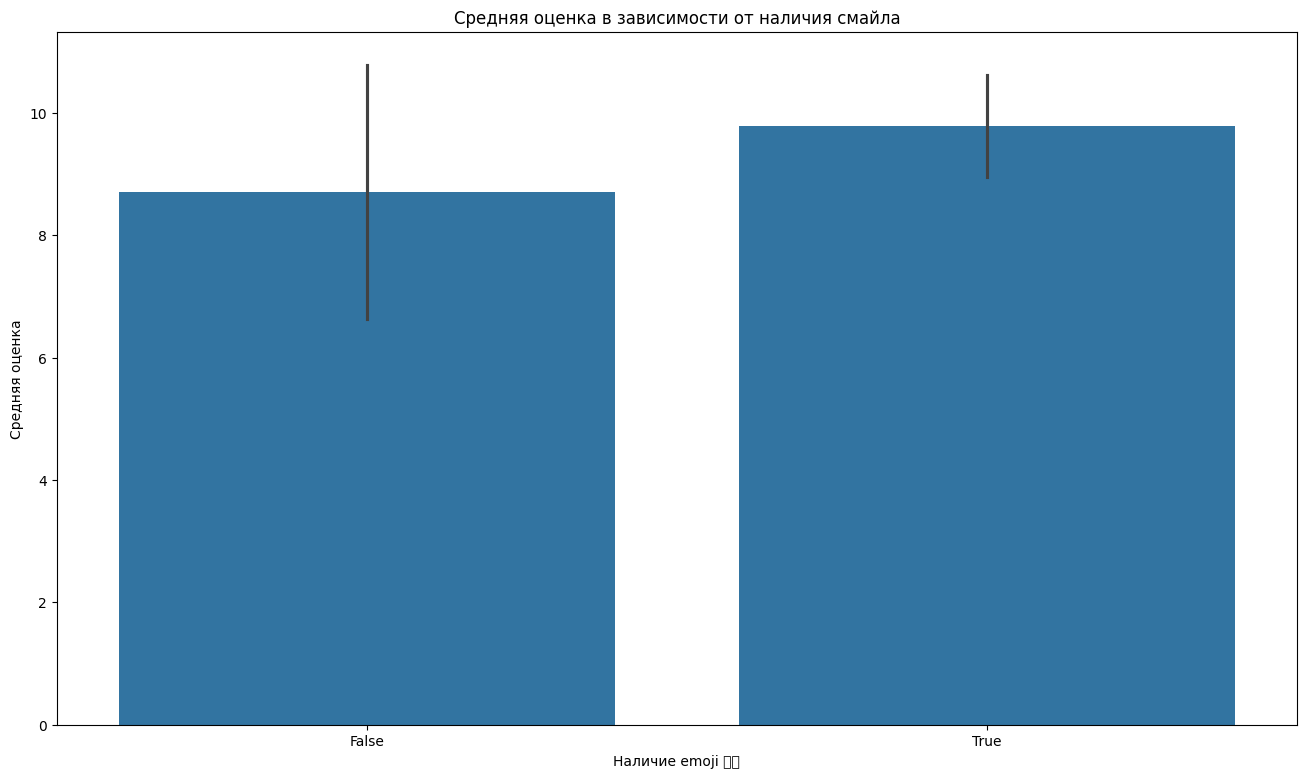


Корреляция между количеством смайликов и оценкой: 0.073


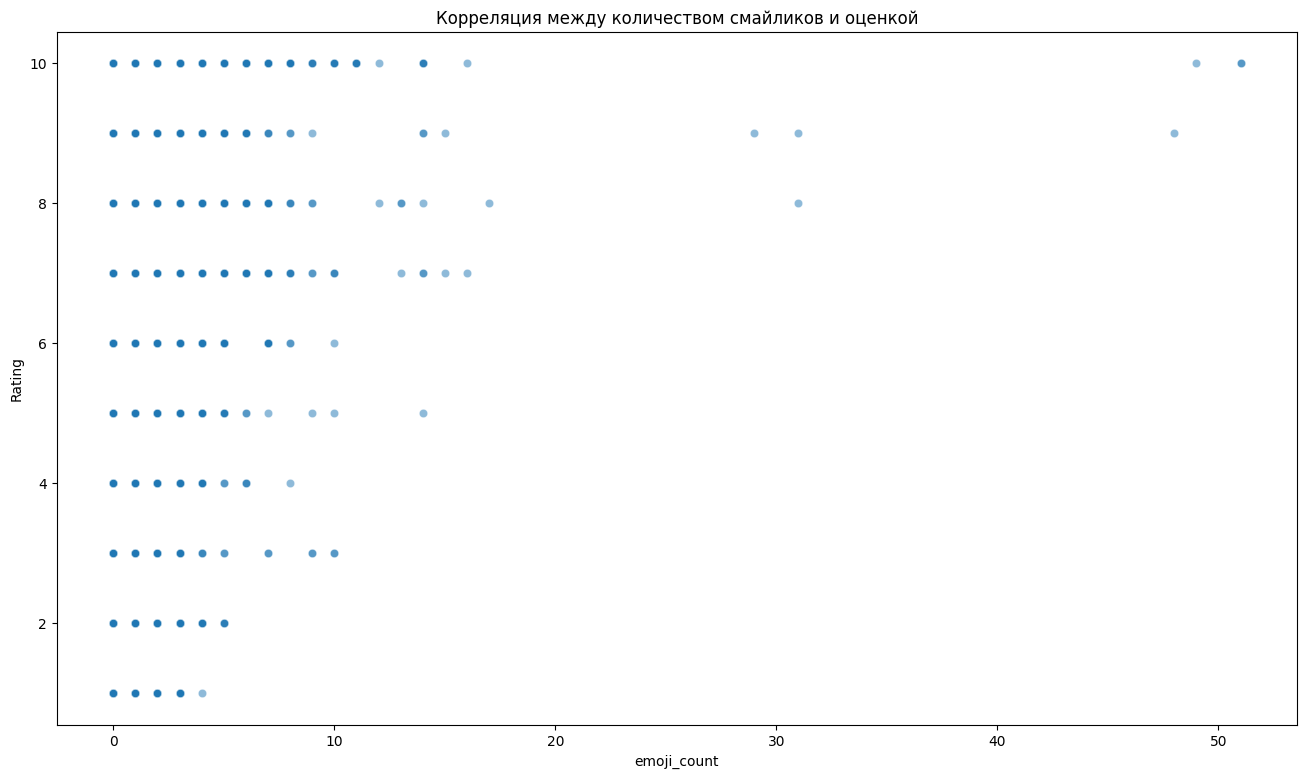

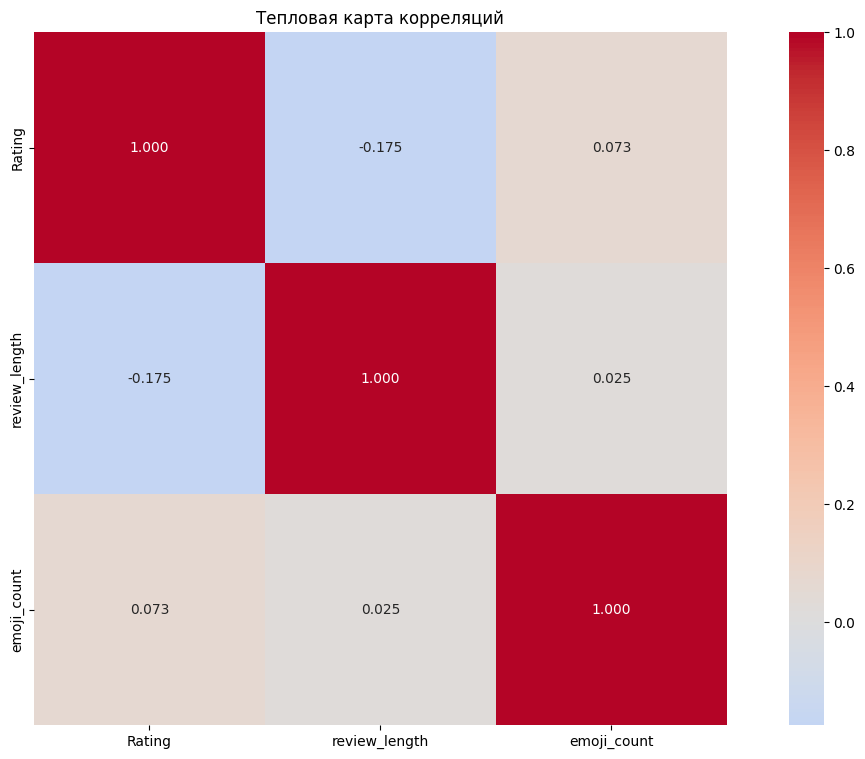

In [38]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box plot длины отзывов')
plt.ylabel('Длина отзыва')

plt.tight_layout()
plt.show()

Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers_mask = df['review_length'] > outlier_threshold

correlation = df['review_length'].corr(df['Rating'])
print(f"\nКорреляция между длиной отзыва и оценкой: {correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='review_length', y='Rating', alpha=0.5)
plt.title('Корреляция между длиной отзыва и оценкой')
plt.show()

print("\nАнализ выбросов:")
print(f"Количество выбросов: {outliers_mask.sum()}")
print(f"Процент выбросов: {(outliers_mask.sum() / len(df)) * 100:.2f}%")

print(f"\nСредняя оценка для обычных отзывов: {df[~outliers_mask]['Rating'].mean():.2f}")
print(f"Средняя оценка для очень длинных отзывов: {df[outliers_mask]['Rating'].mean():.2f}")

plt.figure(figsize=(16, 9))
sns.histplot(data=df[outliers_mask], x='Rating', label='Длинные отзывы', alpha=0.5)
sns.histplot(data=df[~outliers_mask], x='Rating', label='Обычные отзывы', alpha=0.5)
plt.title('Распределение оценок для обычных и длинных отзывов')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()

from collections import Counter
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

all_emojis = []
for review in df['Review']:
    if isinstance(review, str):
        all_emojis.extend(extract_emojis(review))

emoji_counts = Counter(all_emojis)

print("\nТоп-10 самых частых смайликов:")
for emoji, count in emoji_counts.most_common(10):
    print(f"{emoji}: {count}")
    edf = df
    edf["has_emoji"] = edf["Review"].apply(lambda x: x != None and emoji in str(x))
    fig = plt.figure(figsize=(16, 9))
    sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
    plt.xlabel(f"Наличие emoji {emoji}")
    plt.ylabel("Средняя оценка")
    plt.title("Средняя оценка в зависимости от наличия смайла")
    plt.show()

df['emoji_count'] = df['Review'].apply(lambda x: len(extract_emojis(str(x))) if isinstance(x, str) else 0)

emoji_correlation = df['emoji_count'].corr(df['Rating'])
print(f"\nКорреляция между количеством смайликов и оценкой: {emoji_correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='emoji_count', y='Rating', alpha=0.5)
plt.title('Корреляция между количеством смайликов и оценкой')
plt.show()

plt.figure(figsize=(16, 9))
sns.heatmap(df[['Rating', 'review_length', 'emoji_count']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.3f',
            square=True)
plt.title('Тепловая карта корреляций')
plt.show()





In [39]:
!pip install stop_words

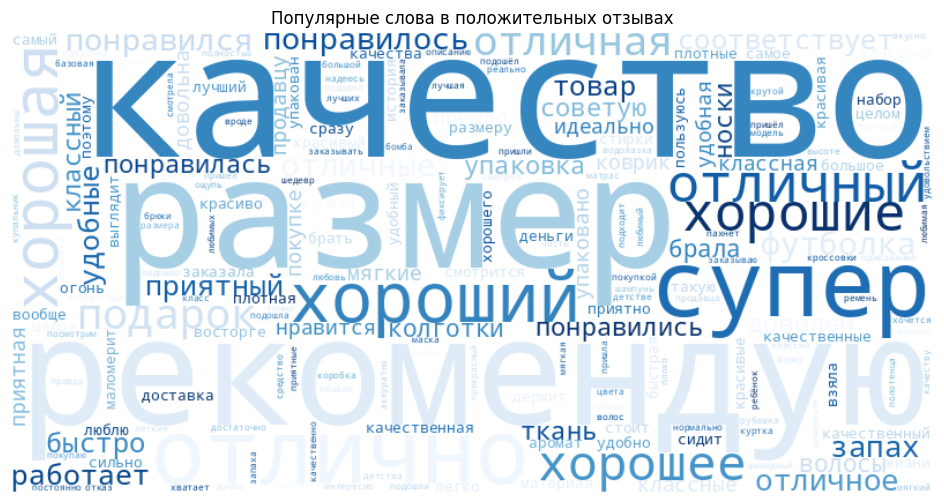

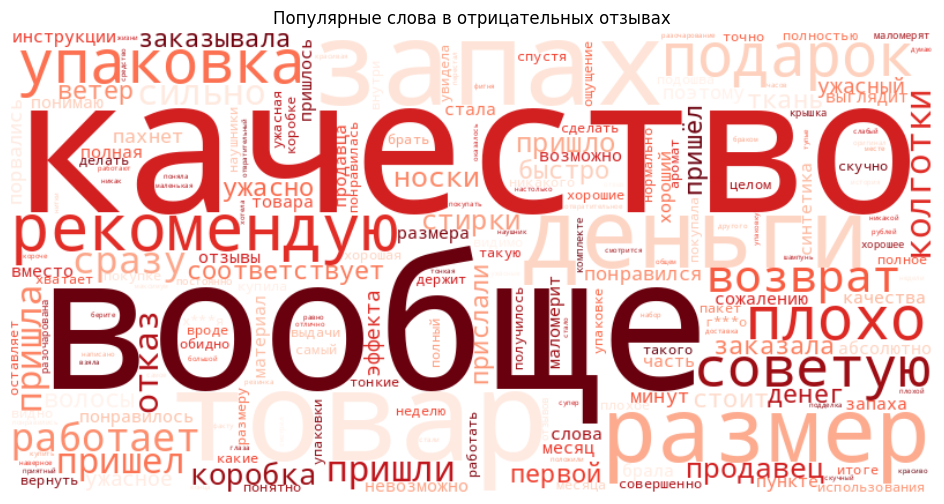

In [40]:
import os
from stop_words import get_stop_words
from wordcloud import WordCloud
from collections import Counter

STOPWORDS_RU = get_stop_words('russian')
STOPWORDS_RU += ['фильм', 'фильма', 'фильме', 'фильмы', 'фильмов', 'сериал', 'сериала', 'сериале', 'сериалов', 'кино',
                'драма', 'комедия', 'боевик', 'ужасы', 'триллер', 'фантастика',
                'актёр', 'режиссёр', 'сценарий', 'персонаж', 'роль', 'сюжет',
                'сцена', 'момент', 'смотреть', 'посмотреть', 'кадр', 'экран', 'оператор', 'фильм', 'фильма', 'фильме', 'фильмов', 'фильму', 'фильмом', 'фильмам', 'фильмами', 'фильмах',
                'сериал', 'сериала', 'сериале', 'сериалов', 'сериалу', 'сериалом', 'сериалам', 'сериалами', 'сериалах',
                'кино', 'кинотеатр', 'кинематограф', 'кинолента', 'кинокартина', 'кинематография',
                'актёр', 'актёры', 'актер', 'актеры', 'режиссёр', 'режиссеры', 'режиссура',
                'персонаж', 'персонажи', 'герой', 'герои', 'главный', 'главная', 'главное',
                'роль', 'роли', 'каст', 'озвучка', 'озвучивание',
                'сюжет', 'сюжета', 'сюжете', 'линия', 'линии', 'момент', 'момента', 'моменте', 'моменты',
                'кадр', 'кадры', 'оператор', 'операторская', 'работа', 'сценарий', 'сценария', 'сценарии',
                'жанр', 'жанры', 'драма', 'комедия', 'боевик', 'ужасы', 'триллер', 'фантастика', 'мелодрама', 'аниме',
                'смотреть', 'посмотреть', 'просмотр', 'просмотра', 'просмотре', 'видел', 'видела', 'видеть', 'видится',
                'экран', 'экрана', 'экране', 'экранам', 'экранный', 'графика', 'графику', 'графике', 'анимация', 'анимации',
                'эффект', 'эффекты', 'спецэффекты', 'музыка', 'саундтрек', 'озвучивание', 'звук', 'звуки', 'постановка',
                'трек', 'треков', 'треке', 'саунд', 'саунды', 'композитор', 'автор', 'сценарист', 'досмотреть', 'части', 'серии', 'игра', 'героя']

CURSE_WORDS = []
with open(os.path.join(os.getcwd(), 'curse.txt'), 'r') as f:
    CURSE_WORDS.append(f.read())
CURSE_WORDS = CURSE_WORDS[0].replace('\n\n', ' ')
CURSE_WORDS = CURSE_WORDS.split(' ')

positive_reviews = df[df['Rating'] >= 7]['Review']
negative_reviews = df[df['Rating'] <= 4]['Review']

def censor_word(word):
    return word[0] + '*' * (len(word) - 2) + word[-1] if len(word) > 2 else word

def censor_text(text):
    return censor_word(text) if text in CURSE_WORDS else text

def extract_ru_words(text):
    words = re.findall(r'\b[а-яА-ЯёЁ]{5,}\b', str(text).lower())
    return [word for word in words if word not in STOPWORDS_RU]

positive_words = Counter(censor_text(word) for review in positive_reviews for word in extract_ru_words(review))
negative_words = Counter(censor_text(word) for review in negative_reviews for word in extract_ru_words(review))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues', stopwords=STOPWORDS_RU).generate_from_frequencies(positive_words)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Популярные слова в положительных отзывах')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_words)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Популярные слова в отрицательных отзывах')
plt.show()

Топ-20 самых частых слов во всем датасете:
       Слово  Частота
0          и   135341
1         не   129157
2          в   110202
3         на    84211
4      очень    67470
5         но    51279
6        что    40163
7          с    38108
8      фильм    37821
9        все    37760
10       как    35497
11  качество    29744
12       это    27885
13    хорошо    27222
14         я    26000
15       для    25533
16        за    23388
17    размер    22816
18        по    21996
19         а    21463

Топ-20 самых частых биграмм во всем датасете:
               Биграмма  Частота
0           (в, размер)     6820
1               (и, не)     6132
2         (на, подарок)     4667
3   (качество, хорошее)     4347
4         (этот, фильм)     4208
5   (хорошее, качество)     4083
6             (то, что)     3682
7         (первый, раз)     3674
8          (в, подарок)     3614
9            (в, целом)     3585
10         (к, покупке)     3530
11            (у, меня)     3153
12             (но,

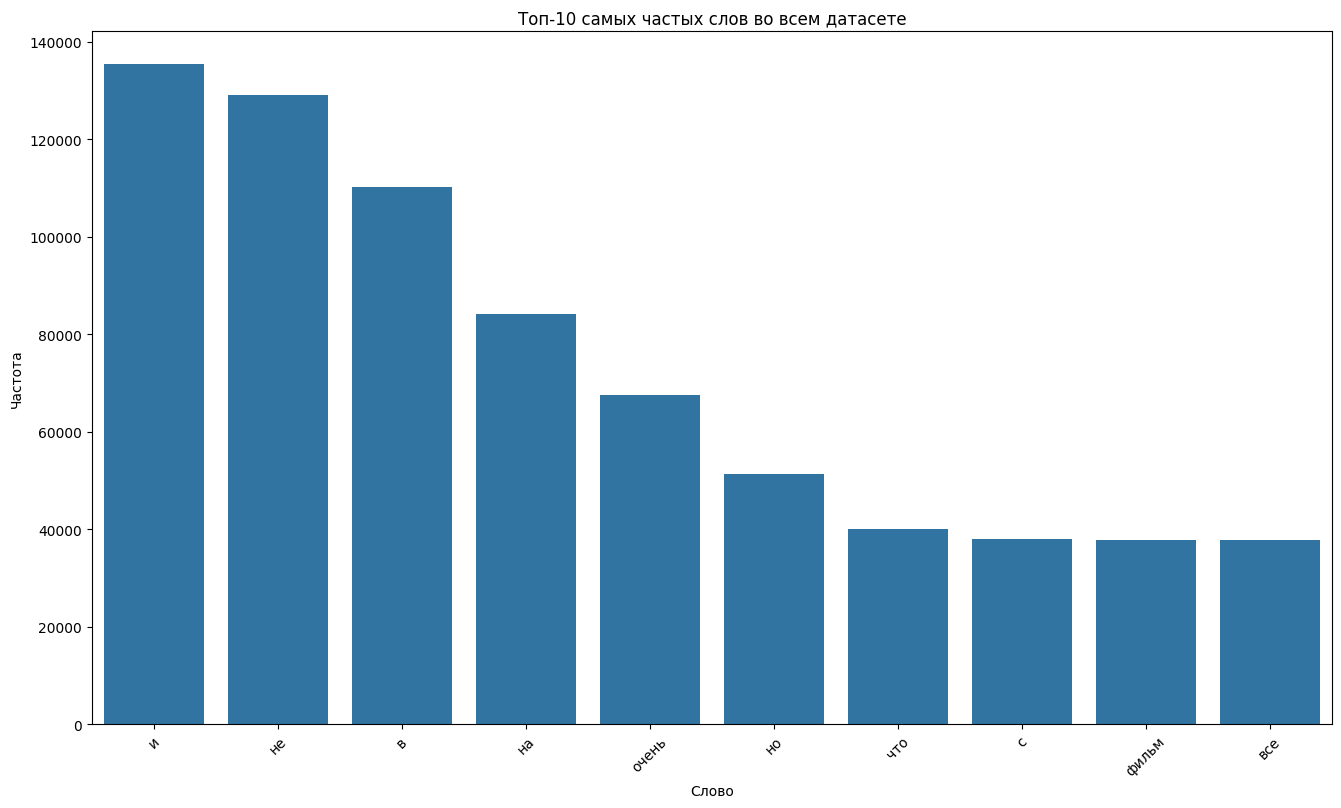

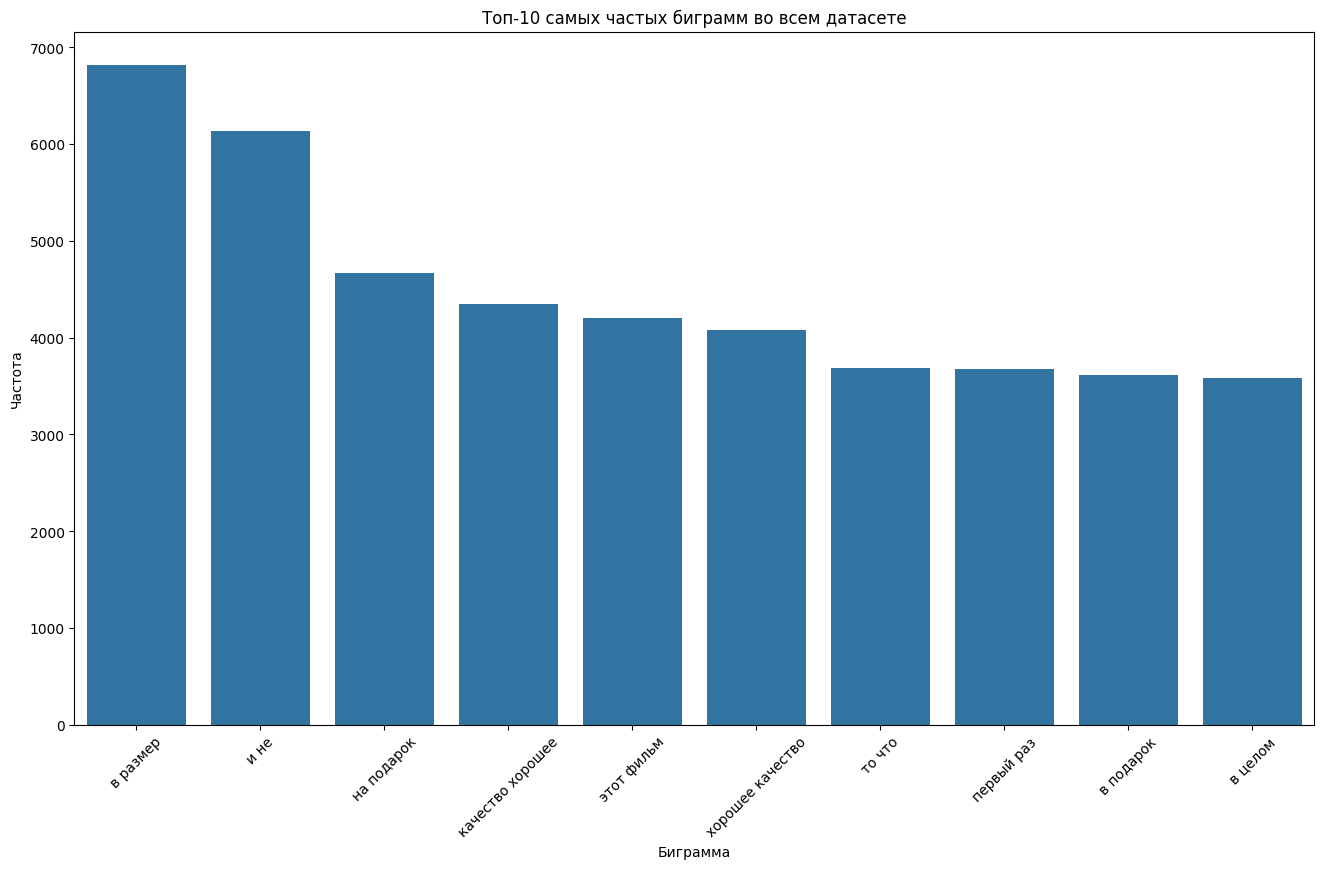

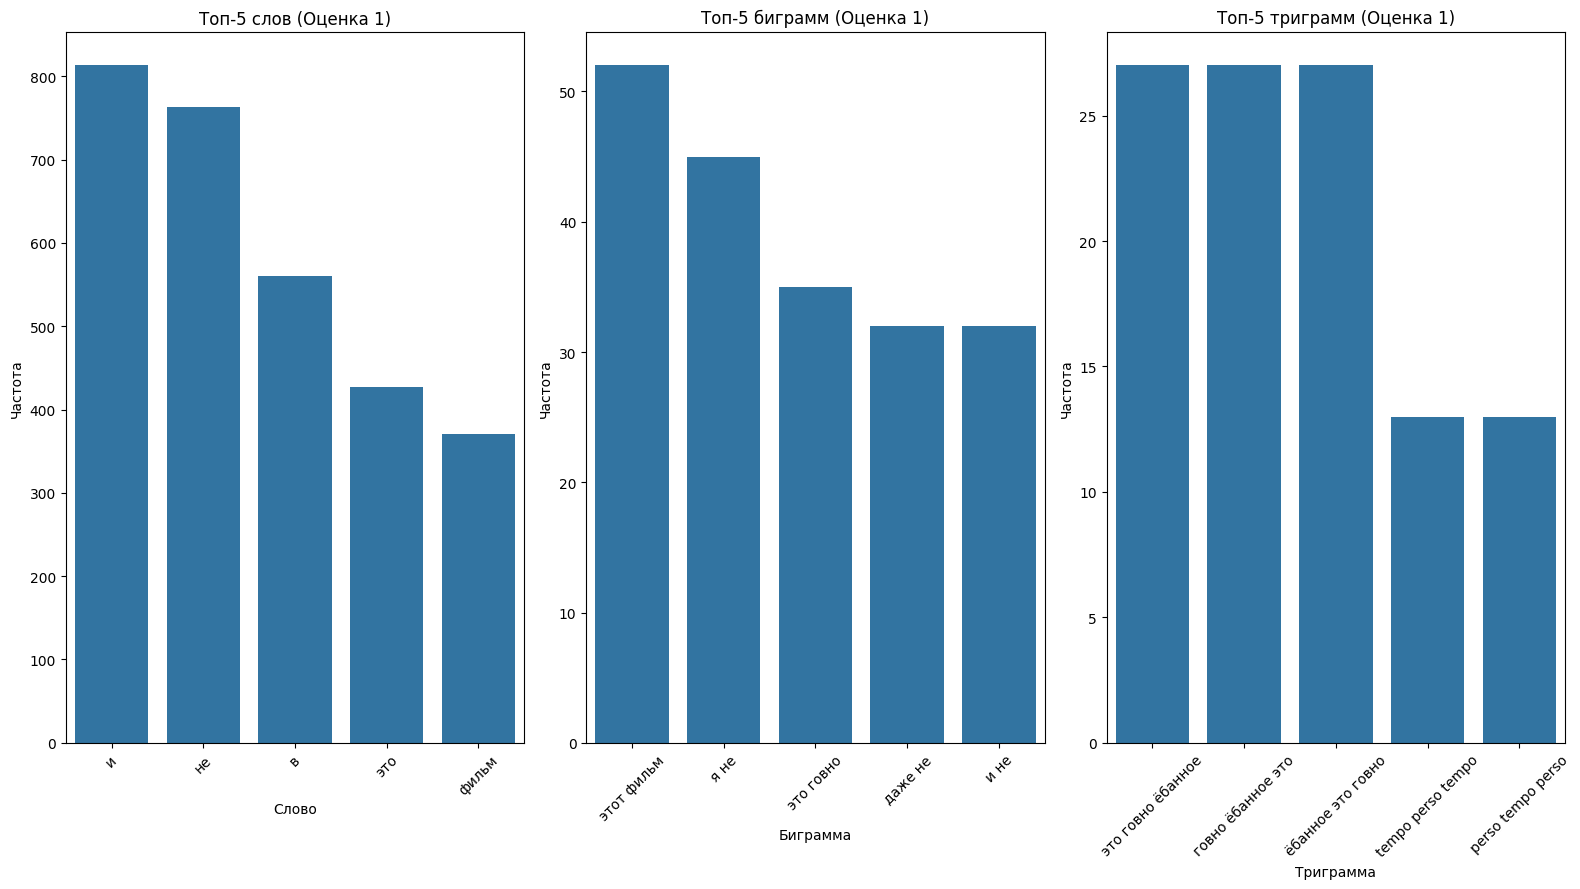

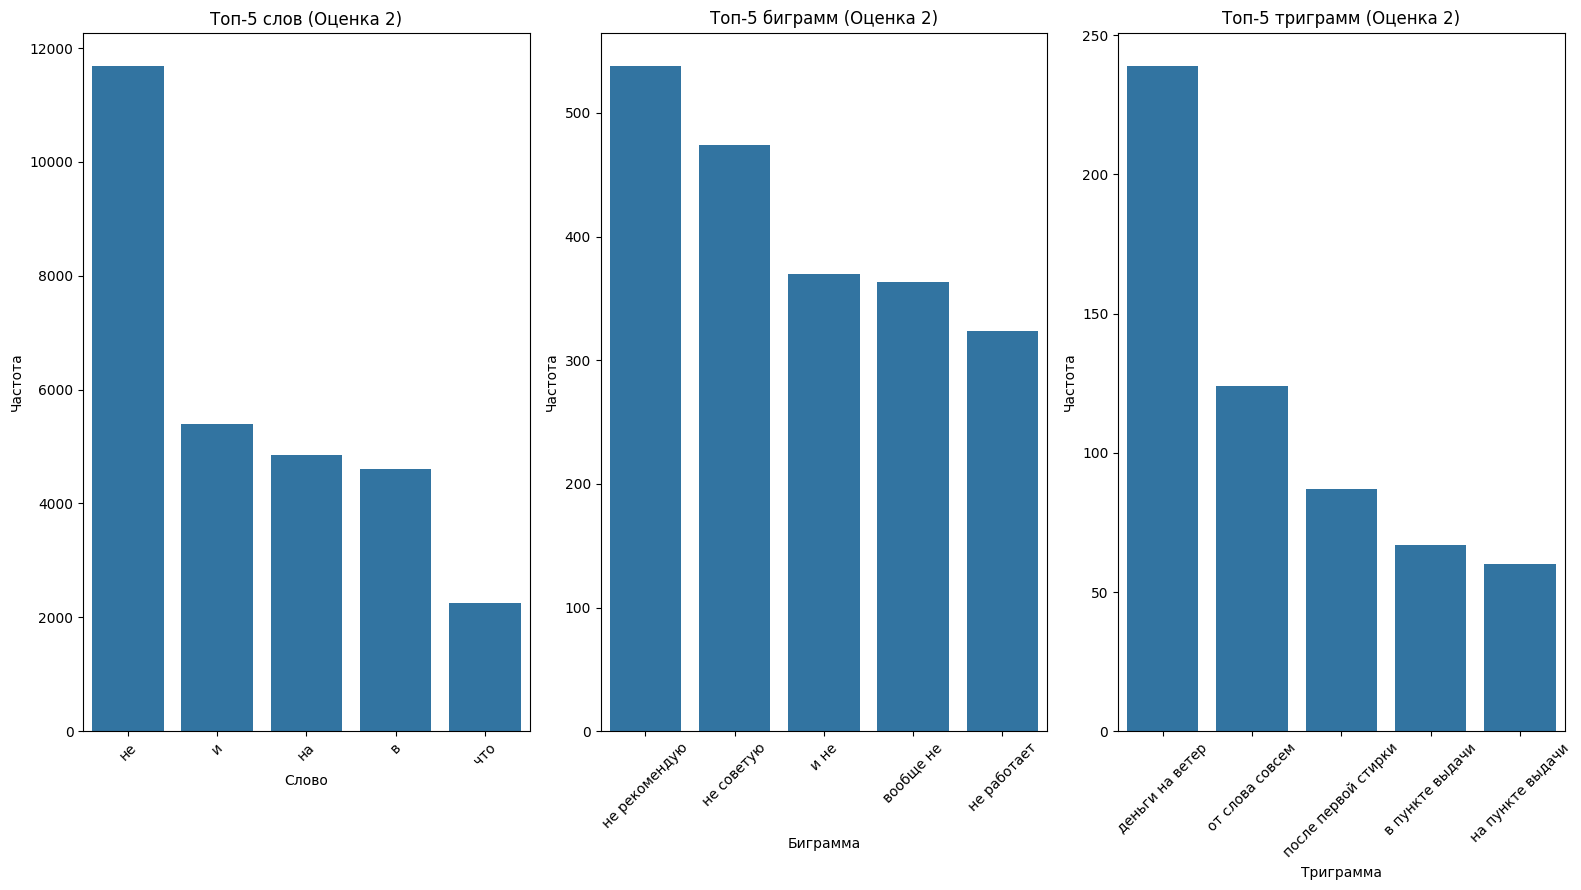

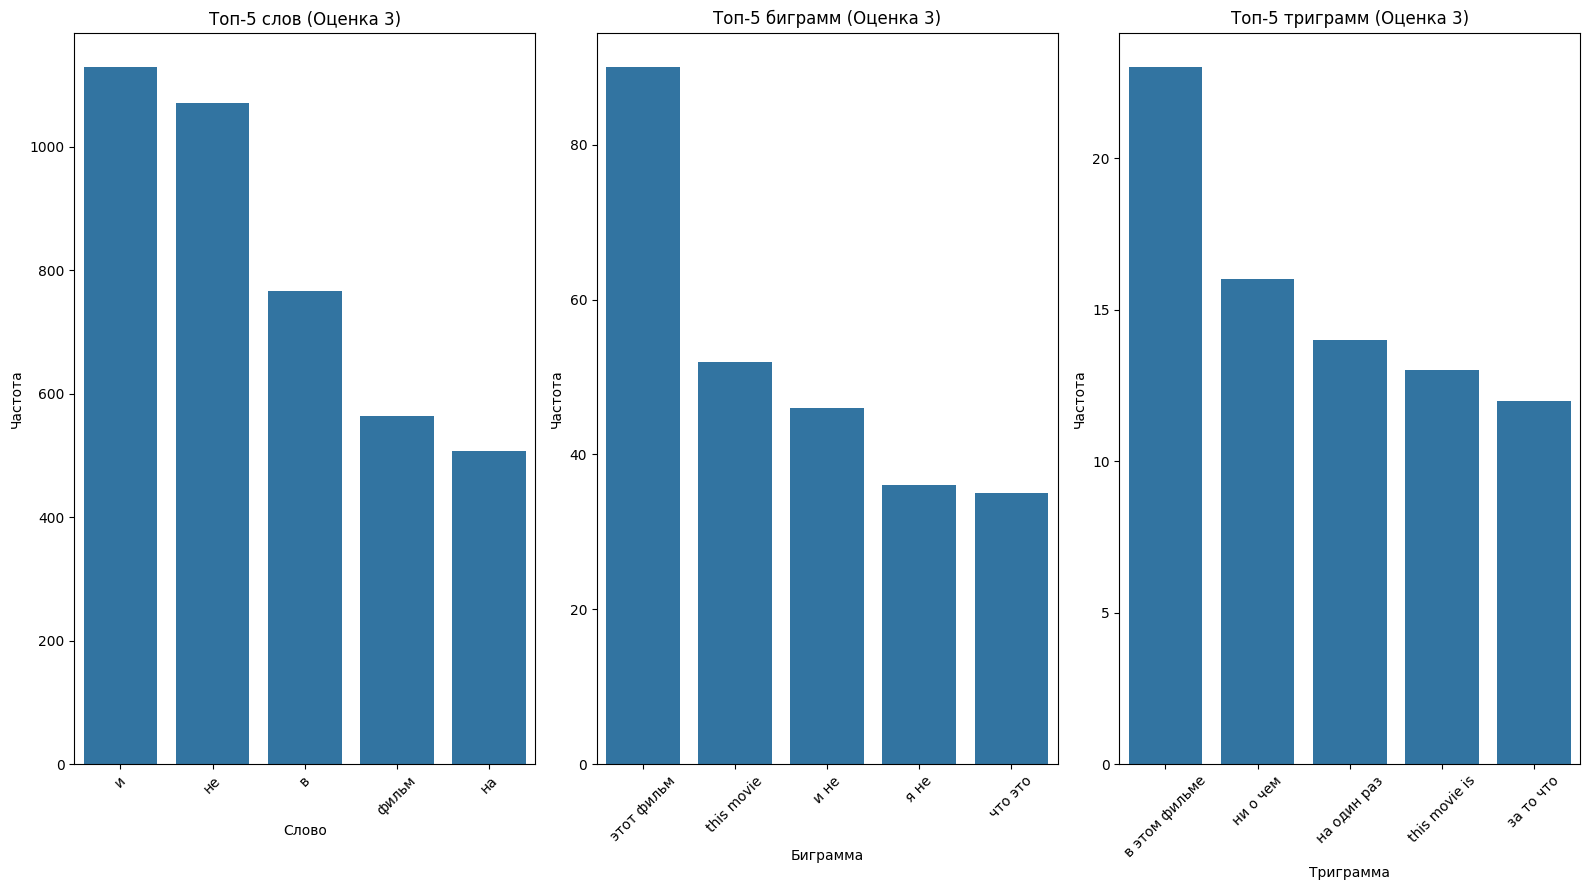

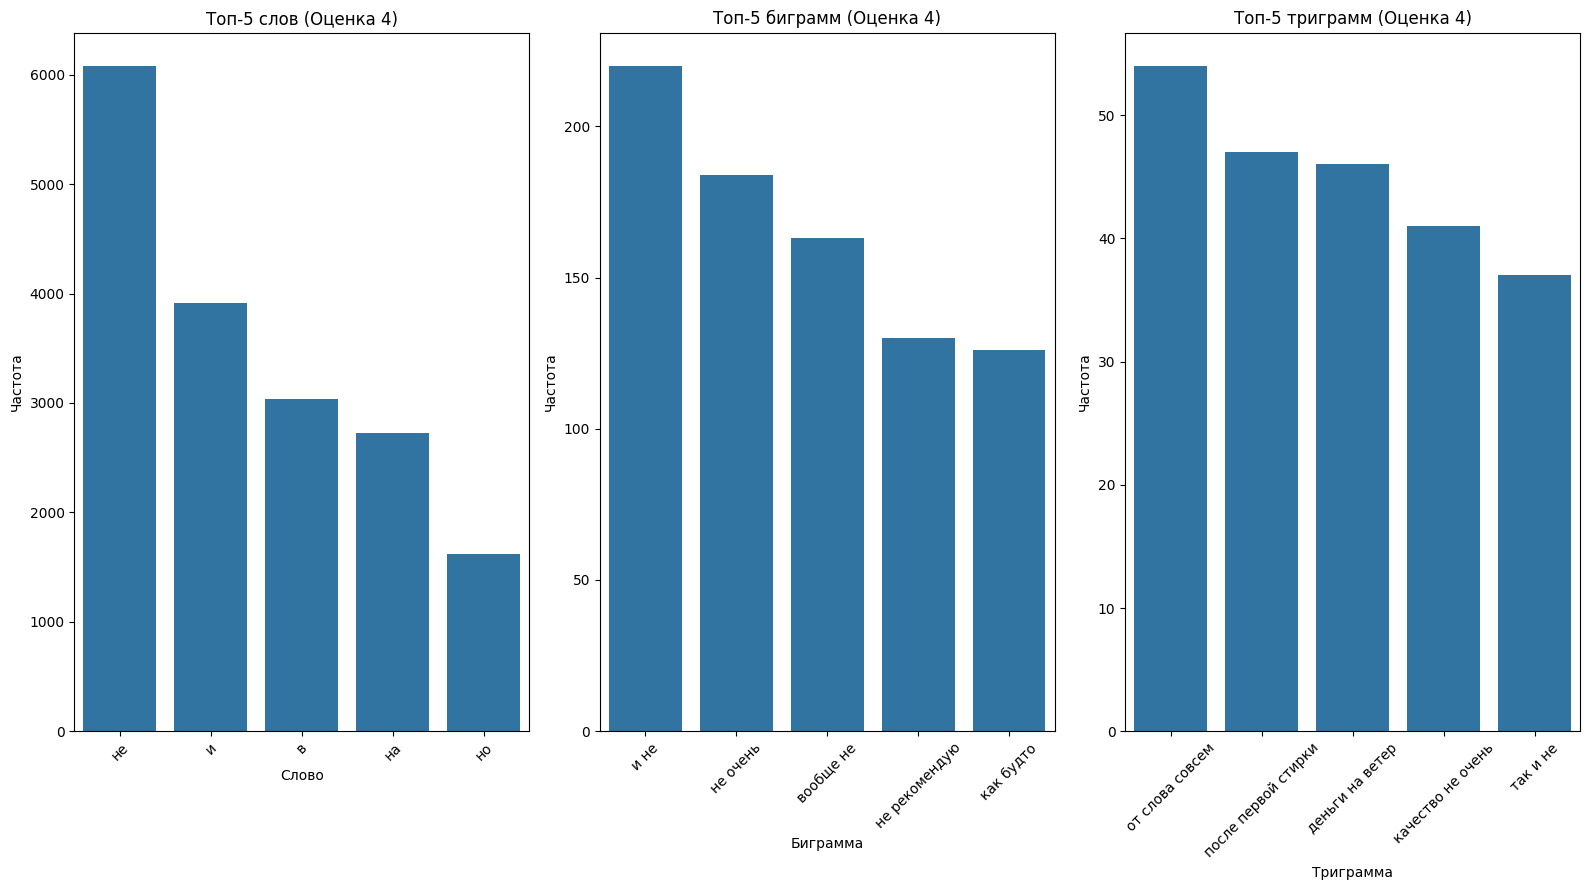

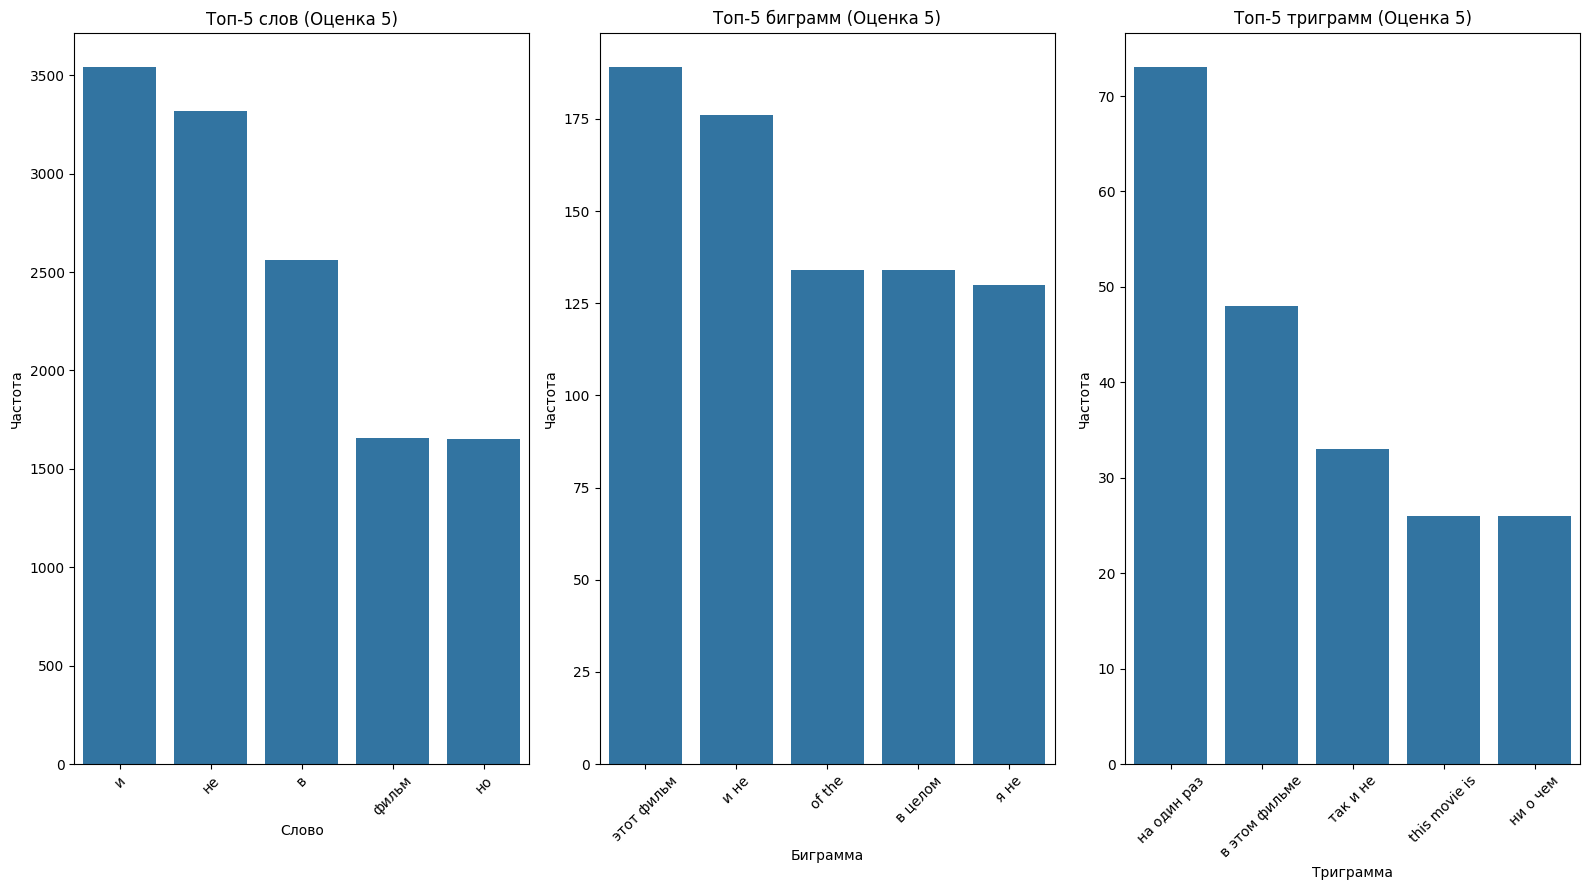

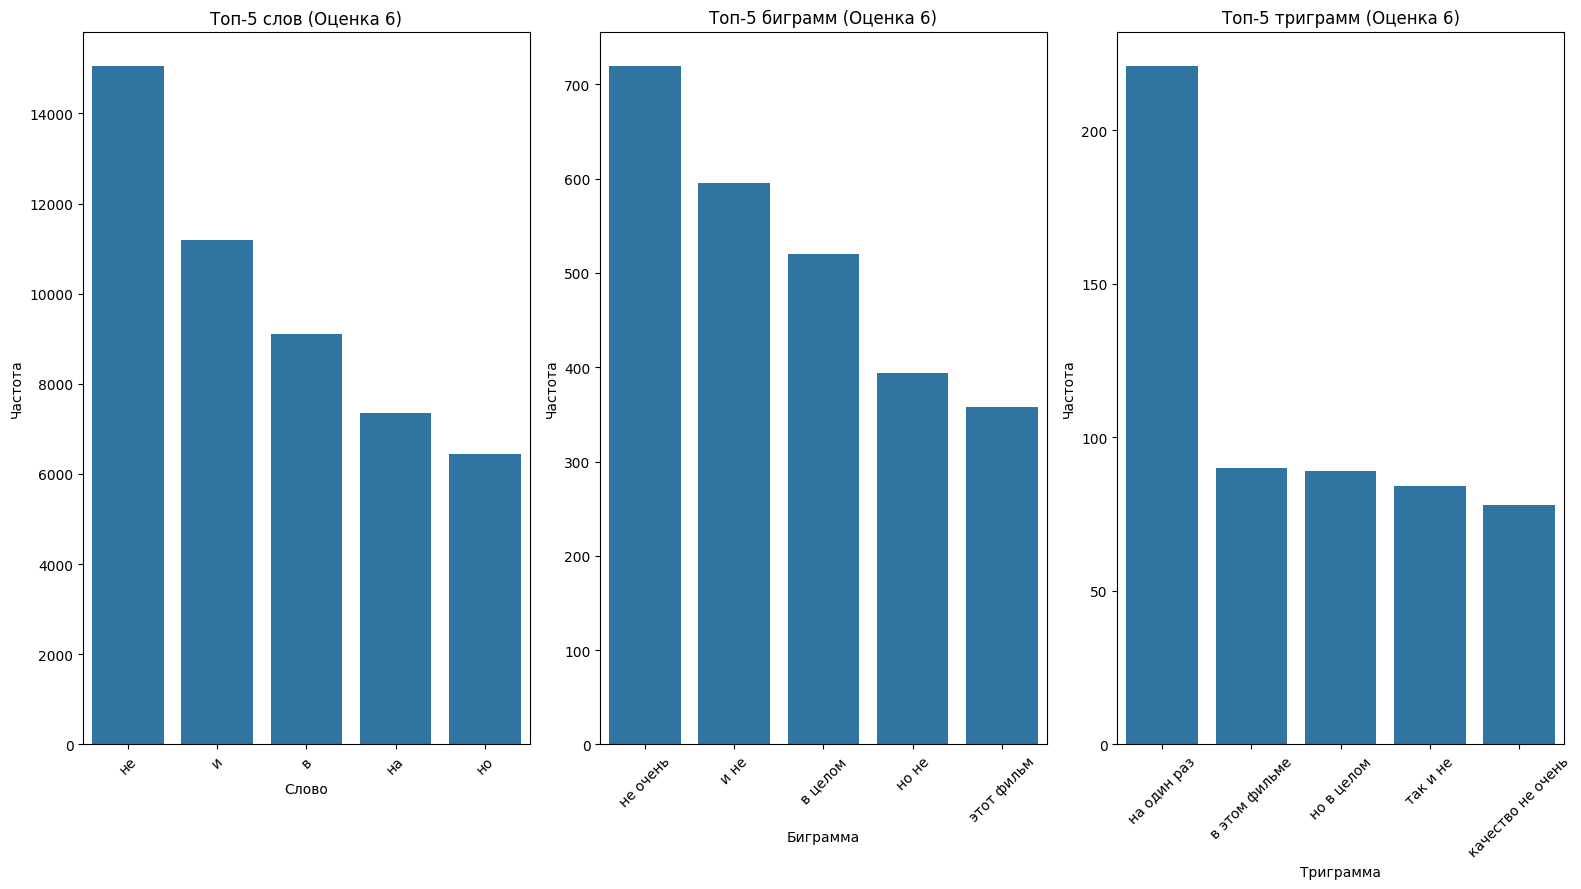

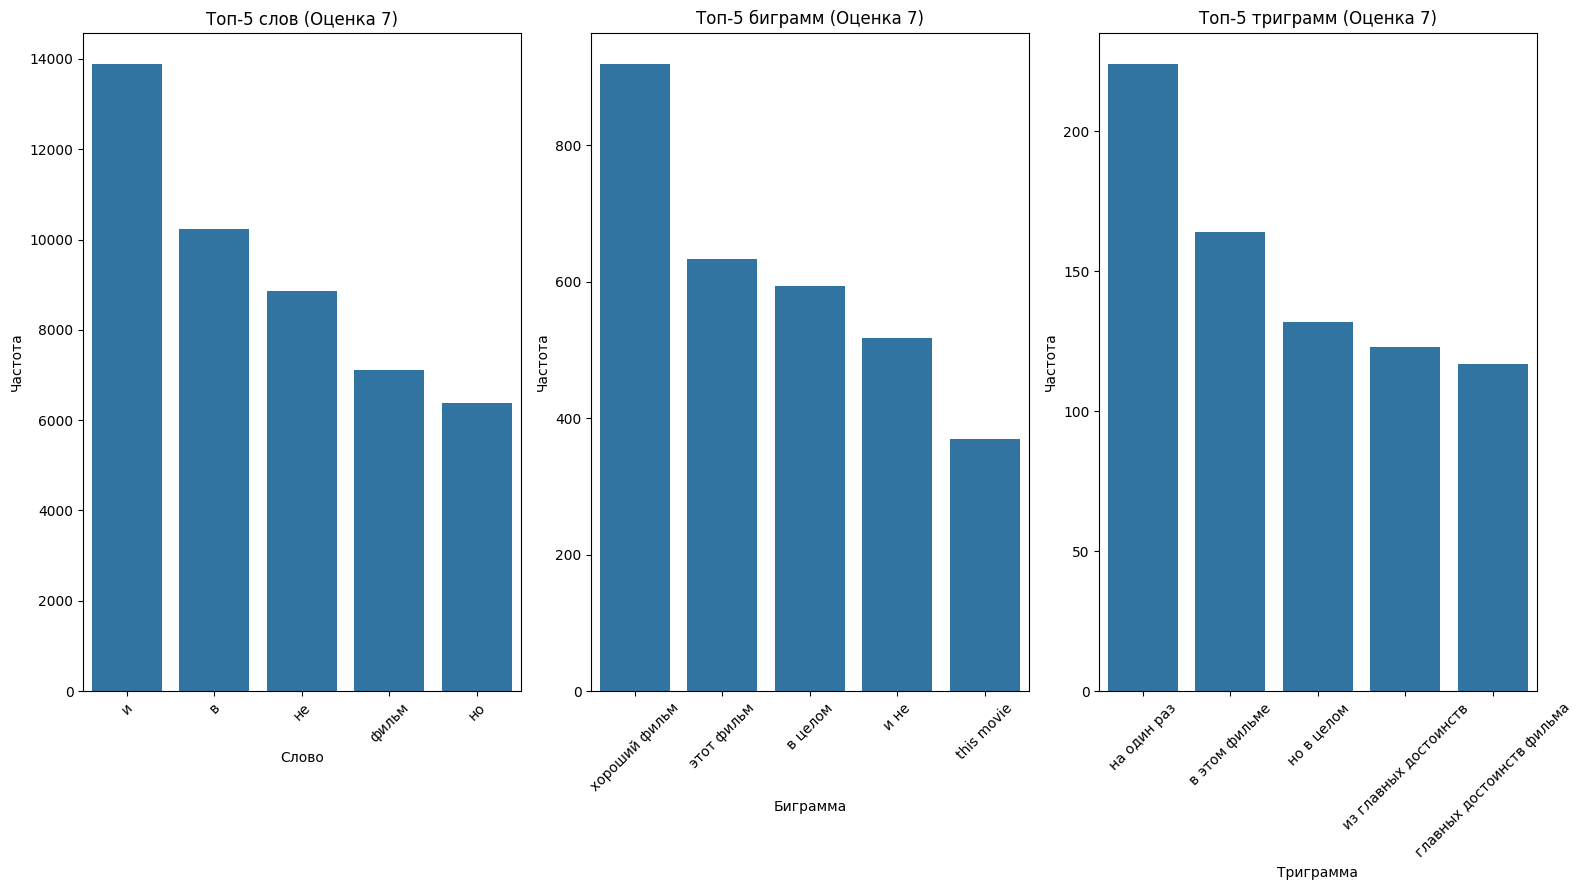

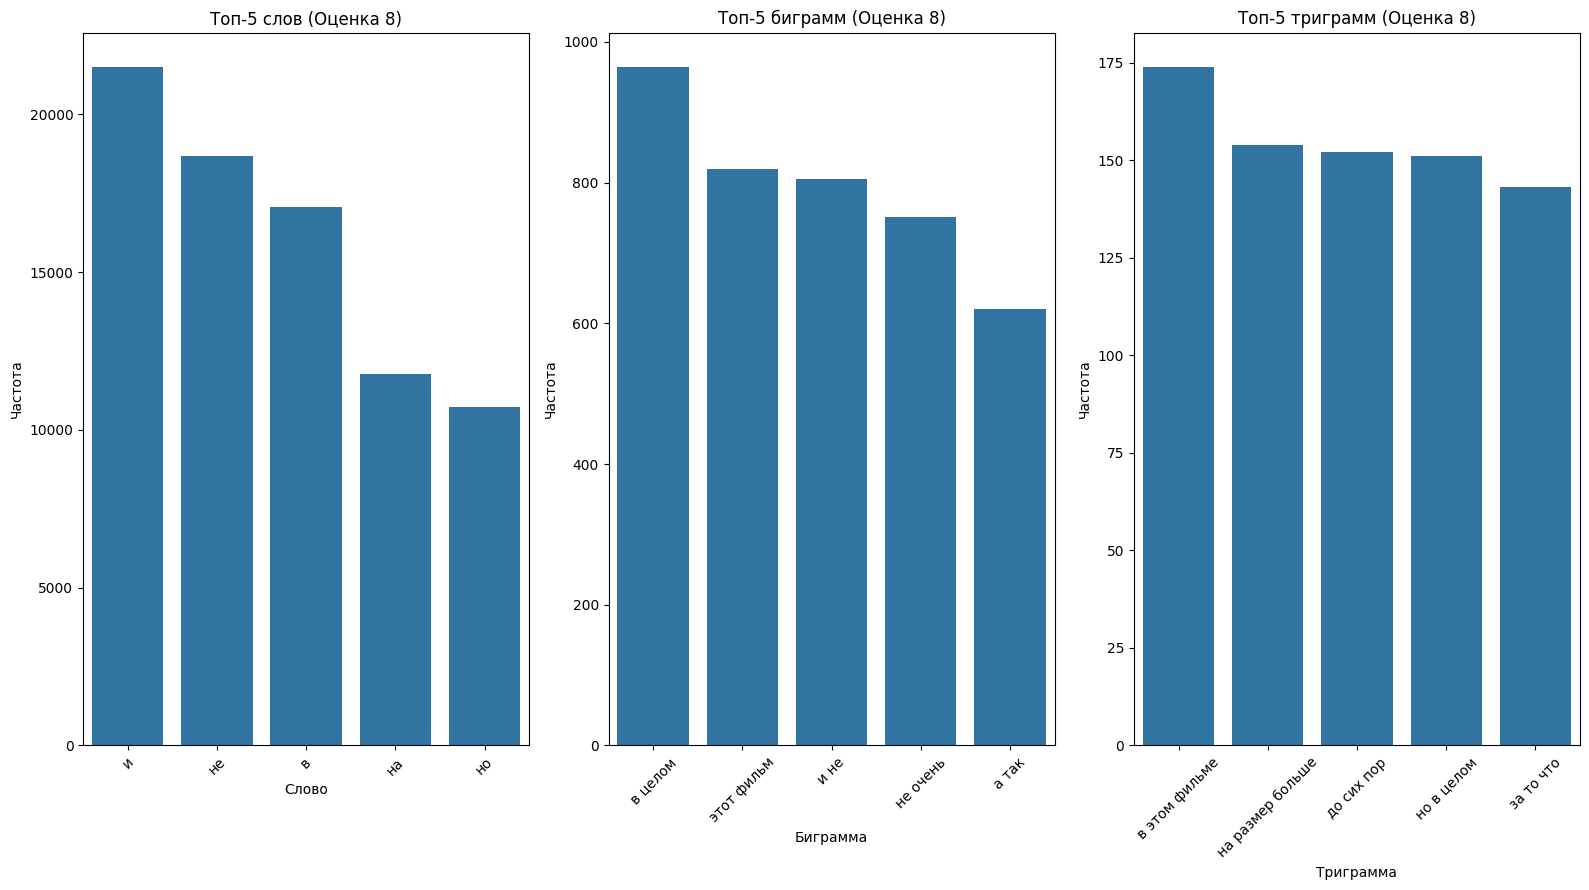

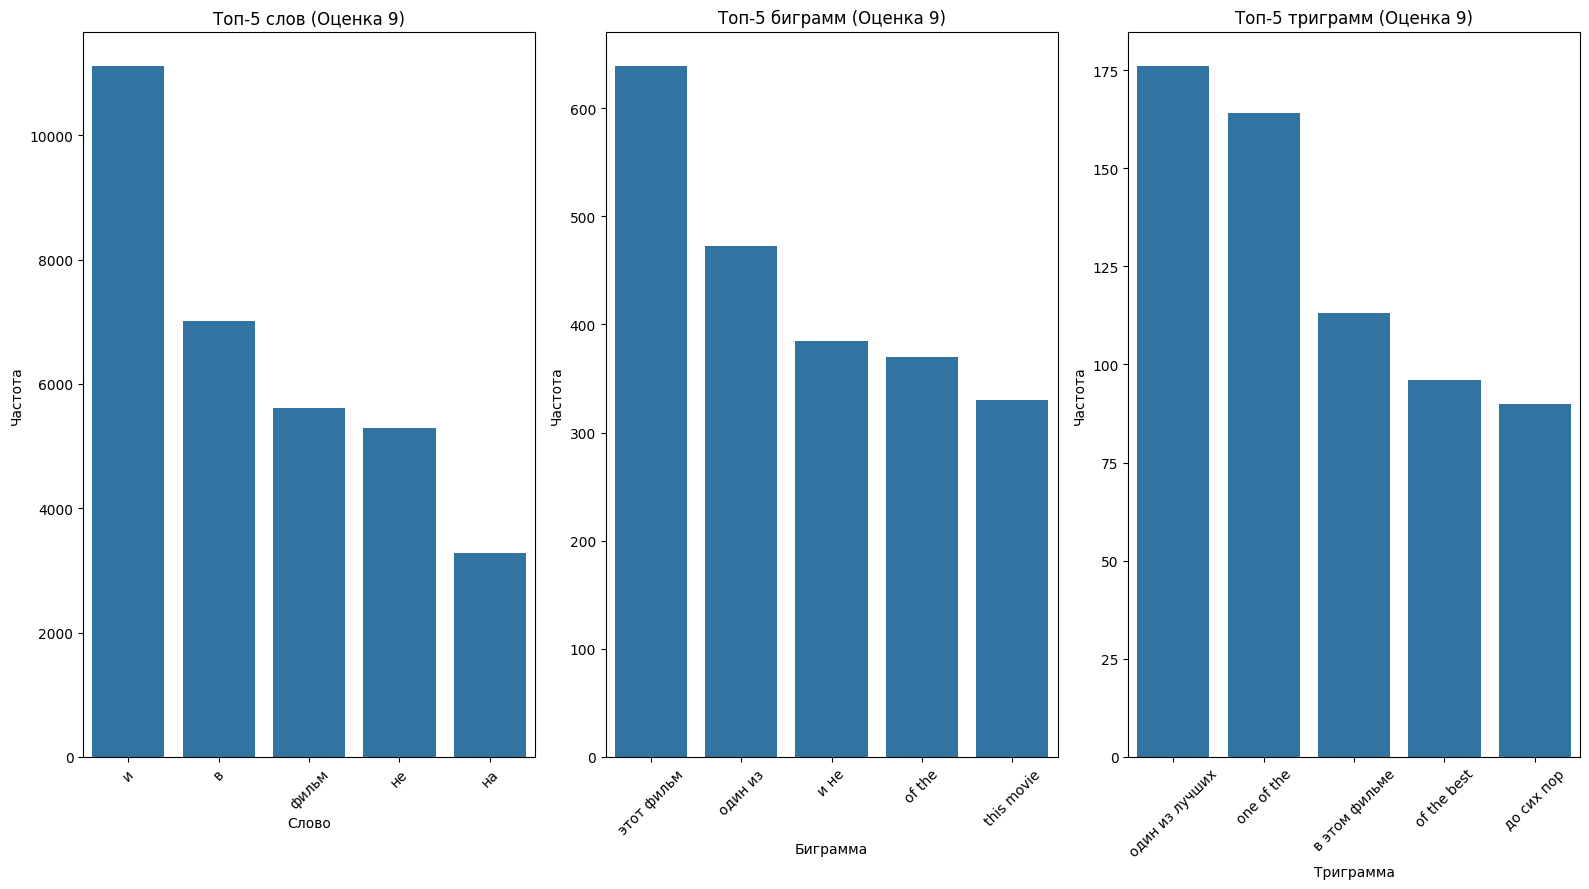

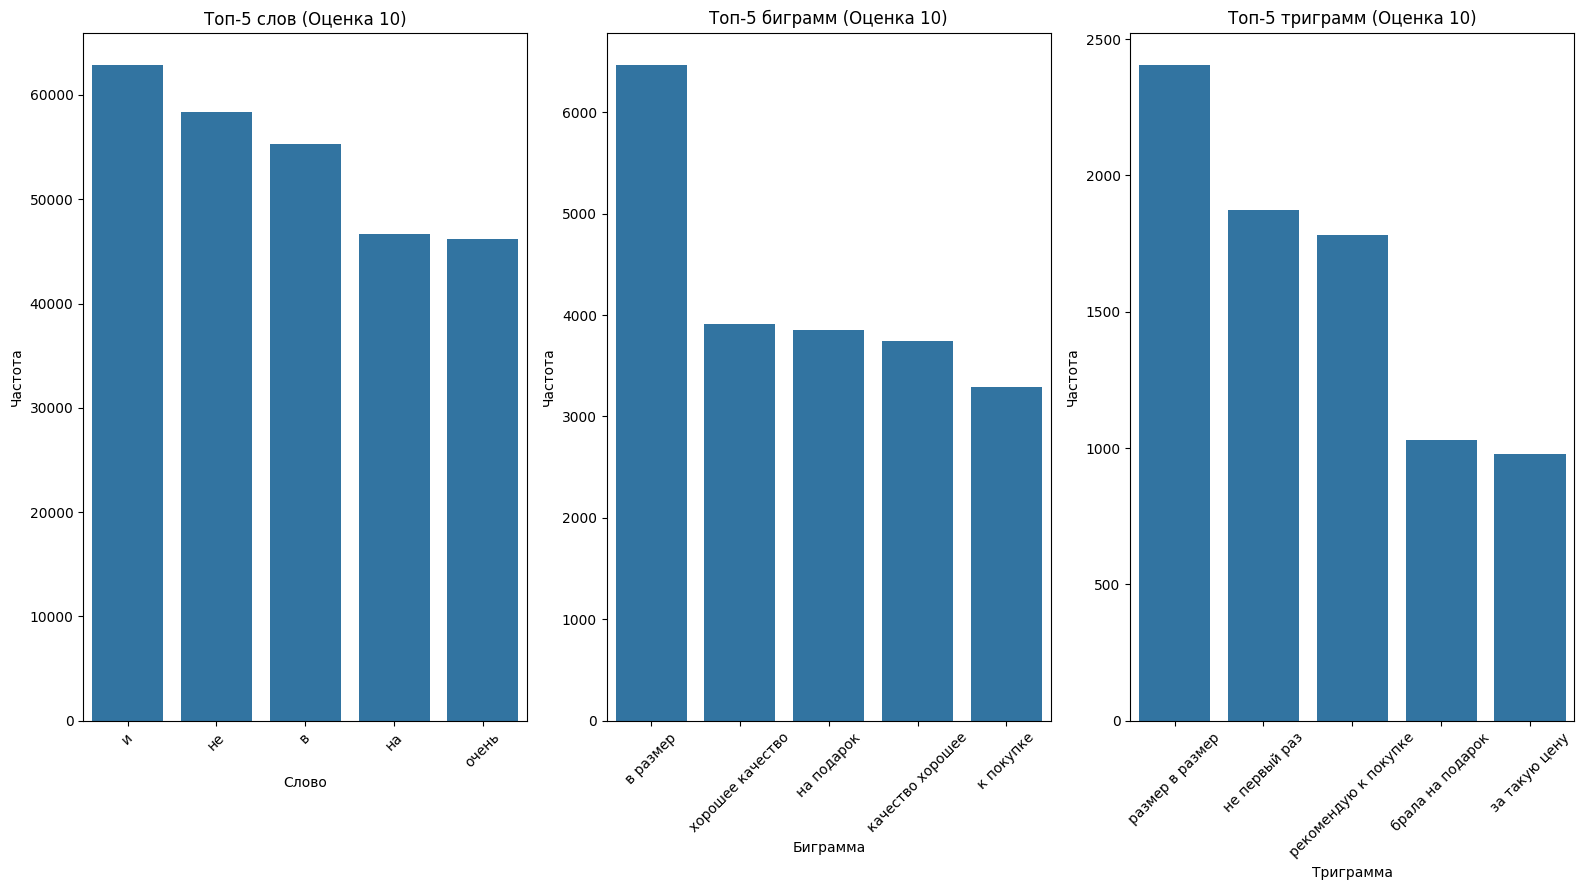

In [41]:
from collections import Counter
from nltk.util import ngrams
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

all_words = []
all_bigrams = []
all_trigrams = []

words_by_rating = {i: [] for i in range(1, 11)}
bigrams_by_rating = {i: [] for i in range(1, 11)}
trigrams_by_rating = {i: [] for i in range(1, 11)}

for review, rating in zip(df['Review'], df['Rating']):
    text = preprocess_text(review)

    words = text.split()

    if len(words) < 1:
      continue

    all_words.extend(words)
    all_bigrams.extend(list(ngrams(words, 2)))
    all_trigrams.extend(list(ngrams(words, 3)))

    words_by_rating[rating].extend(words)
    bigrams_by_rating[rating].extend(list(ngrams(words, 2)))
    trigrams_by_rating[rating].extend(list(ngrams(words, 3)))

print("Топ-20 самых частых слов во всем датасете:")
print(pd.DataFrame(Counter(all_words).most_common(20), columns=['Слово', 'Частота']))

print("\nТоп-20 самых частых биграмм во всем датасете:")
print(pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота']))

print("\nТоп-20 самых частых триграмм во всем датасете:")
print(pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота']))

for rating in range(1, 11):
    print(f"\n\nАнализ для оценки {rating}:")

    print(f"\nТоп-10 самых частых слов для оценки {rating}:")
    print(pd.DataFrame(Counter(words_by_rating[rating]).most_common(10),
                      columns=['Слово', 'Частота']))

    print(f"\nТоп-10 самых частых биграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(10),
                      columns=['Биграмма', 'Частота']))

    print(f"\nТоп-10 самых частых триграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(10),
                      columns=['Триграмма', 'Частота']))

top_words = pd.DataFrame(Counter(all_words).most_common(10), columns=['Слово', 'Частота'])
plt.figure(figsize=(16, 9))
sns.barplot(data=top_words, x='Слово', y='Частота')
plt.title('Топ-10 самых частых слов во всем датасете')
plt.xticks(rotation=45)
plt.show()

top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(10), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
plt.figure(figsize=(16, 9))
sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
plt.title('Топ-10 самых частых биграмм во всем датасете')
plt.xticks(rotation=45)
plt.show()

for rating in range(1, 11):
    if words_by_rating[rating]:
        plt.figure(figsize=(16, 9))

        plt.subplot(131)
        top_words = pd.DataFrame(Counter(words_by_rating[rating]).most_common(5),
                               columns=['Слово', 'Частота'])
        sns.barplot(data=top_words, x='Слово', y='Частота')
        plt.title(f'Топ-5 слов (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(132)
        top_bigrams = pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(5),
                                 columns=['Биграмма', 'Частота'])
        top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
        plt.title(f'Топ-5 биграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(133)
        top_trigrams = pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(5),
                                  columns=['Триграмма', 'Частота'])
        top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_trigrams, x='Триграмма', y='Частота')
        plt.title(f'Топ-5 триграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

Мы увидили распределение, теперь посмотрим на корреляцию для этого всего.

In [42]:
data = df.copy()
data.head()

Name  \
0  Кроссовки NIKE AIR MAX SC   
1  Кроссовки NIKE AIR MAX SC   
2  Кроссовки NIKE AIR MAX SC   
3  Кроссовки NIKE AIR MAX SC   
4  Кроссовки NIKE AIR MAX SC   

                                         Description  \
0  Кроссовки выполнены из натуральной кожи с текс...   
1  Кроссовки выполнены из натуральной кожи с текс...   
2  Кроссовки выполнены из натуральной кожи с текс...   
3  Кроссовки выполнены из натуральной кожи с текс...   
4  Кроссовки выполнены из натуральной кожи с текс...   

                                              Review  Rating  \
0  Отличные кроссовки, очень лёгкие, на ножке акк...      10   
1                       Красивые, стильные, удобные.      10   
2                          Все хорошо. Идет в размер      10   
3  Удобные и красивые, но вся грязь собирается на...       8   
4                            Удобные пока не носоли.      10   

   Review size in symbols  Review size in words  review_length  has_emoji  \
0                     160                    24          160.0      False   
1                      28                     3           28.0      False   
2                      25                     5           25.0      False   
3                      71                    12           71.0      False   
4                      23                     4           23.0      False   

   emoji_count  
0            0  
1            0  
2            0  
3            0  
4            0

In [43]:
all_words_without_stops = list(all_words)
for word in set(all_words):
    if word in STOPWORDS_RU:
        all_words_without_stops = [elem for elem in all_words_without_stops if elem != word]

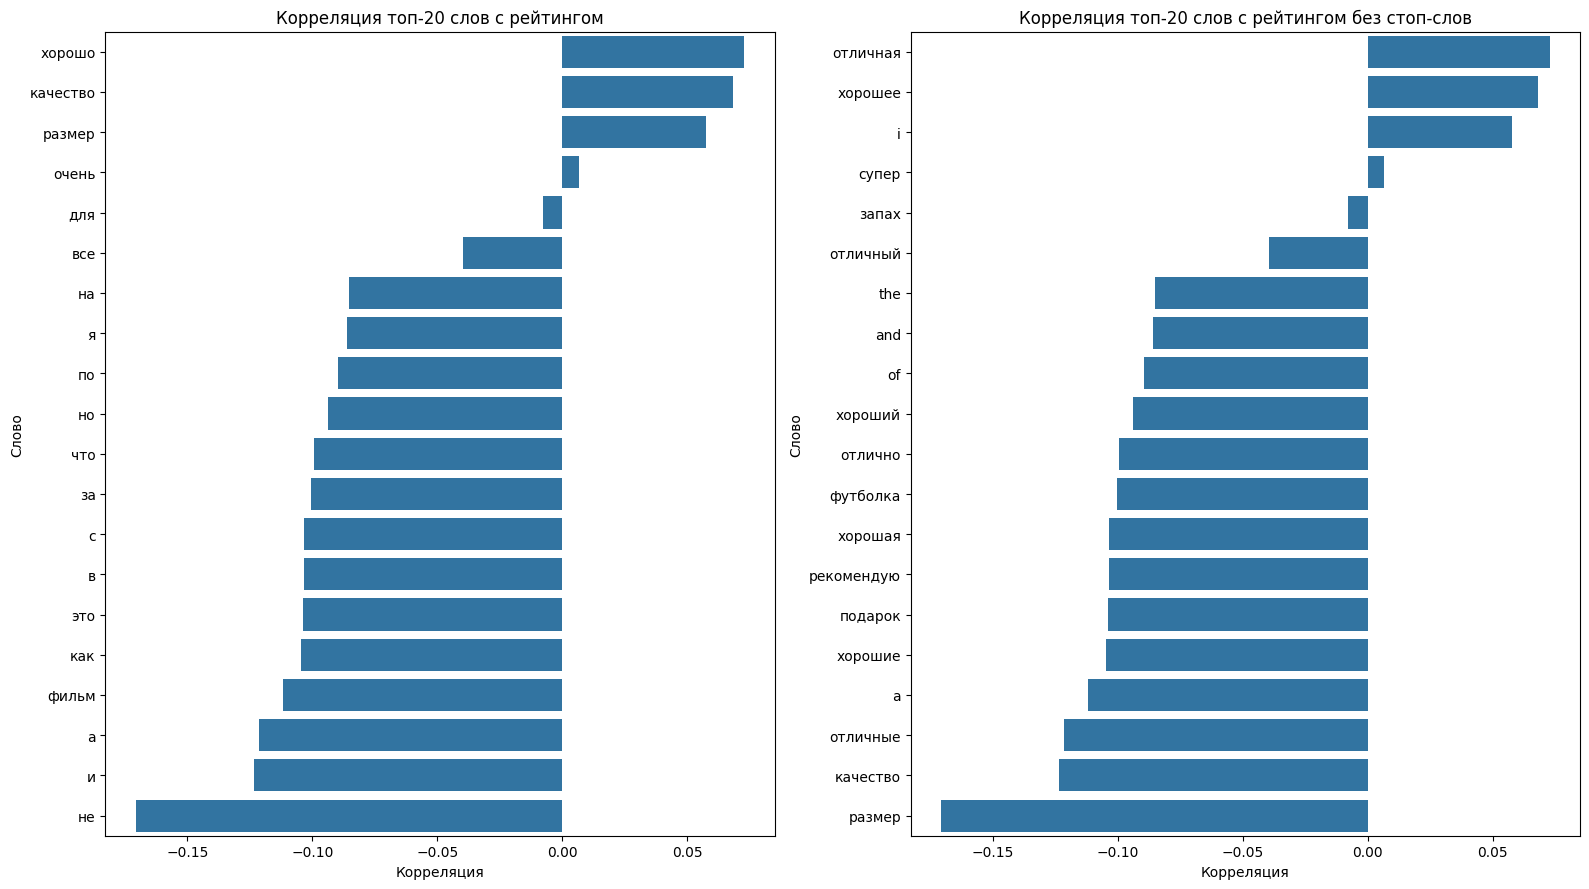

In [44]:
word_counts = Counter(all_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Слово", "Частота"])

correlations = []

for word in common_words["Слово"]:
    data[word] = data["Review"].apply(lambda x: str(x).count(word))
    correlation = data[word].corr(data["Rating"])
    correlations.append(correlation)

common_words["Корреляция"] = correlations

common_words = common_words.sort_values(by="Корреляция", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.barplot(x="Корреляция", y="Слово", data=common_words, ax=axes[0])


word_counts_without_stops = Counter(all_words_without_stops)
common_words_without_stops = pd.DataFrame(word_counts_without_stops.most_common(20), columns=["Слово", "Частота"])

correlations_without_stops = []

for word in common_words_without_stops["Слово"]:
    data[word] = data["Review"].apply(lambda x: str(x).count(word))
    correlation = data[word].corr(data["Rating"])
    correlations_without_stops.append(correlation)

common_words_without_stops["Корреляция"] = correlations

common_words_without_stops = common_words_without_stops.sort_values(by="Корреляция", ascending=False)

sns.barplot(x="Корреляция", y="Слово", data=common_words_without_stops, ax=axes[1])


axes[0].set_title("Корреляция топ-20 слов с рейтингом")
axes[1].set_title("Корреляция топ-20 слов с рейтингом без стоп-слов")
plt.xlabel("Корреляция")
plt.ylabel("Слово")
plt.tight_layout()
plt.show()

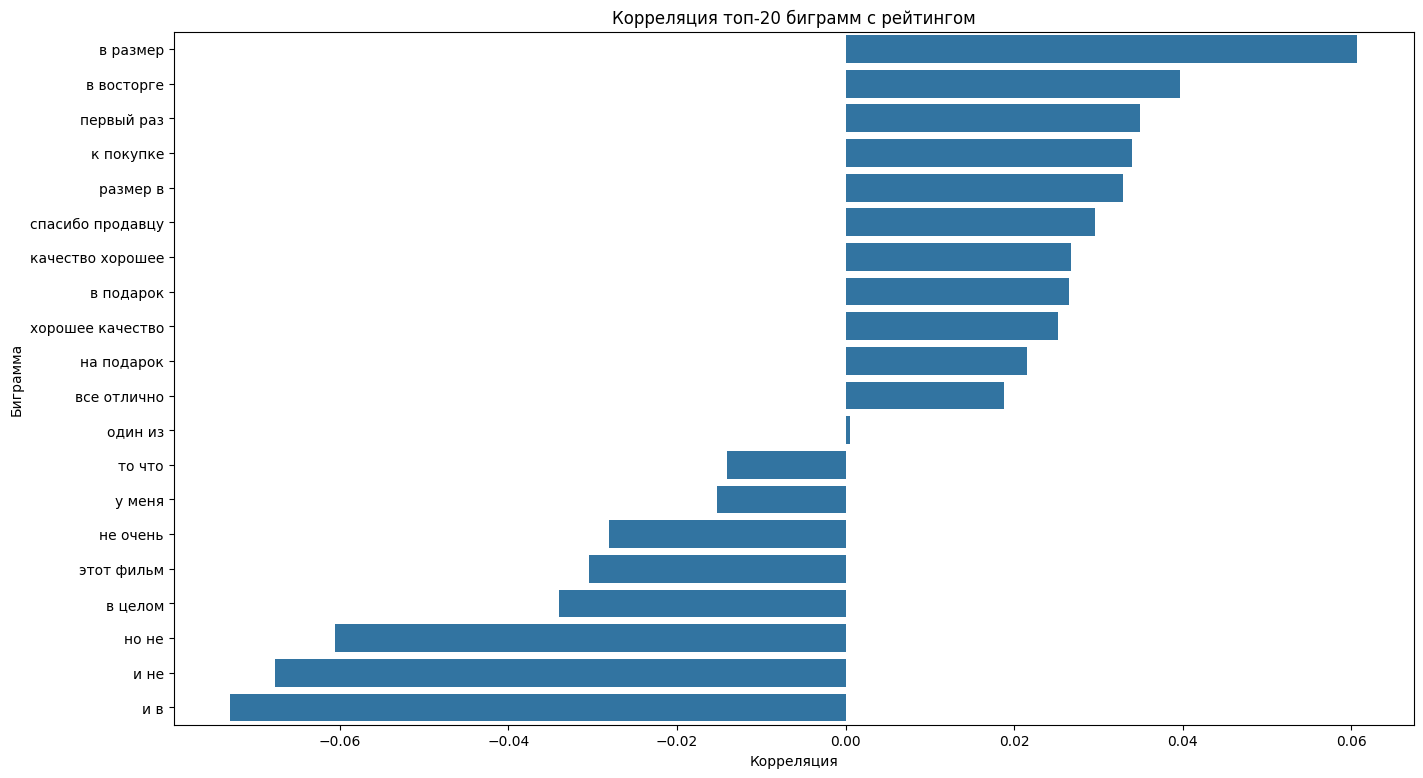

In [45]:
top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))

correlations_bigrams = []
for bigram in top_bigrams['Биграмма']:
    data[bigram] = data["Review"].apply(lambda x: str(x).count(bigram))
    correlation = data[bigram].corr(data['Rating'])
    correlations_bigrams.append(correlation)

top_bigrams['Корреляция'] = correlations_bigrams
top_bigrams = top_bigrams.sort_values(by='Корреляция', ascending=False)

plt.figure(figsize=(16, 9))
sns.barplot(x='Корреляция', y='Биграмма', data=top_bigrams)
plt.title('Корреляция топ-20 биграмм с рейтингом')
plt.xlabel('Корреляция')
plt.ylabel('Биграмма')
plt.show()


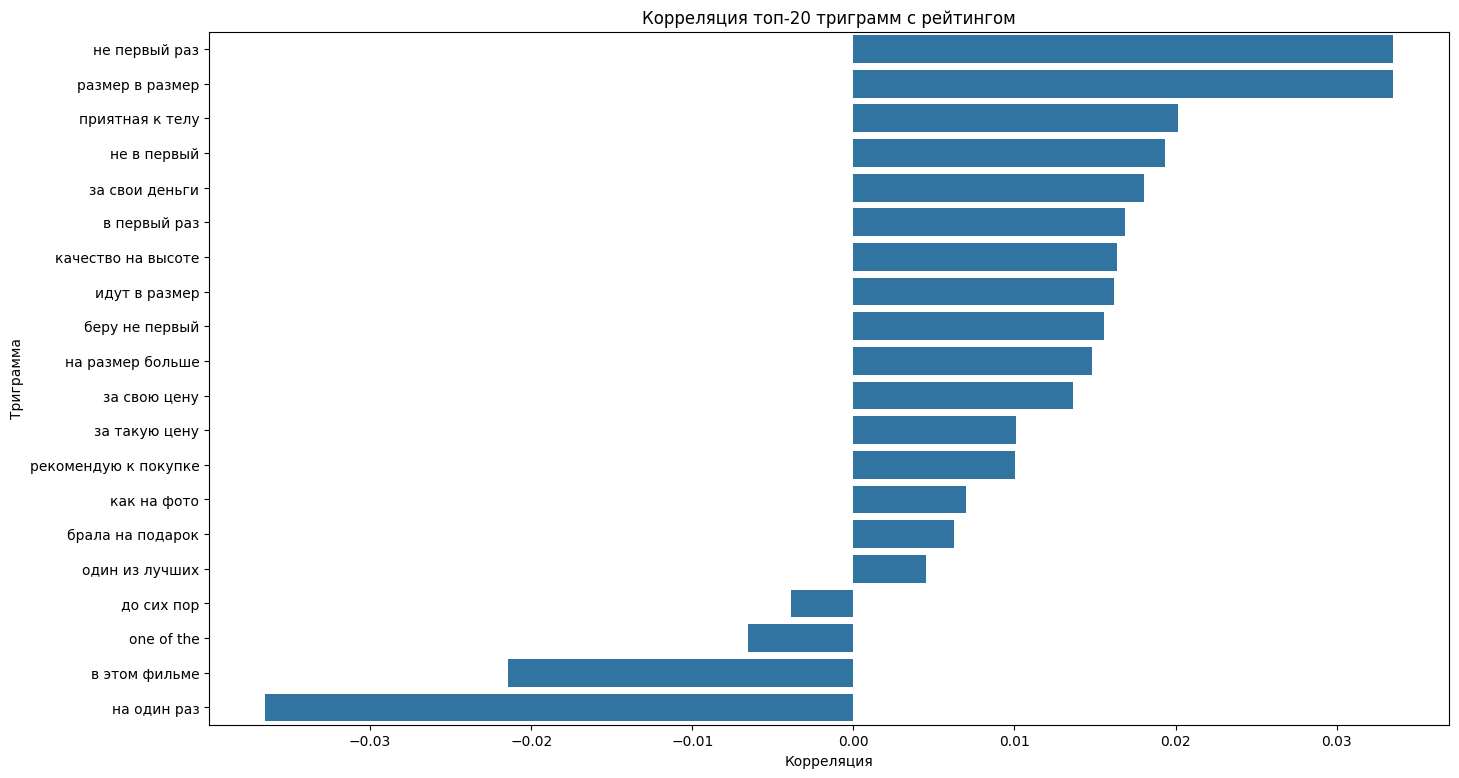

In [46]:
top_trigrams = pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота'])
top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))

correlations_trigrams = []
for trigram in top_trigrams['Триграмма']:
    data[trigram] = data["Review"].apply(lambda x: str(x).count(trigram))
    correlation = data[trigram].corr(data['Rating'])
    correlations_trigrams.append(correlation)

top_trigrams['Корреляция'] = correlations_trigrams
top_trigrams = top_trigrams.sort_values(by='Корреляция', ascending=False)

plt.figure(figsize=(16, 9))
sns.barplot(x='Корреляция', y='Триграмма', data=top_trigrams)
plt.title('Корреляция топ-20 триграмм с рейтингом')
plt.xlabel('Корреляция')
plt.ylabel('Триграмма')
plt.show()

Посмотрим на выбросы

Количество длинных отзывов: 24248 из 486920 (4.98%)


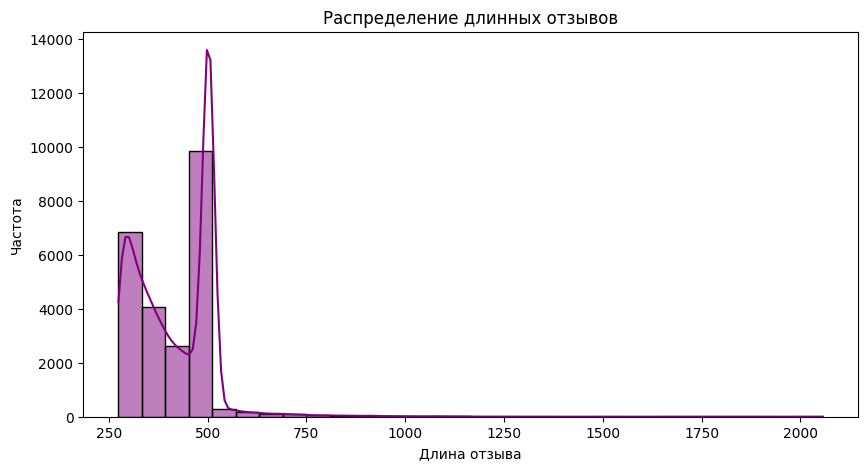

Корреляция между длинными отзывами и оценкой: -0.12


<ipython-input-47-7bc82daf3ee4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlier', y='Rating', data=df, palette=['orange', 'blue'])


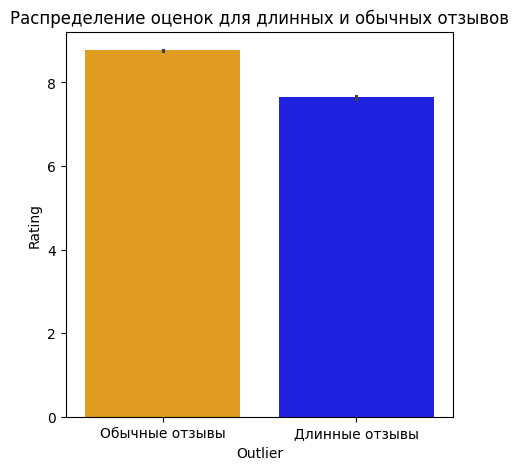

In [47]:
df['Review length'] = df['Review'].apply(lambda x: len(str(x)))
length_threshold = np.percentile(df['Review length'], 95)

df['Outlier'] = (df['Review length'] > length_threshold).astype(int)

outlier_count = df['Outlier'].sum()
total_count = len(df)
print(f'Количество длинных отзывов: {outlier_count} из {total_count} ({outlier_count/total_count:.2%})')

plt.figure(figsize=(10, 5))
sns.histplot(df[df['Outlier'] == 1]['Review length'], bins=30, kde=True, color='purple')
plt.title('Распределение длинных отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Частота')
plt.show()

corr_outlier_score = df[['Outlier', 'Rating']].corr().iloc[0, 1]
print(f'Корреляция между длинными отзывами и оценкой: {corr_outlier_score:.2f}')

plt.figure(figsize=(5, 5))
sns.barplot(x='Outlier', y='Rating', data=df, palette=['orange', 'blue'])
plt.xticks([0, 1], ['Обычные отзывы', 'Длинные отзывы'])
plt.title('Распределение оценок для длинных и обычных отзывов')
plt.show()

Посмотрим как справляются существующие модели

In [48]:
import torch
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

In [49]:
df['Sentiment'] = df['Rating'].apply(lambda x: 'positive' if x >= 7 else ('negative' if x <= 4 else None))
df_bin = df.dropna(subset=['Sentiment'])
df_bin = df[df['Sentiment'].notnull()]
# display(df_bin)
# print(df_bin['Sentiment'].unique())

In [50]:
model = pipeline(model='seara/rubert-tiny2-russian-sentiment')

def get_sentiment(text):
    prediction = model(str(text))[0]['label']
    return prediction

df_bin_ = df_bin.sample(20000, random_state=42)
df_bin_['Predicted Sentiment'] = df_bin_['Review'].apply(get_sentiment)

df_bin_ = df_bin_[df_bin_['Predicted Sentiment'] != 'neutral']

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/911 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/117M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/368 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.41M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


Accuracy: 0.94
Precision: [0.38130687 0.99098955]
Recall: [0.80313589 0.94323012]
F1-score: [0.517106  0.9665202]


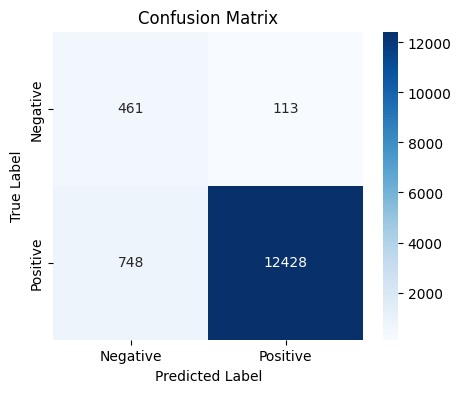

In [51]:
accuracy = accuracy_score(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

cm = confusion_matrix(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Теперь хотим посмотреть то же самое, но вновь на "урезанном" датасете для баланса оценок. Для изменения баланса можно менять n в sample.

In [52]:
df_reviews_5 = df[df["Rating"] == 10].sample(n=60000, random_state=42)
df_reviews_other = df[df["Rating"] != 10]
old_df = df.copy()
df = pd.concat([df_reviews_5, df_reviews_other])

In [53]:
df.head()

Name  \
318025                                        Большой куш   
207712         Эфиопия Сидамо Кофе в зернах 1000 г - 1 кг   
384541                                 Американский пирог   
160991                                Куртка демисезонная   
230313  Вешалки плечики для одежды деревянные набор 10 шт   

                                              Description  \
318025  Фрэнки Четыре Пальца должен был переправить кр...   
207712  ETHIOPIA SIDAMO Кофе в зернах  1 кг Эфиопия – ...   
384541                                                NaN   
160991  Весенняя куртка для мальчика от российского бр...   
230313  Представляем вам идеальное решение для организ...   

                                                   Review  Rating  \
318025  Сформировало моё отношение к цыганам и способа...      10   
207712  Кофе понравился, буду брать еще, нет кислинки,...      10   
384541                                гениально\n              10   
160991                     Крутая куртка. Ребенок заценил      10   
230313                                     Замечательные👍      10   

        Review size in symbols  Review size in words  review_length  \
318025                      77                    18           77.0   
207712                      80                    12           80.0   
384541                      18                     9           18.0   
160991                      30                     4           30.0   
230313                      14                     1           14.0   

        has_emoji  emoji_count  Review length  Outlier Sentiment  
318025      False            0             77        0  positive  
207712      False            0             80        0  positive  
384541      False            0             18        0  positive  
160991      False            0             30        0  positive  
230313      False            1             14        0  positive

<Axes: ylabel='count'>

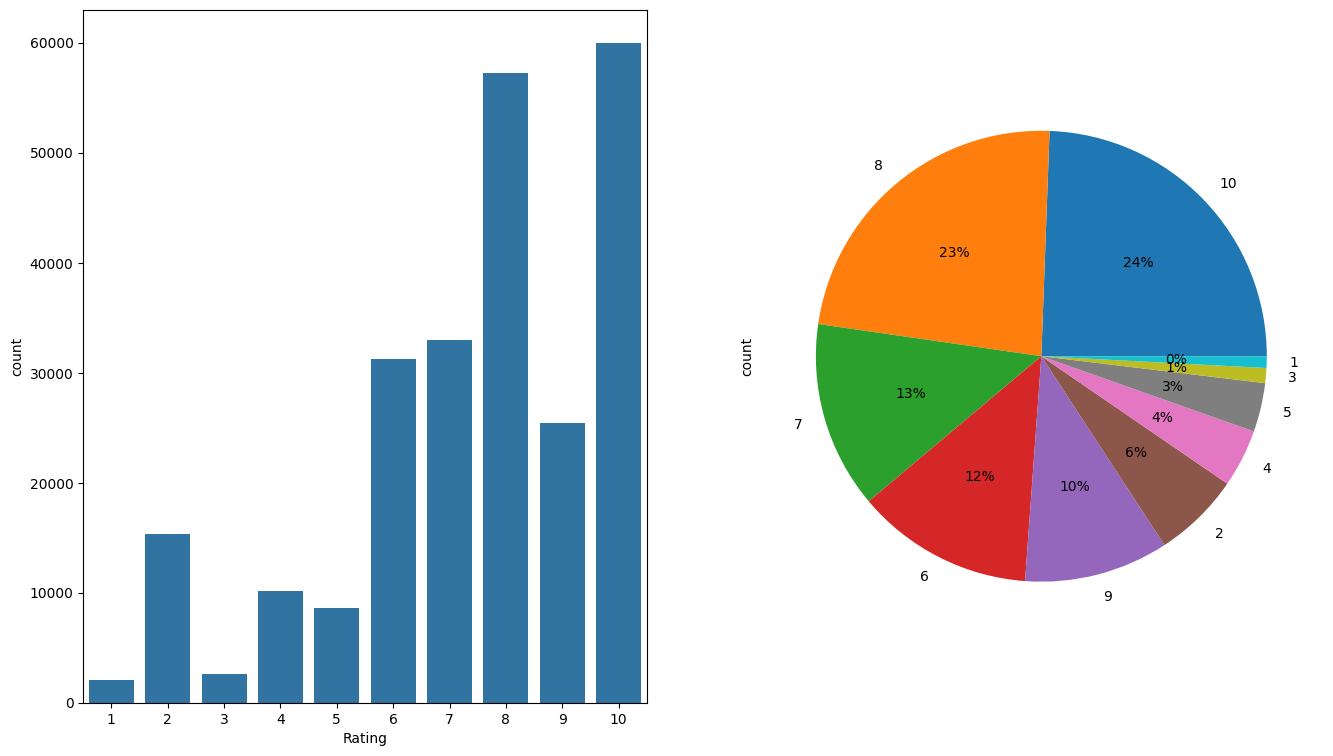

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.countplot(x="Rating", data=df, ax=axes[0])
df["Rating"].value_counts().plot(kind = "pie", autopct = "%.d%%", ax=axes[1])

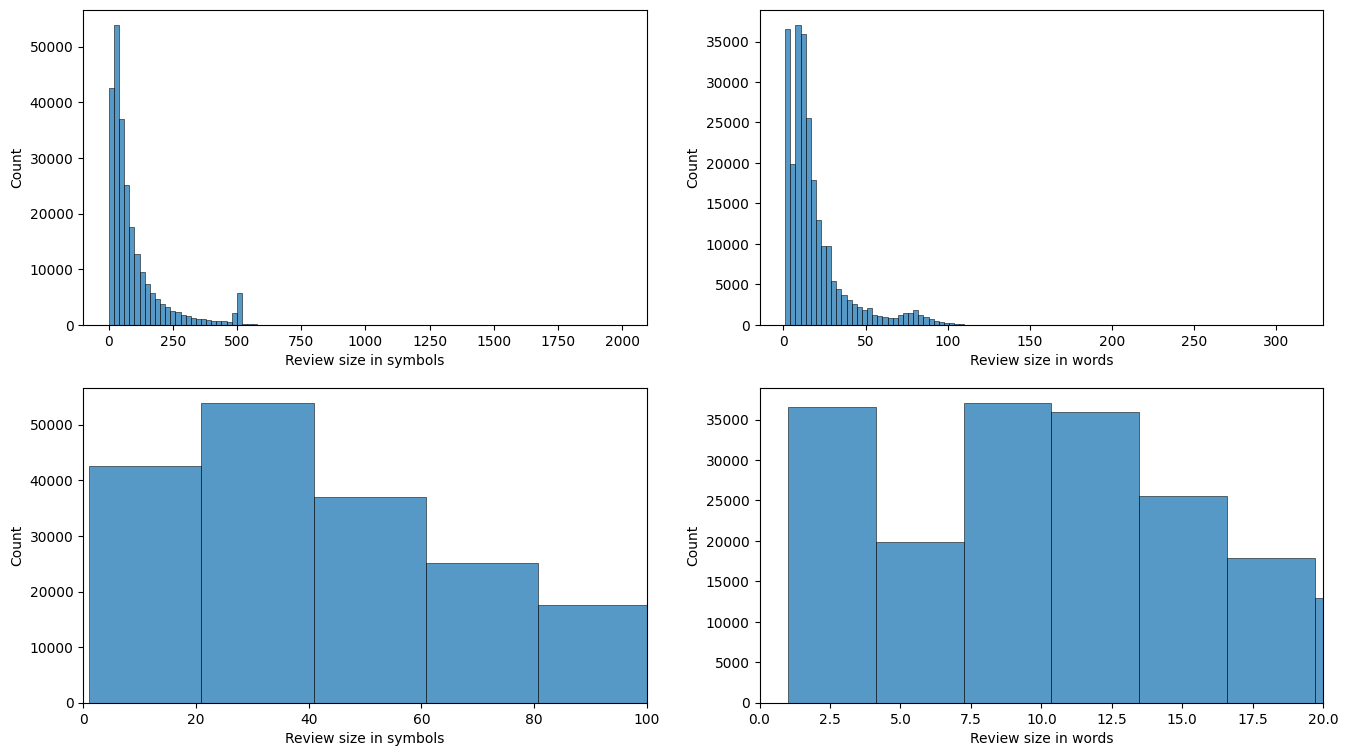

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Считаем относительно символов
df["Review size in symbols"] = df["Review"].apply(lambda x: len(str(x)))
sns.histplot(data=df["Review size in symbols"], ax=axes[0, 0], bins=100)

#Считаем относительно количества слов
df["Review size in words"] = df["Review"].apply(lambda x: len(str(x).split(' ')))
sns.histplot(data=df["Review size in words"], ax=axes[0, 1], bins=100)

#Теперь посмотрим на аналогичное, но приблизим на начало

#Считаем относительно символов
sns.histplot(data=df["Review size in symbols"], ax=axes[1, 0], bins=100)
axes[1, 0].set_xlim(0, 100)

#Считаем относительно количества слов
sns.histplot(data=df["Review size in words"], ax=axes[1, 1], bins=100)
axes[1, 1].set_xlim(0, 20)

plt.show()

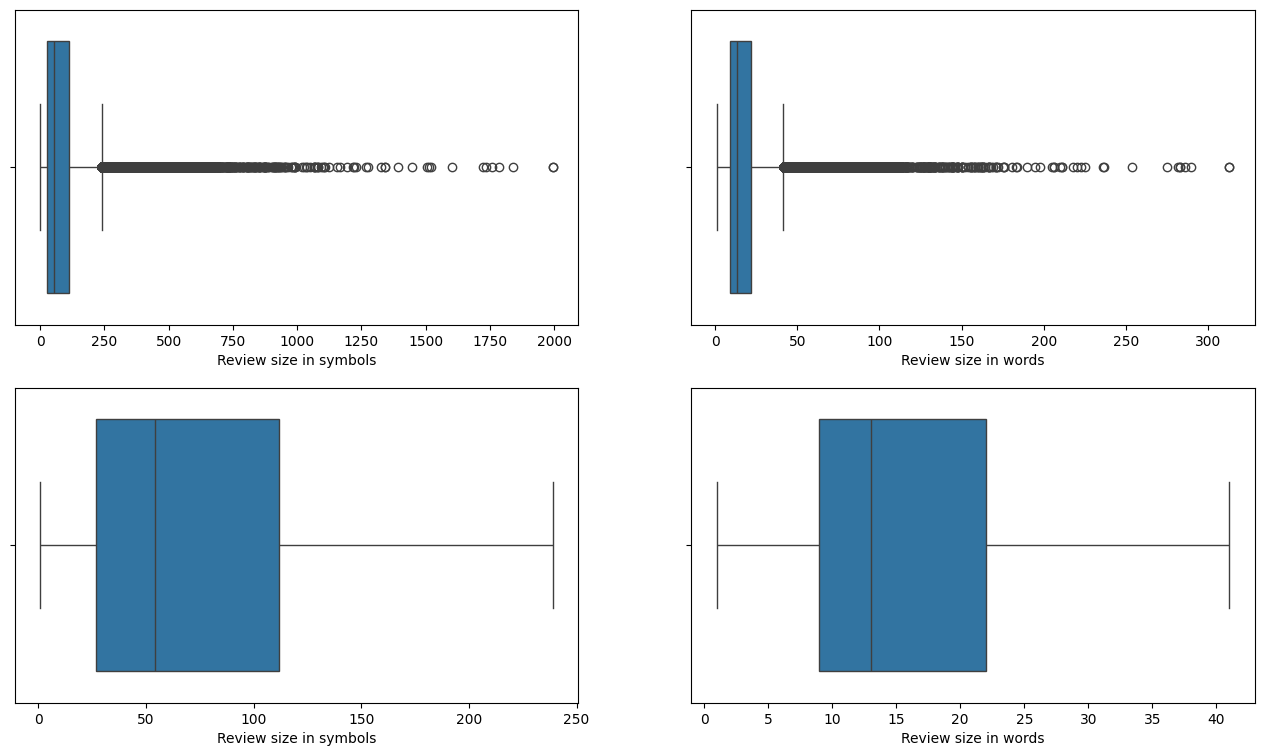

In [56]:
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

#Size in symbols
sns.boxplot(x="Review size in symbols", data=df, ax=axes[0, 0])

#Size in words
sns.boxplot(x="Review size in words", data=df, ax=axes[0, 1])

#Size in symbols without fliers
sns.boxplot(x="Review size in symbols", data=df, ax=axes[1, 0], showfliers=False)

#Size in words without fliers
sns.boxplot(x="Review size in words", data=df, ax=axes[1, 1], showfliers=False)

plt.show()

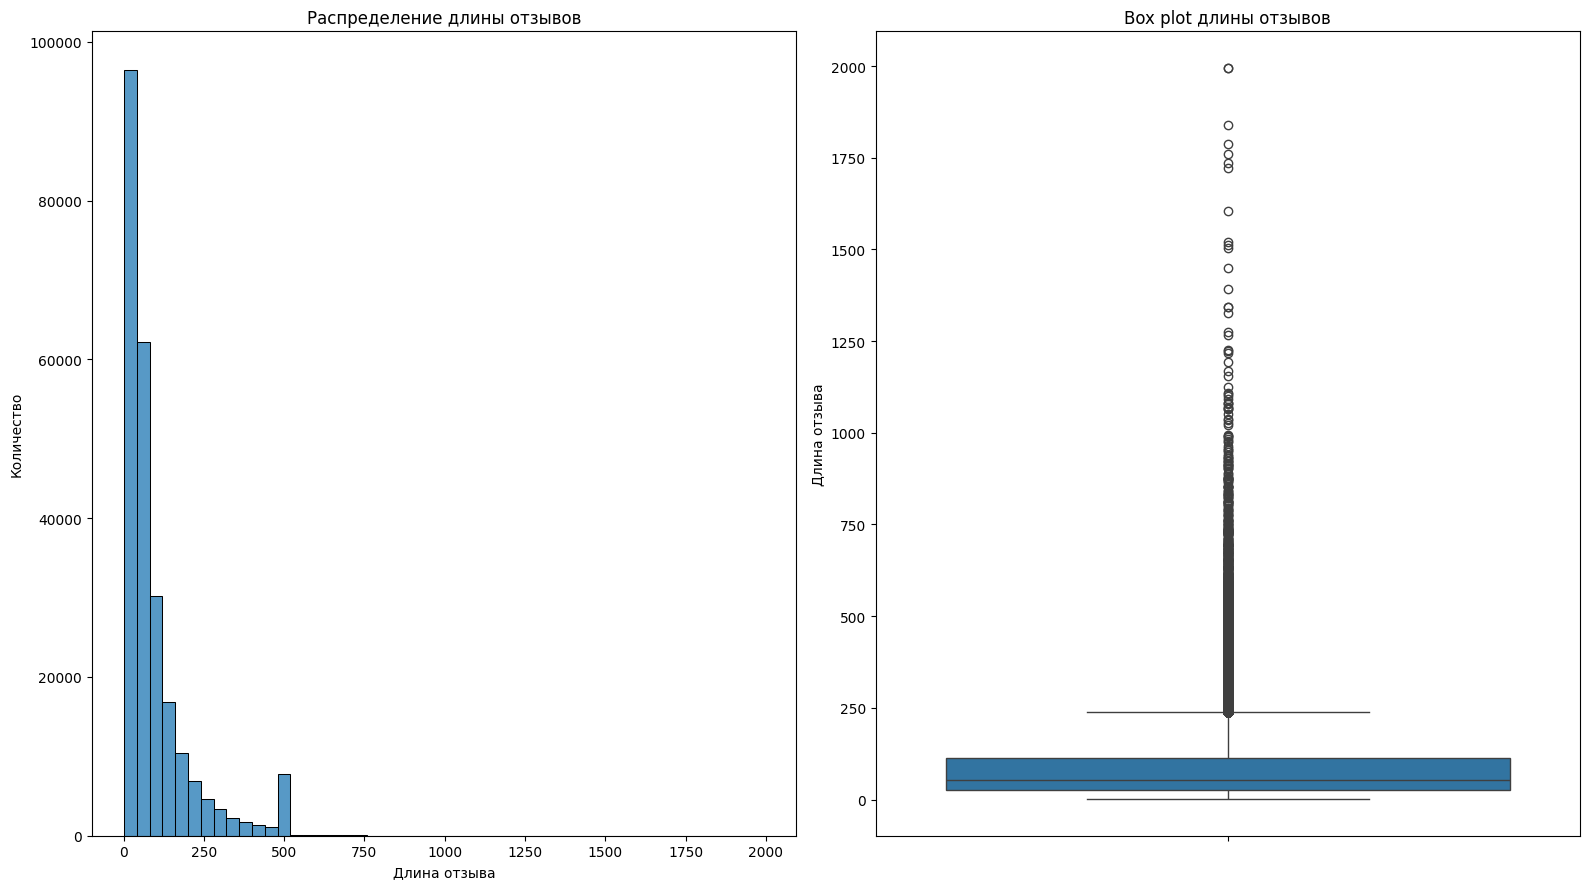


Корреляция между длиной отзыва и оценкой: -0.104


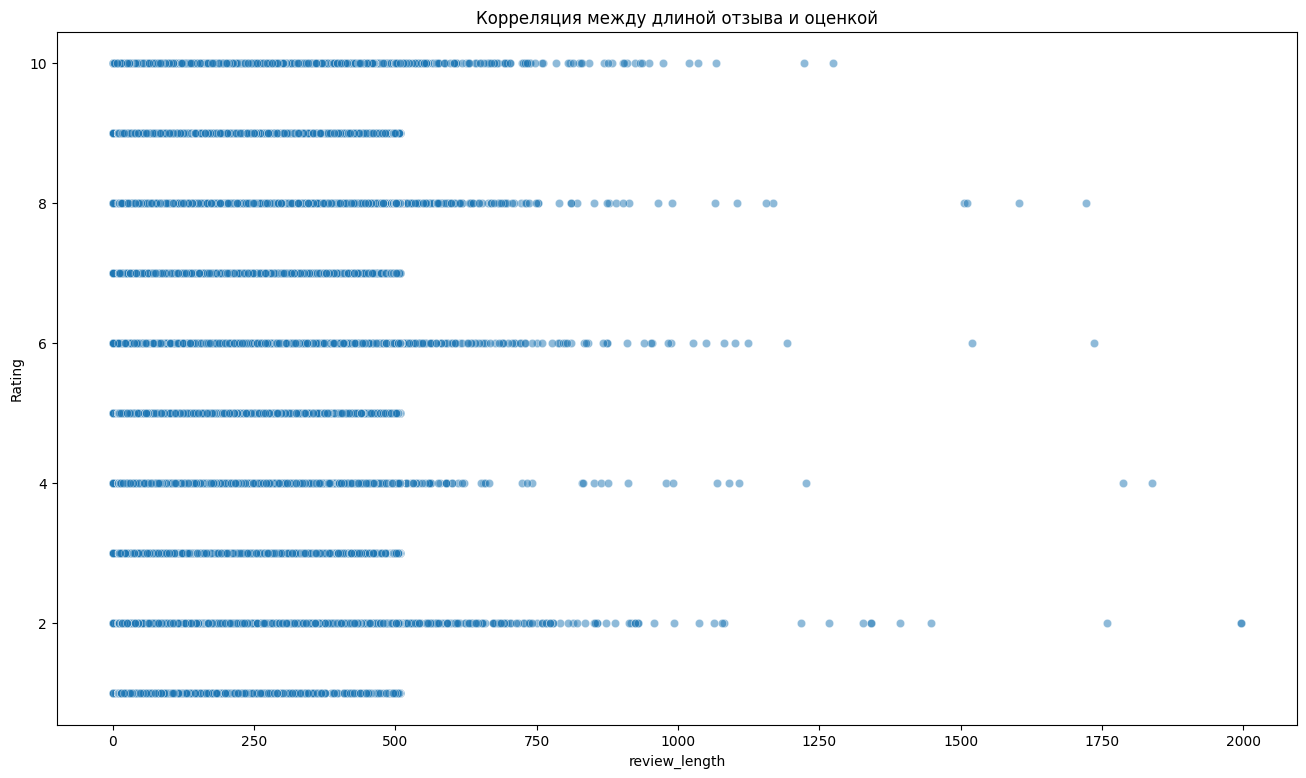


Анализ выбросов:
Количество выбросов: 22825
Процент выбросов: 9.29%

Средняя оценка для обычных отзывов: 7.50
Средняя оценка для очень длинных отзывов: 6.95


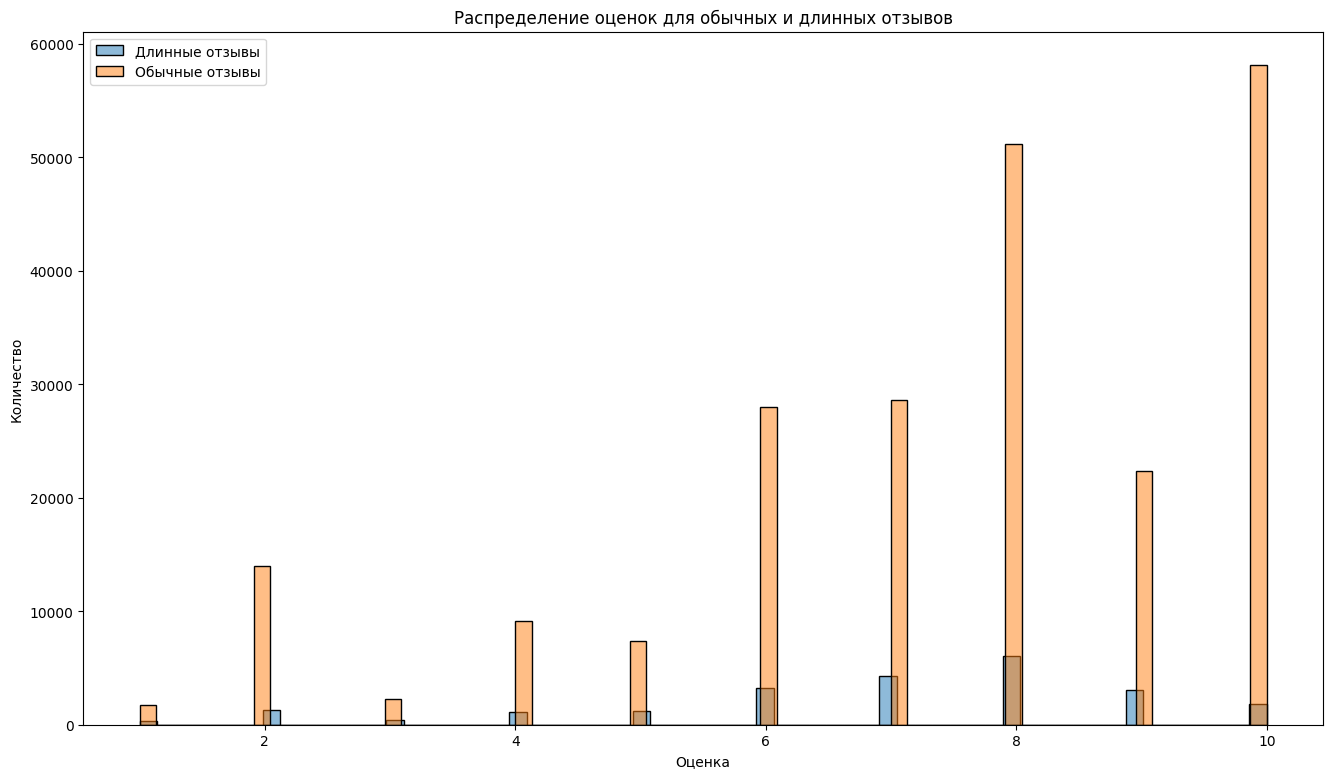


Топ-10 самых частых смайликов:
👍: 3814


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


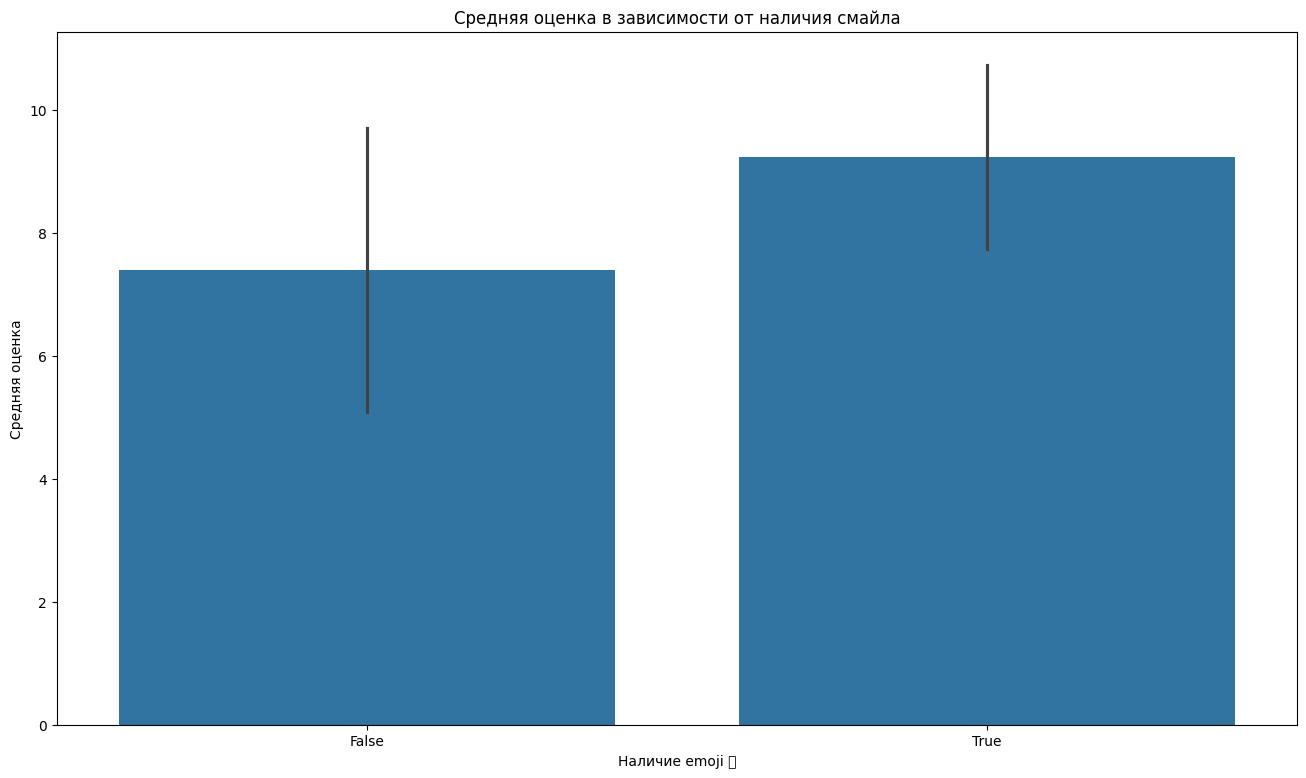

🔥: 983


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


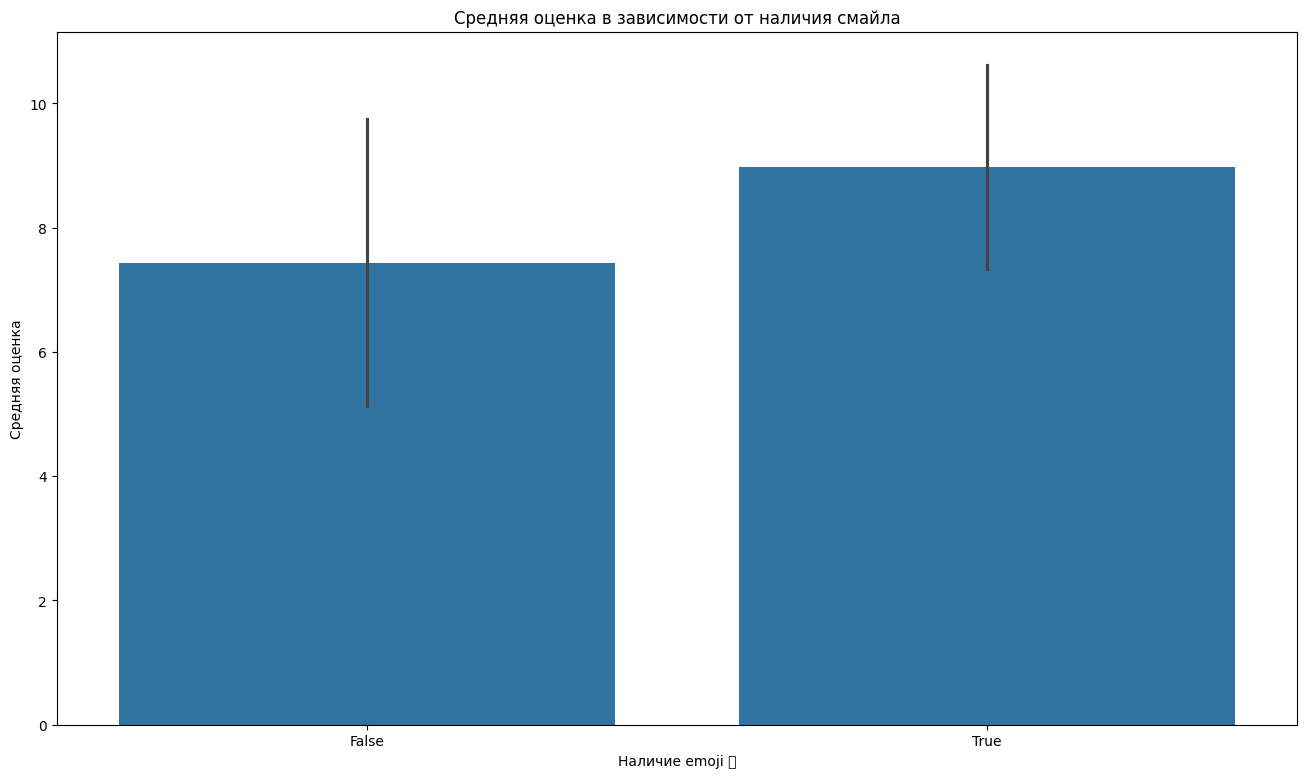

❤️: 969


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


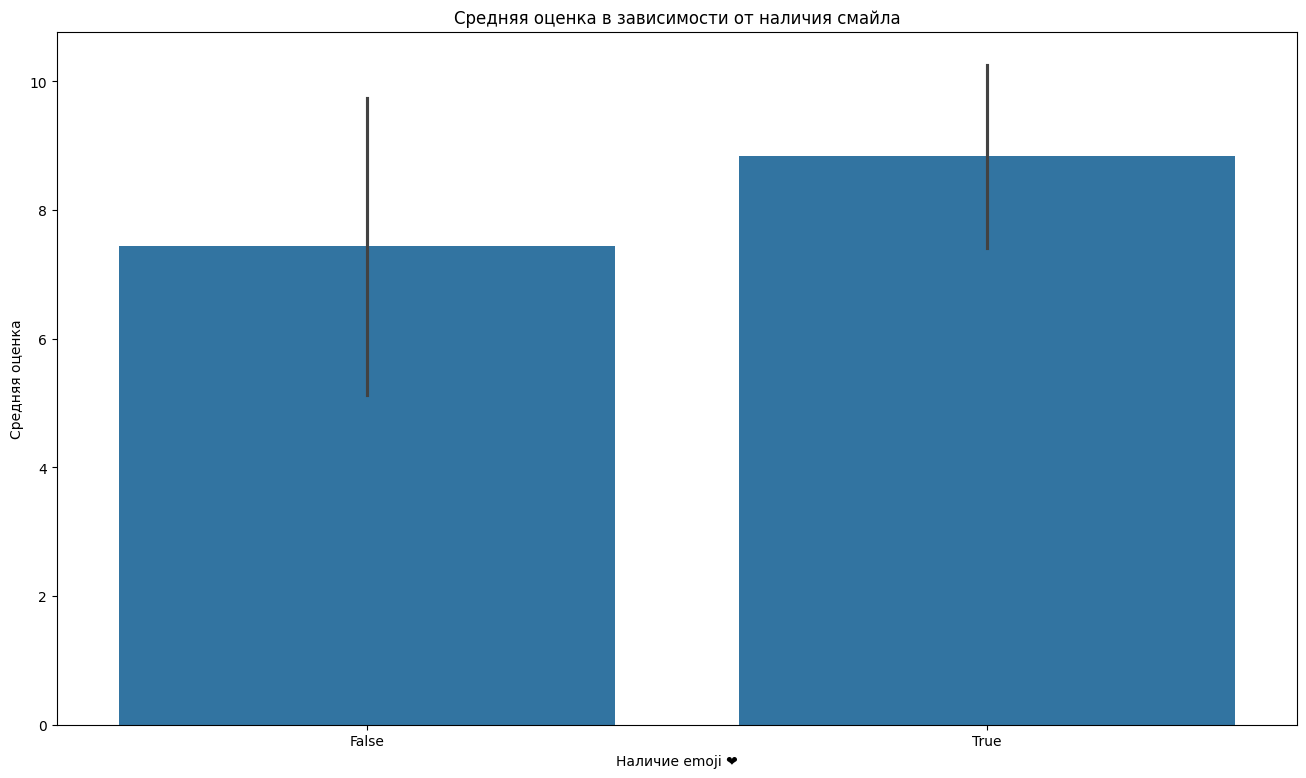

😍: 739


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


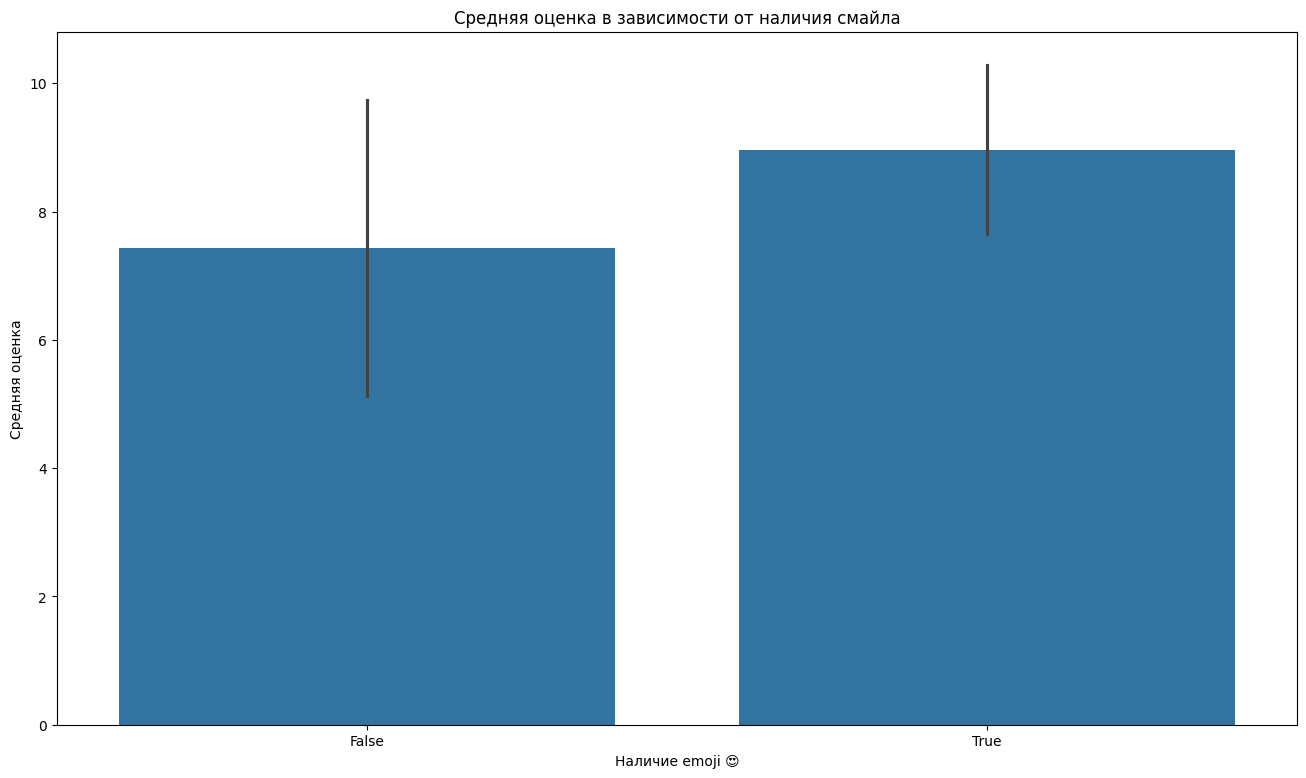

👍🏻: 729


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


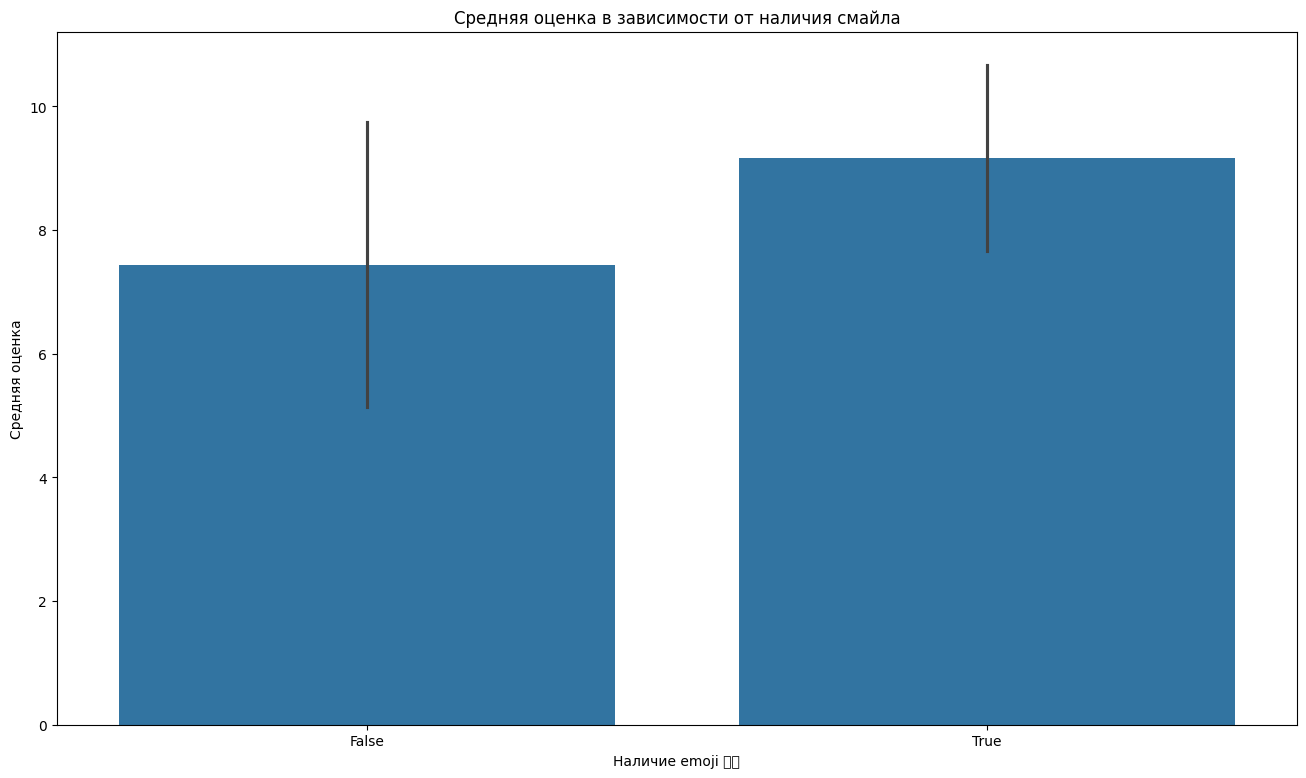

😂: 555


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


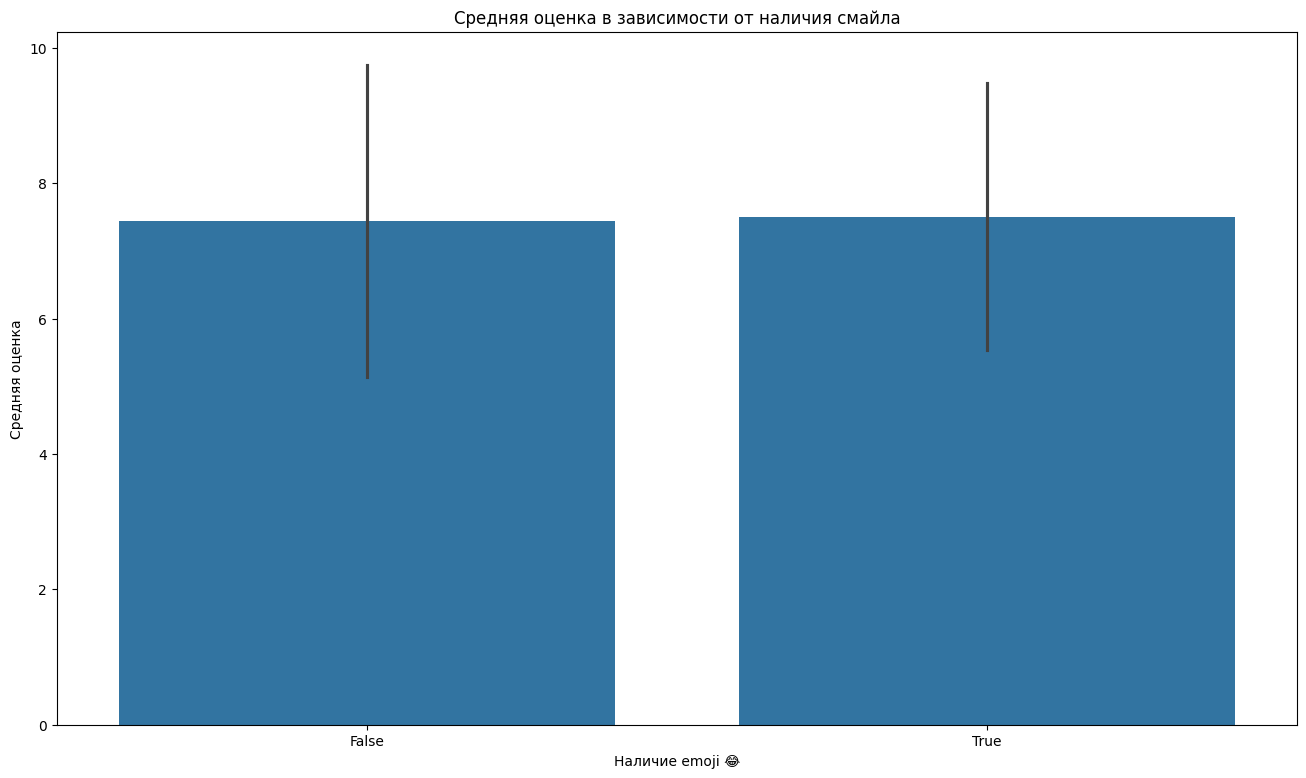

💔: 540


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128148 (\N{BROKEN HEART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


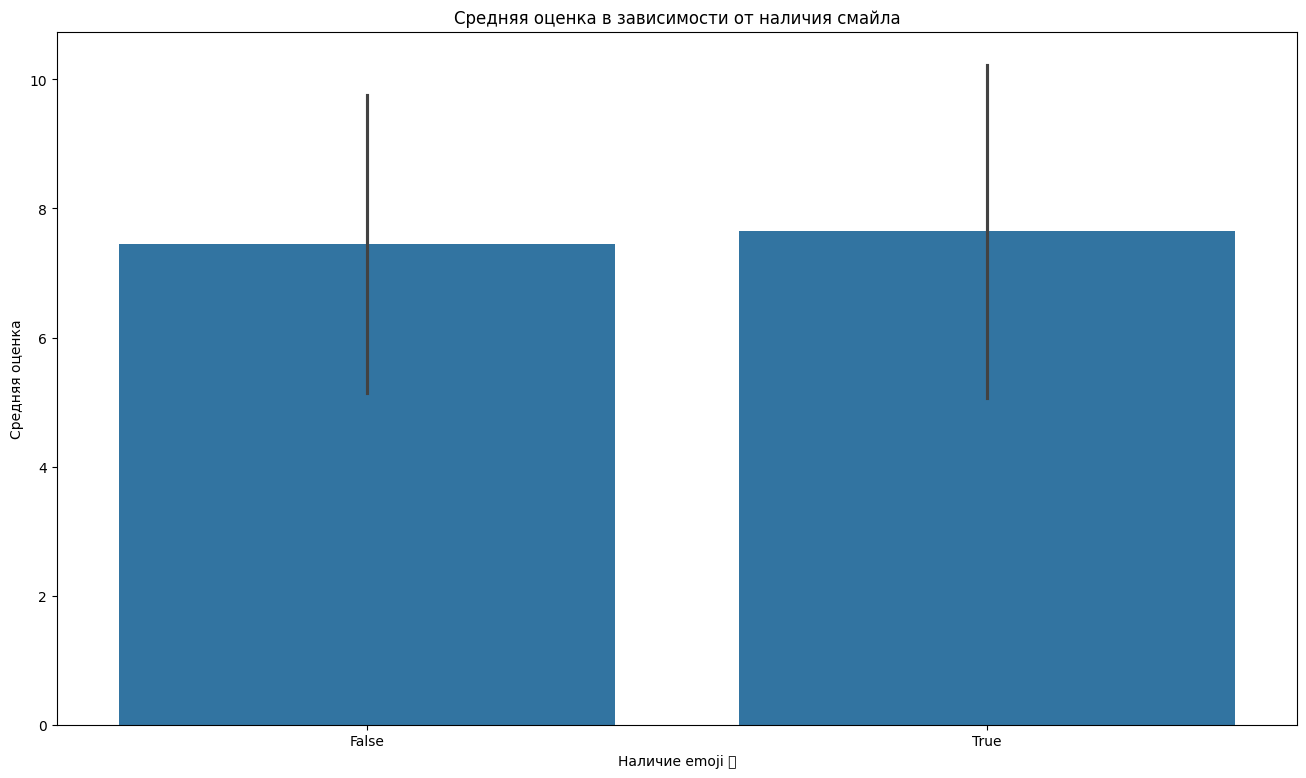

👌: 508


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


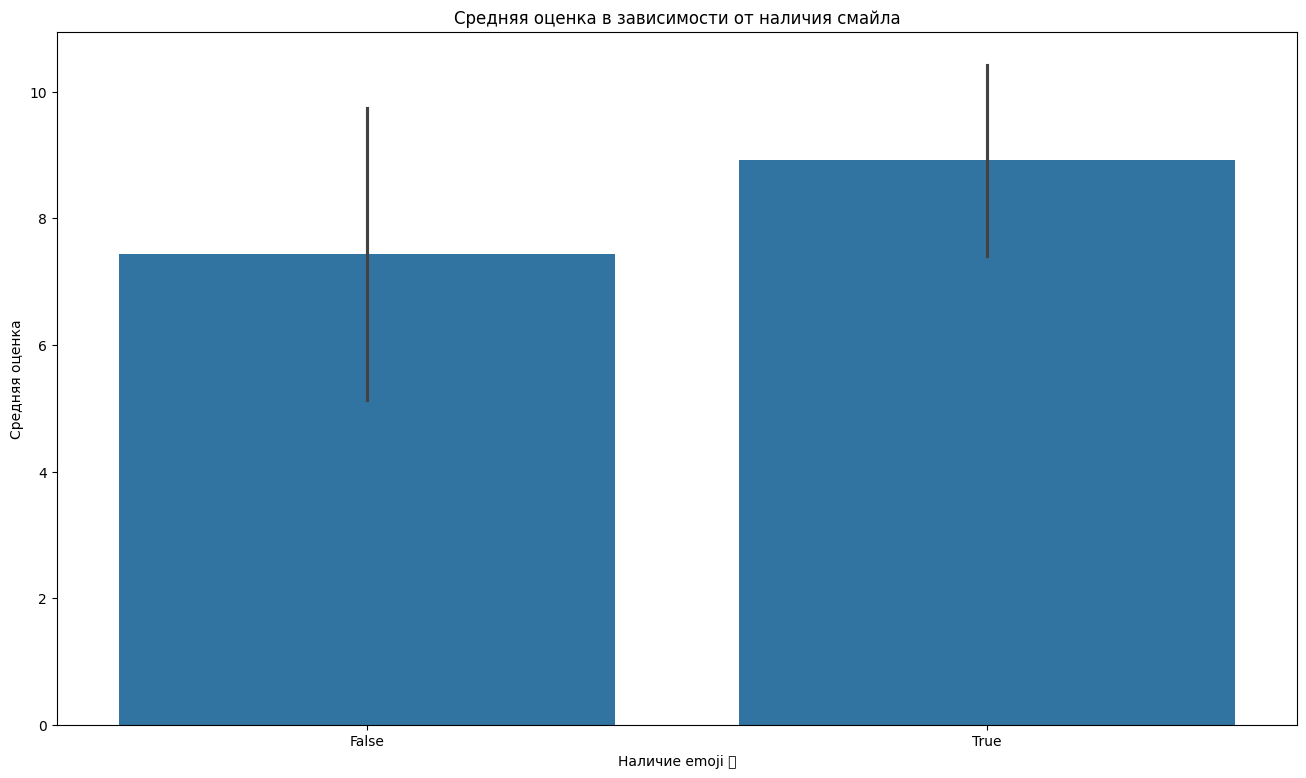

🏻: 457


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127995 (\N{EMOJI MODIFIER FITZPATRICK TYPE-1-2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


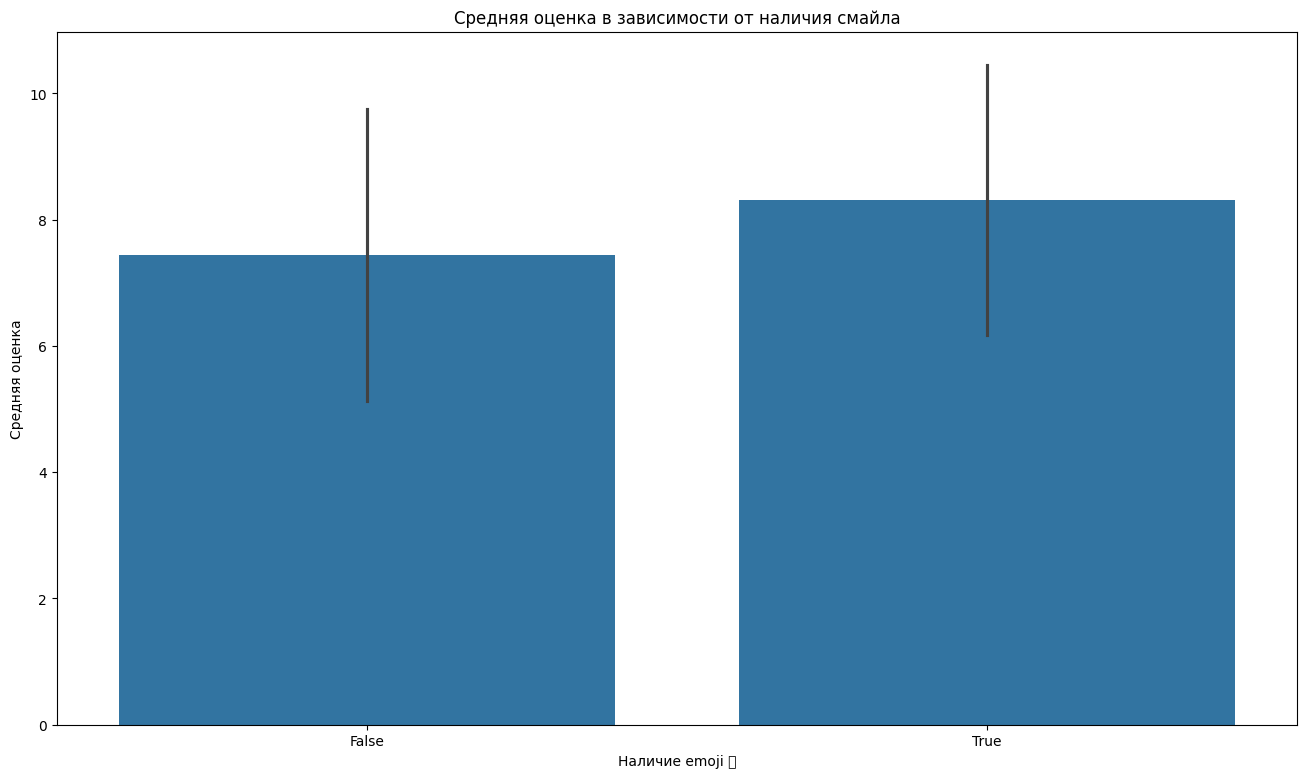

♀️: 447


<ipython-input-57-816a397d5e2a>:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")


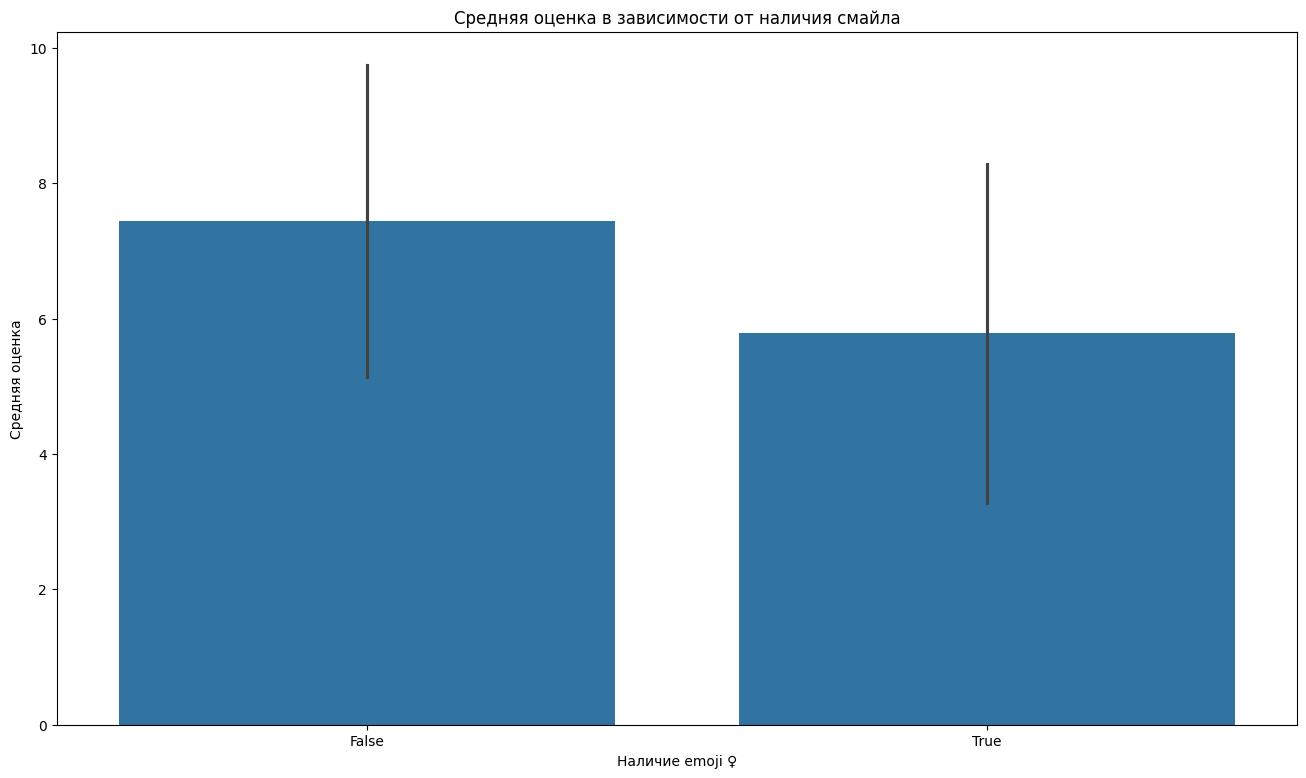


Корреляция между количеством смайликов и оценкой: 0.073


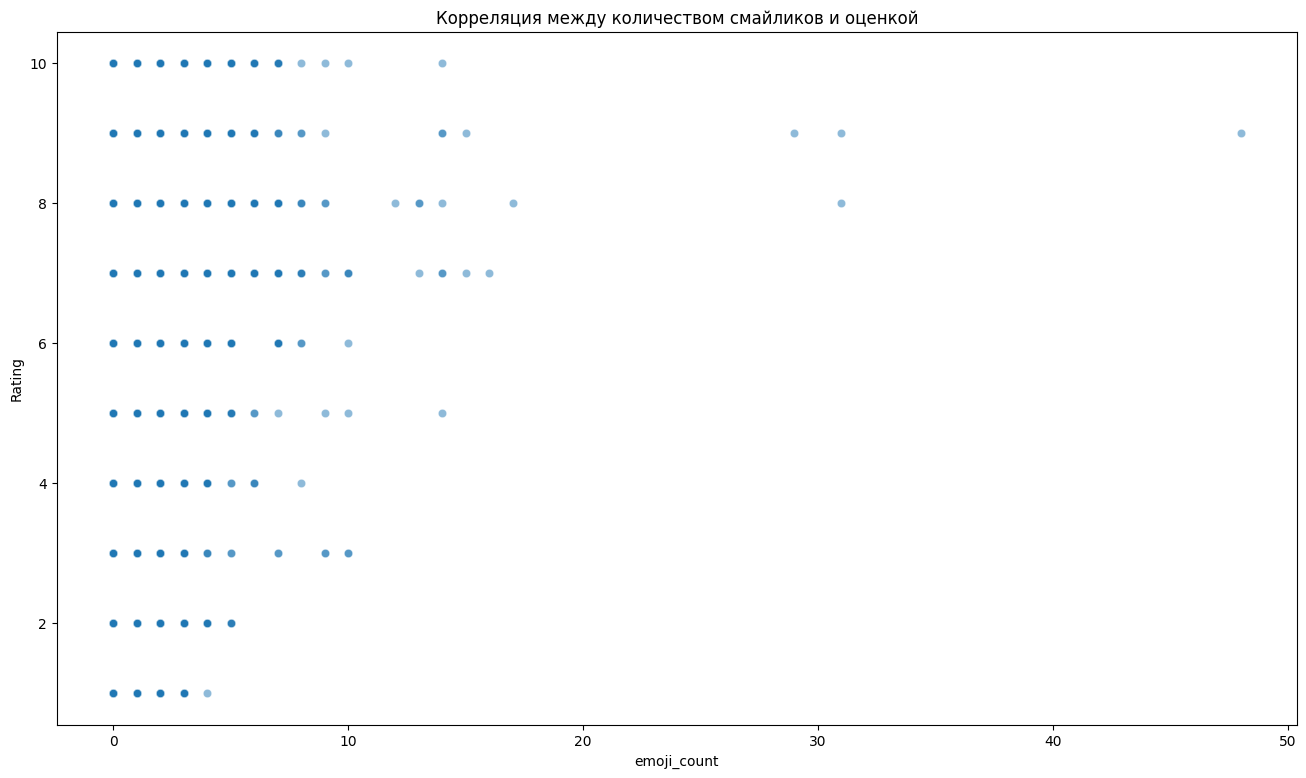

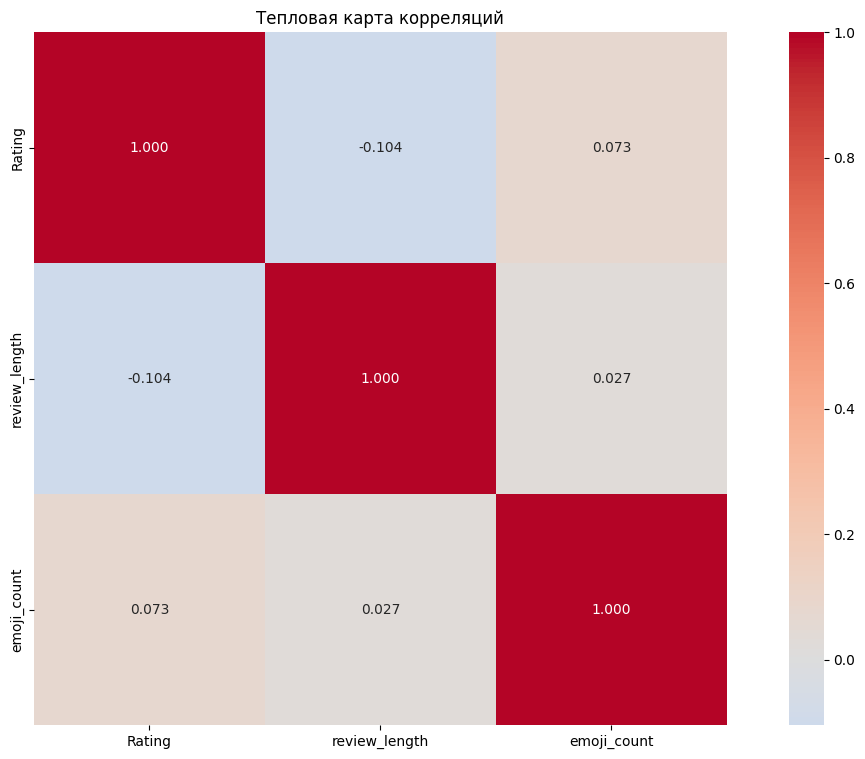

In [57]:
plt.figure(figsize=(16, 9))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='review_length', bins=50)
plt.title('Распределение длины отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['review_length'])
plt.title('Box plot длины отзывов')
plt.ylabel('Длина отзыва')

plt.tight_layout()
plt.show()

Q1 = df['review_length'].quantile(0.25)
Q3 = df['review_length'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR

outliers_mask = df['review_length'] > outlier_threshold

correlation = df['review_length'].corr(df['Rating'])
print(f"\nКорреляция между длиной отзыва и оценкой: {correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='review_length', y='Rating', alpha=0.5)
plt.title('Корреляция между длиной отзыва и оценкой')
plt.show()

print("\nАнализ выбросов:")
print(f"Количество выбросов: {outliers_mask.sum()}")
print(f"Процент выбросов: {(outliers_mask.sum() / len(df)) * 100:.2f}%")

print(f"\nСредняя оценка для обычных отзывов: {df[~outliers_mask]['Rating'].mean():.2f}")
print(f"Средняя оценка для очень длинных отзывов: {df[outliers_mask]['Rating'].mean():.2f}")

plt.figure(figsize=(16, 9))
sns.histplot(data=df[outliers_mask], x='Rating', label='Длинные отзывы', alpha=0.5)
sns.histplot(data=df[~outliers_mask], x='Rating', label='Обычные отзывы', alpha=0.5)
plt.title('Распределение оценок для обычных и длинных отзывов')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend()
plt.show()

from collections import Counter
import re

def extract_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.findall(text)

all_emojis = []
for review in df['Review']:
    if isinstance(review, str):
        all_emojis.extend(extract_emojis(review))

emoji_counts = Counter(all_emojis)

print("\nТоп-10 самых частых смайликов:")
for emoji, count in emoji_counts.most_common(10):
    print(f"{emoji}: {count}")
    edf = df.copy()
    edf["has_emoji"] = edf["Review"].apply(lambda x: x != None and emoji in str(x))
    fig = plt.figure(figsize=(16, 9))
    sns.barplot(x='has_emoji', y='Rating', data=edf, ci="sd")
    plt.xlabel(f"Наличие emoji {emoji}")
    plt.ylabel("Средняя оценка")
    plt.title("Средняя оценка в зависимости от наличия смайла")
    plt.show()

df['emoji_count'] = df['Review'].apply(lambda x: len(extract_emojis(str(x))) if isinstance(x, str) else 0)

emoji_correlation = df['emoji_count'].corr(df['Rating'])
print(f"\nКорреляция между количеством смайликов и оценкой: {emoji_correlation:.3f}")

plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='emoji_count', y='Rating', alpha=0.5)
plt.title('Корреляция между количеством смайликов и оценкой')
plt.show()

plt.figure(figsize=(16, 9))
sns.heatmap(df[['Rating', 'review_length', 'emoji_count']].corr(),
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.3f',
            square=True)
plt.title('Тепловая карта корреляций')
plt.show()

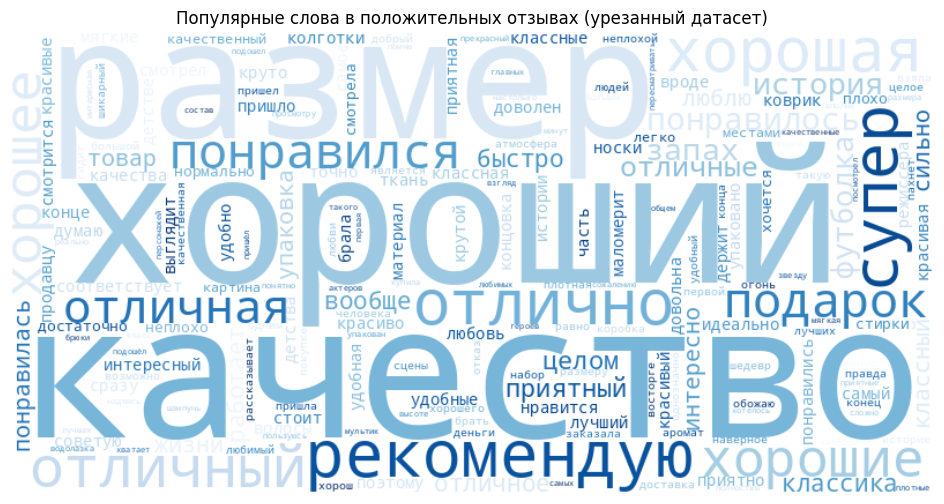

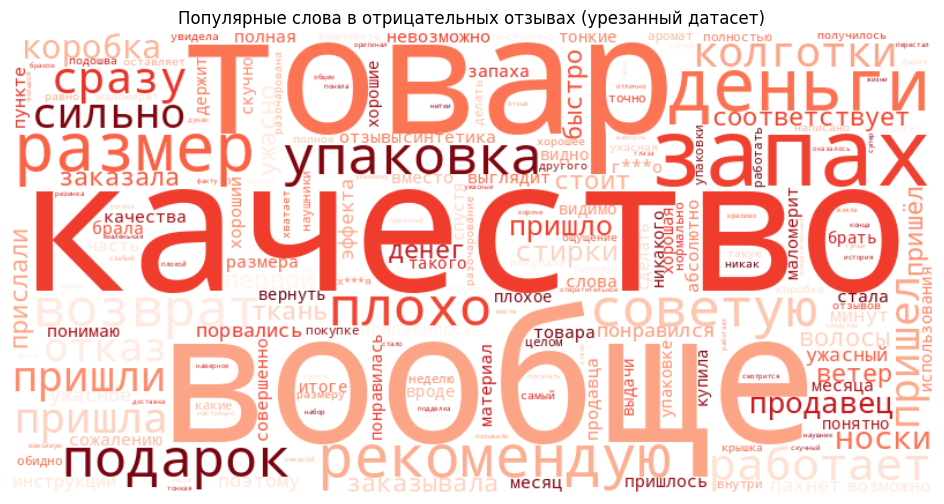

In [58]:
positive_reviews = df[df['Rating'] >= 7]['Review']
negative_reviews = df[df['Rating'] <= 4]['Review']

positive_words = Counter(censor_text(word) for review in positive_reviews for word in extract_ru_words(review))
negative_words = Counter(censor_text(word) for review in negative_reviews for word in extract_ru_words(review))

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues', stopwords=STOPWORDS_RU).generate_from_frequencies(positive_words)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Популярные слова в положительных отзывах (урезанный датасет)')
plt.show()

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate_from_frequencies(negative_words)
plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Популярные слова в отрицательных отзывах (урезанный датасет)')
plt.show()

Топ-20 самых частых слов во всем датасете:
    Слово  Частота
0       и    85062
1      не    82405
2       в    66003
3      на    46880
4      но    35724
5   очень    30520
6   фильм    29967
7     что    27242
8       с    24975
9     как    21945
10    это    19755
11    все    17161
12      я    17030
13      а    15535
14    the    15393
15    для    13372
16     по    13082
17     за    12767
18      a    12415
19    так    12160

Топ-20 самых частых биграмм во всем датасете:
            Биграмма  Частота
0            (и, не)     3731
1      (этот, фильм)     3211
2         (в, целом)     2740
3        (не, очень)     2318
4   (хороший, фильм)     2202
5          (то, что)     2147
6           (но, не)     1943
7            (я, не)     1903
8          (у, меня)     1771
9          (of, the)     1751
10            (и, в)     1727
11     (this, movie)     1708
12       (в, размер)     1617
13           (но, в)     1601
14     (потому, что)     1562
15     (на, подарок)     1559
1

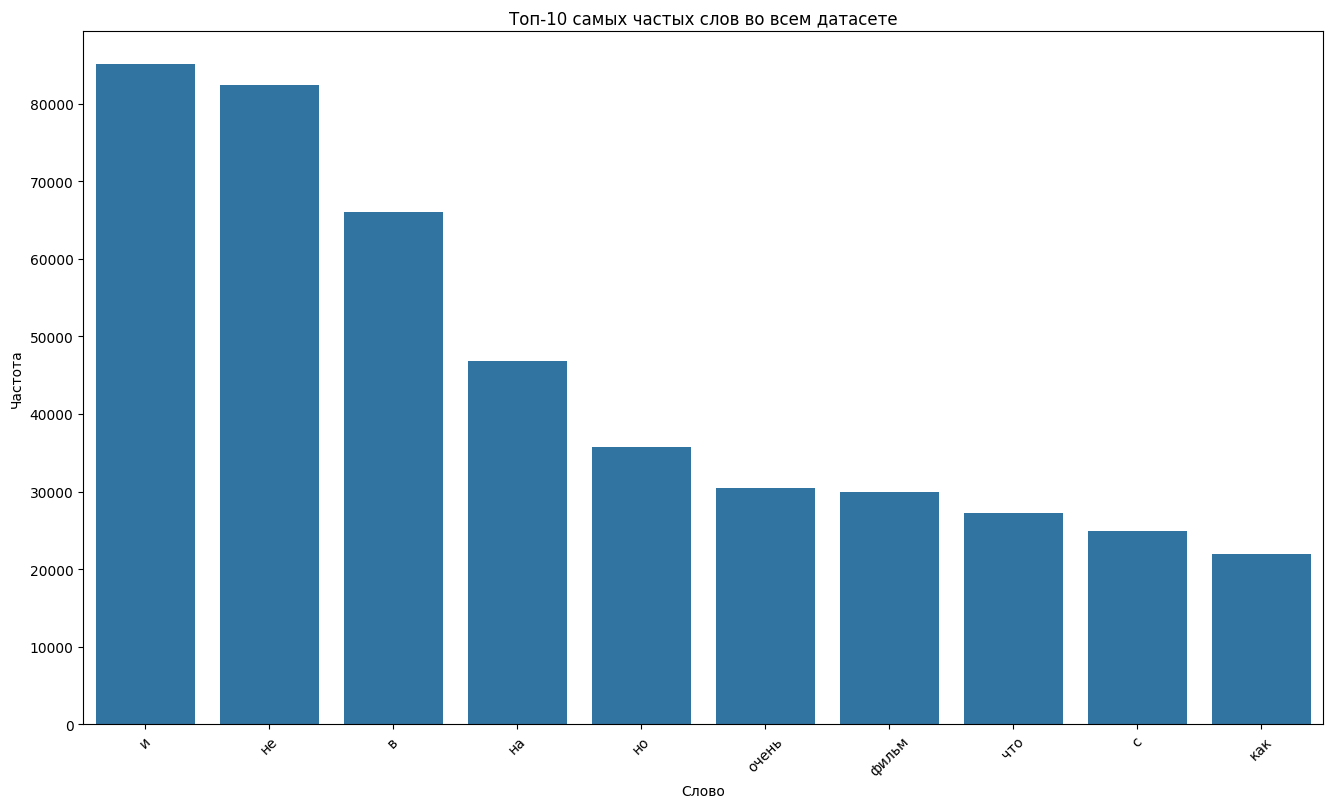

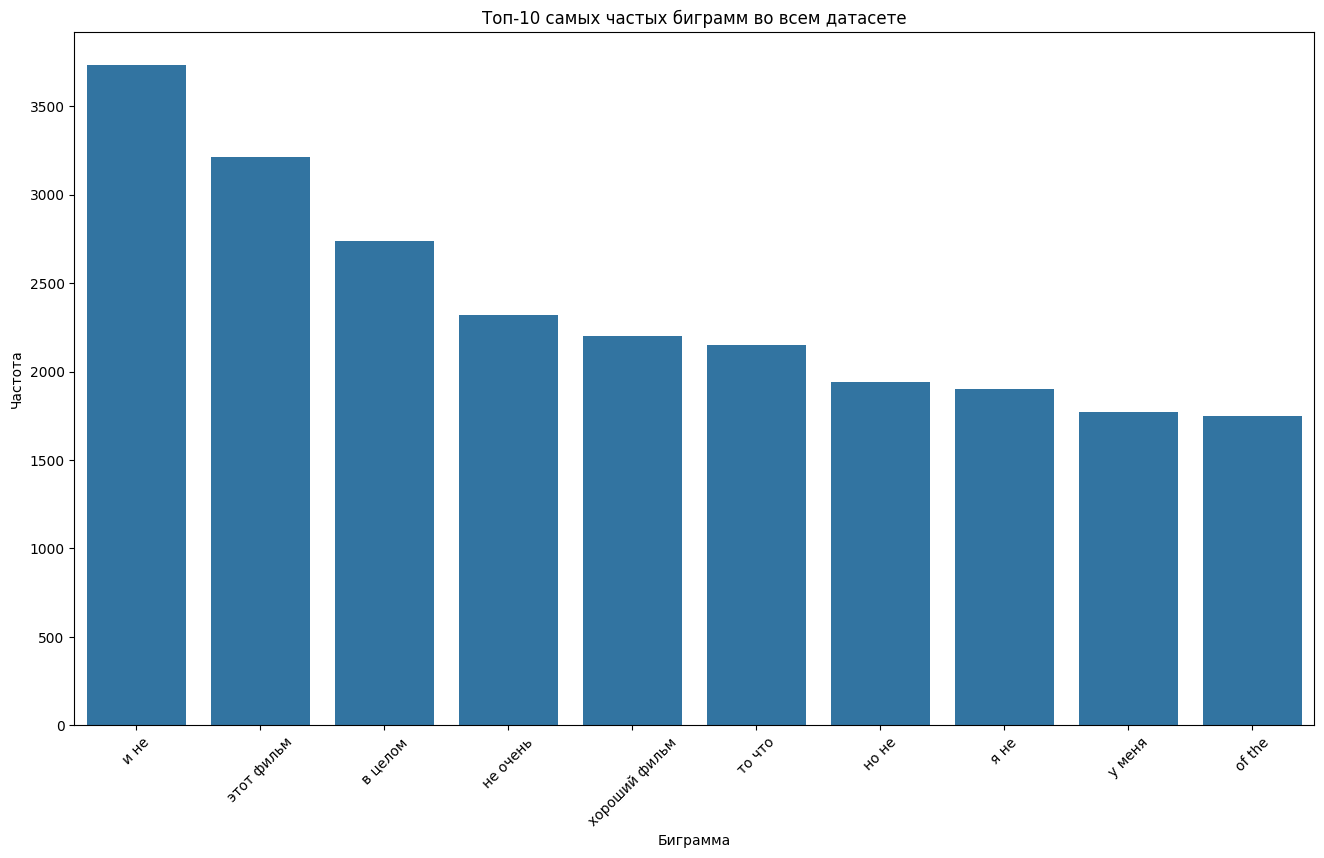

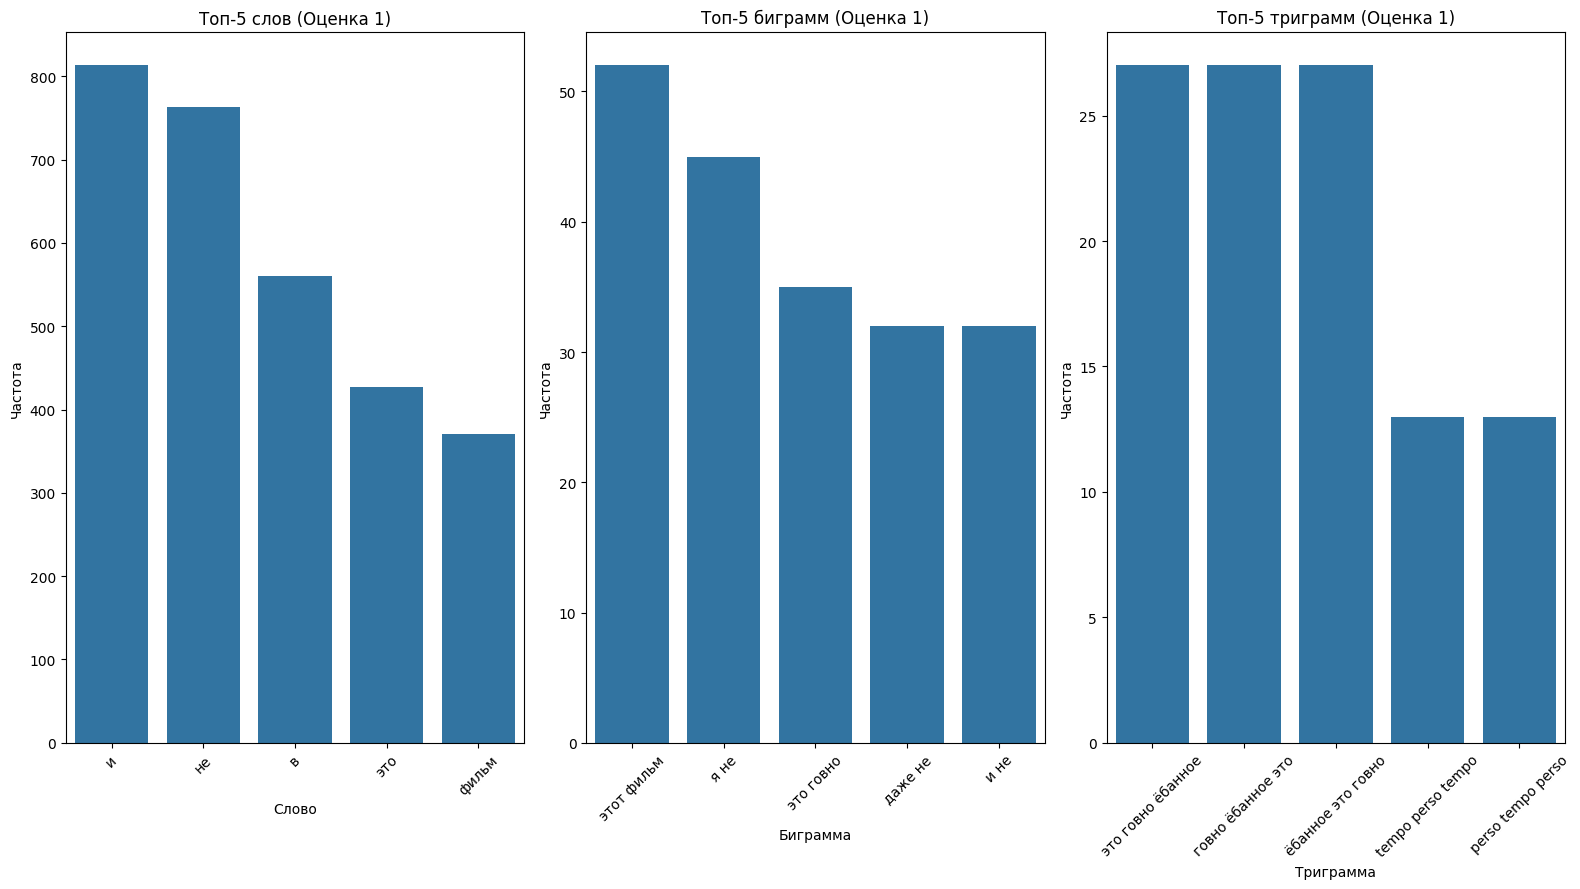

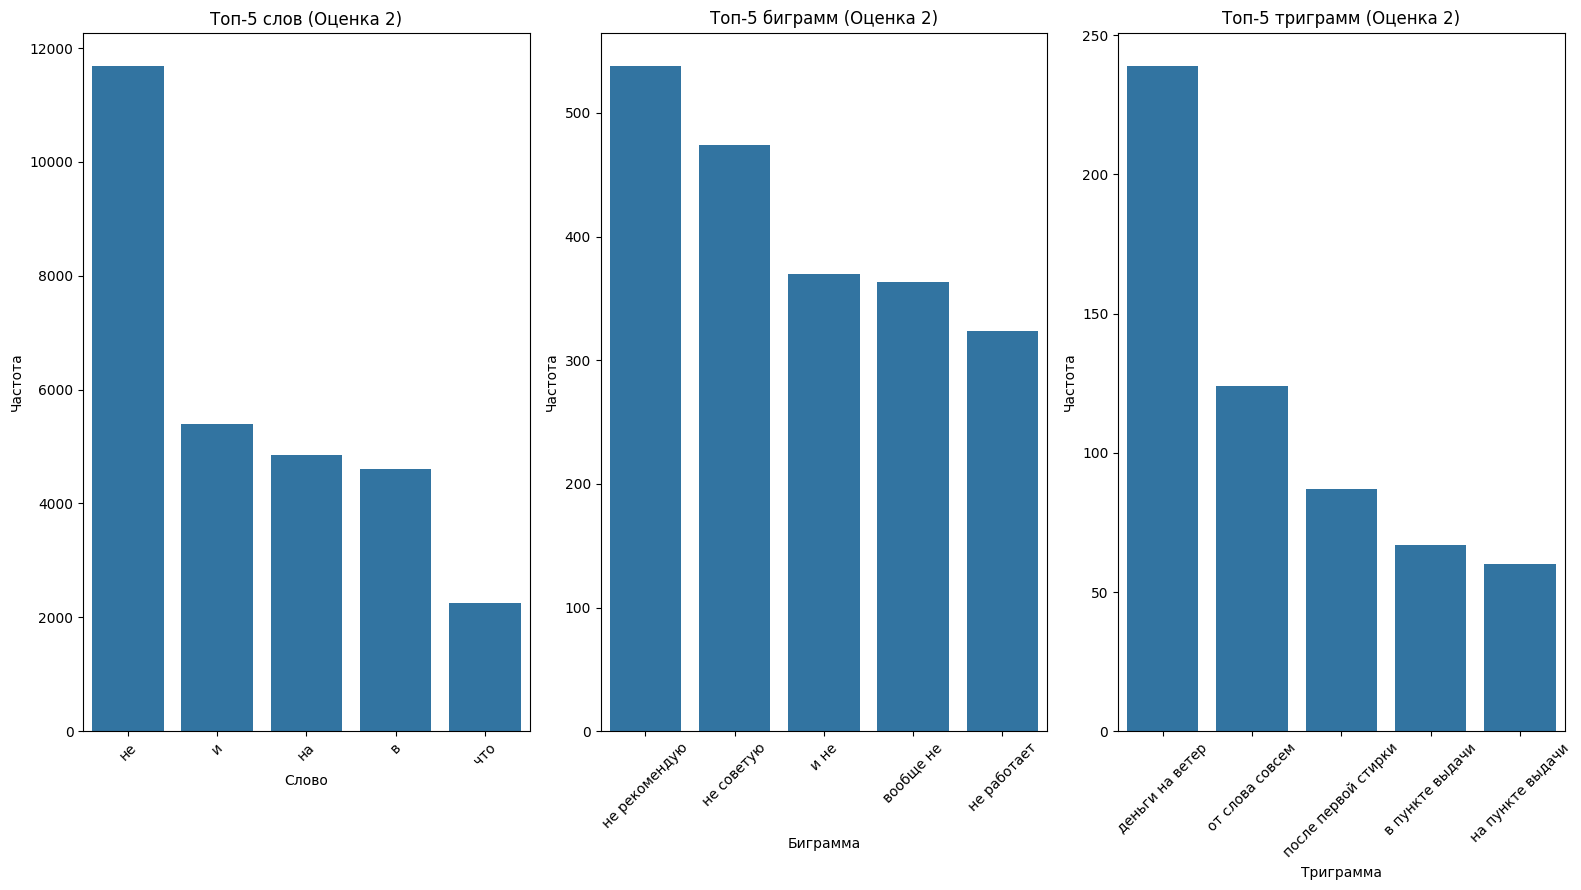

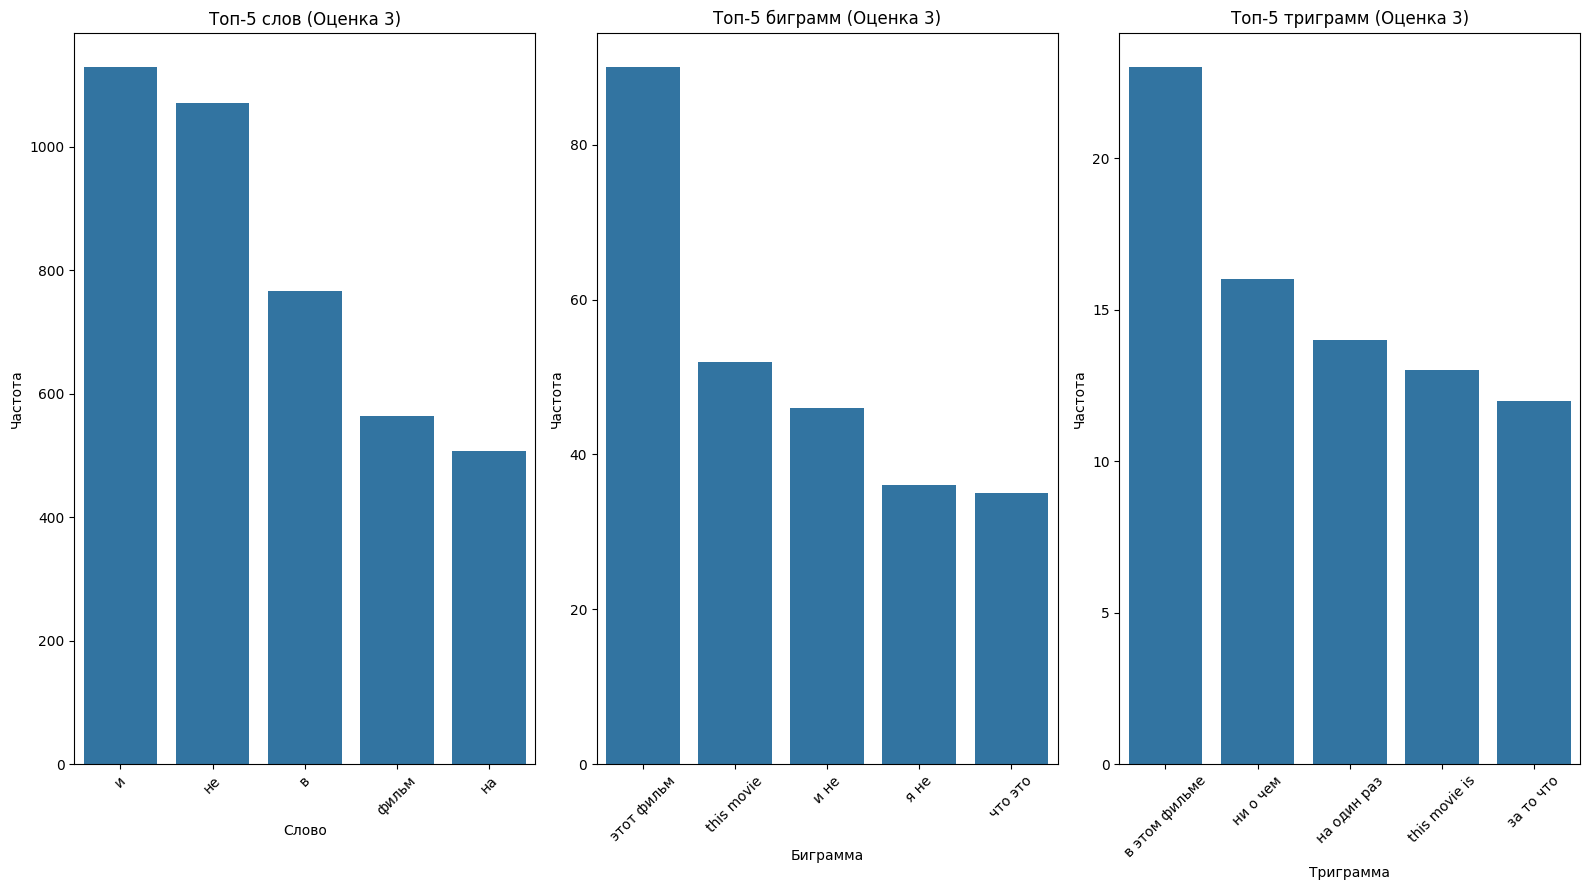

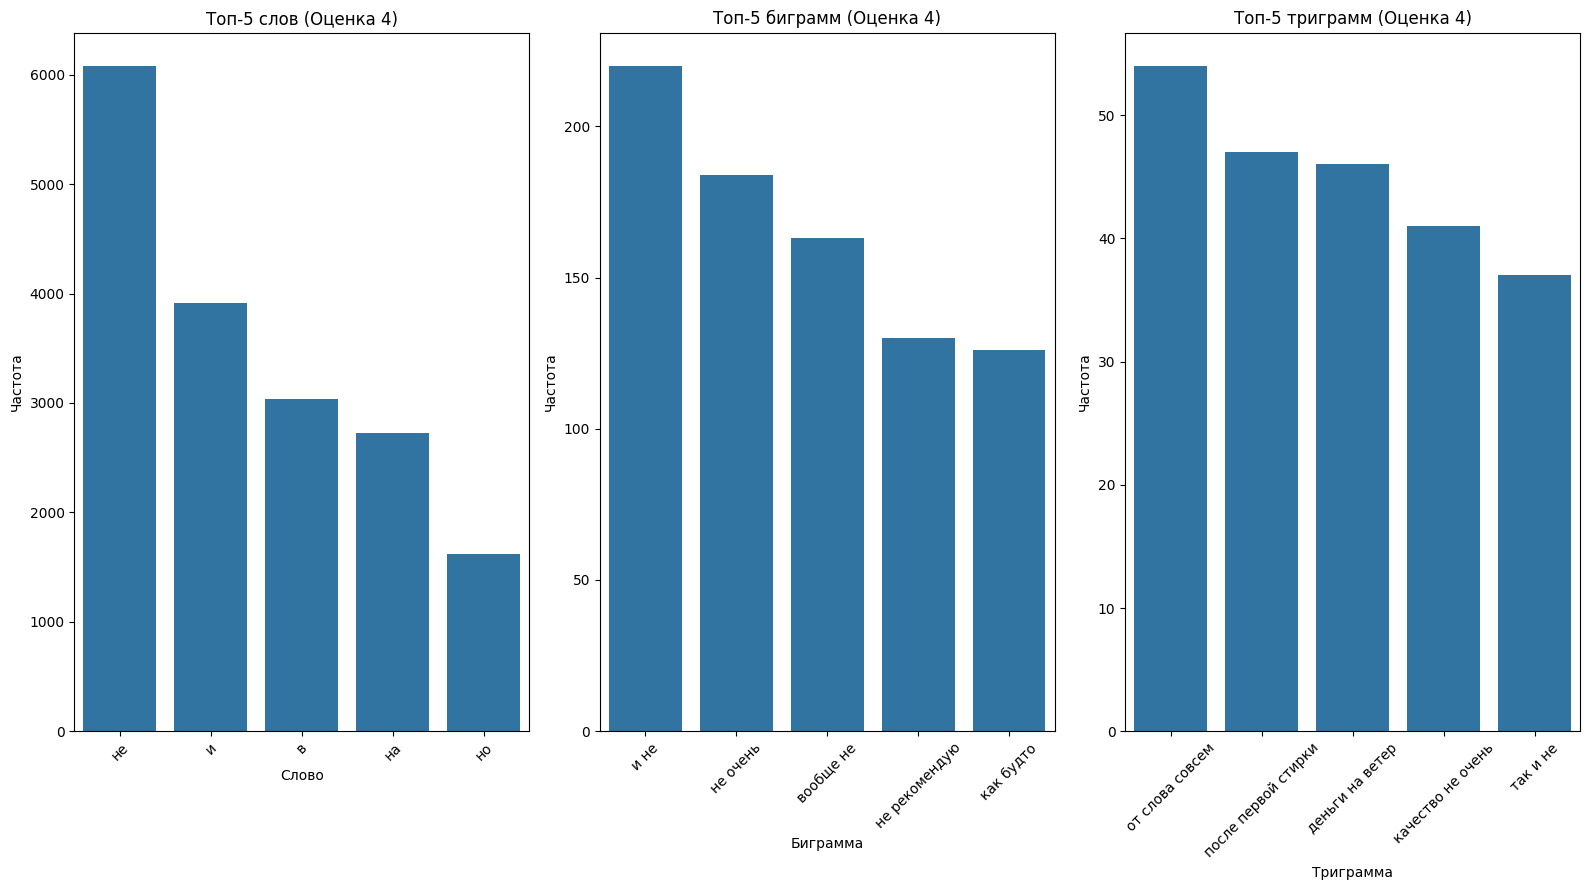

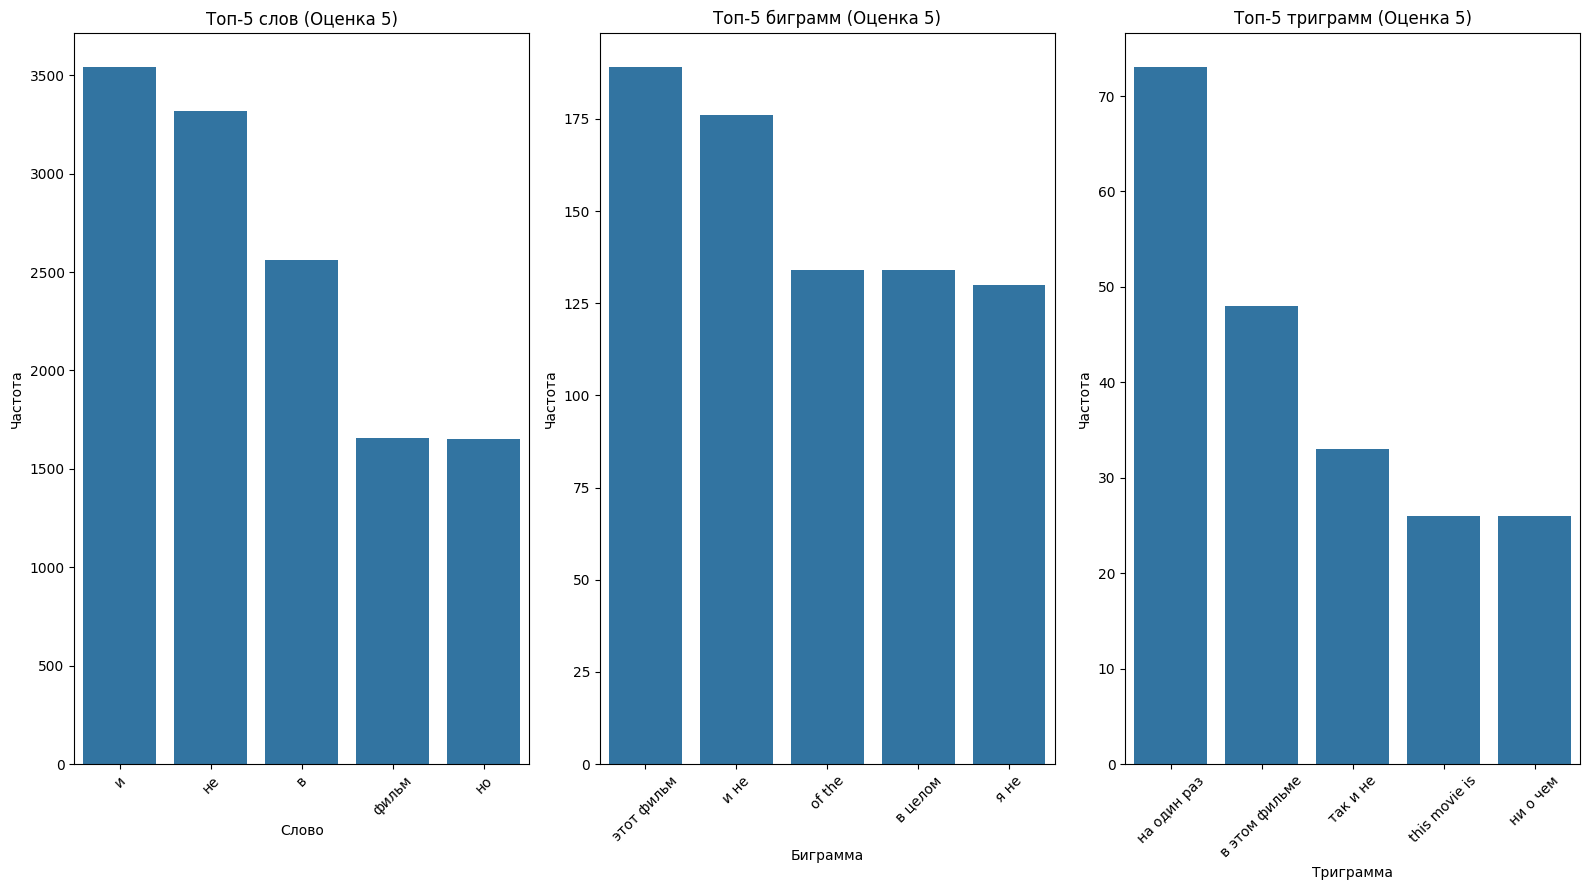

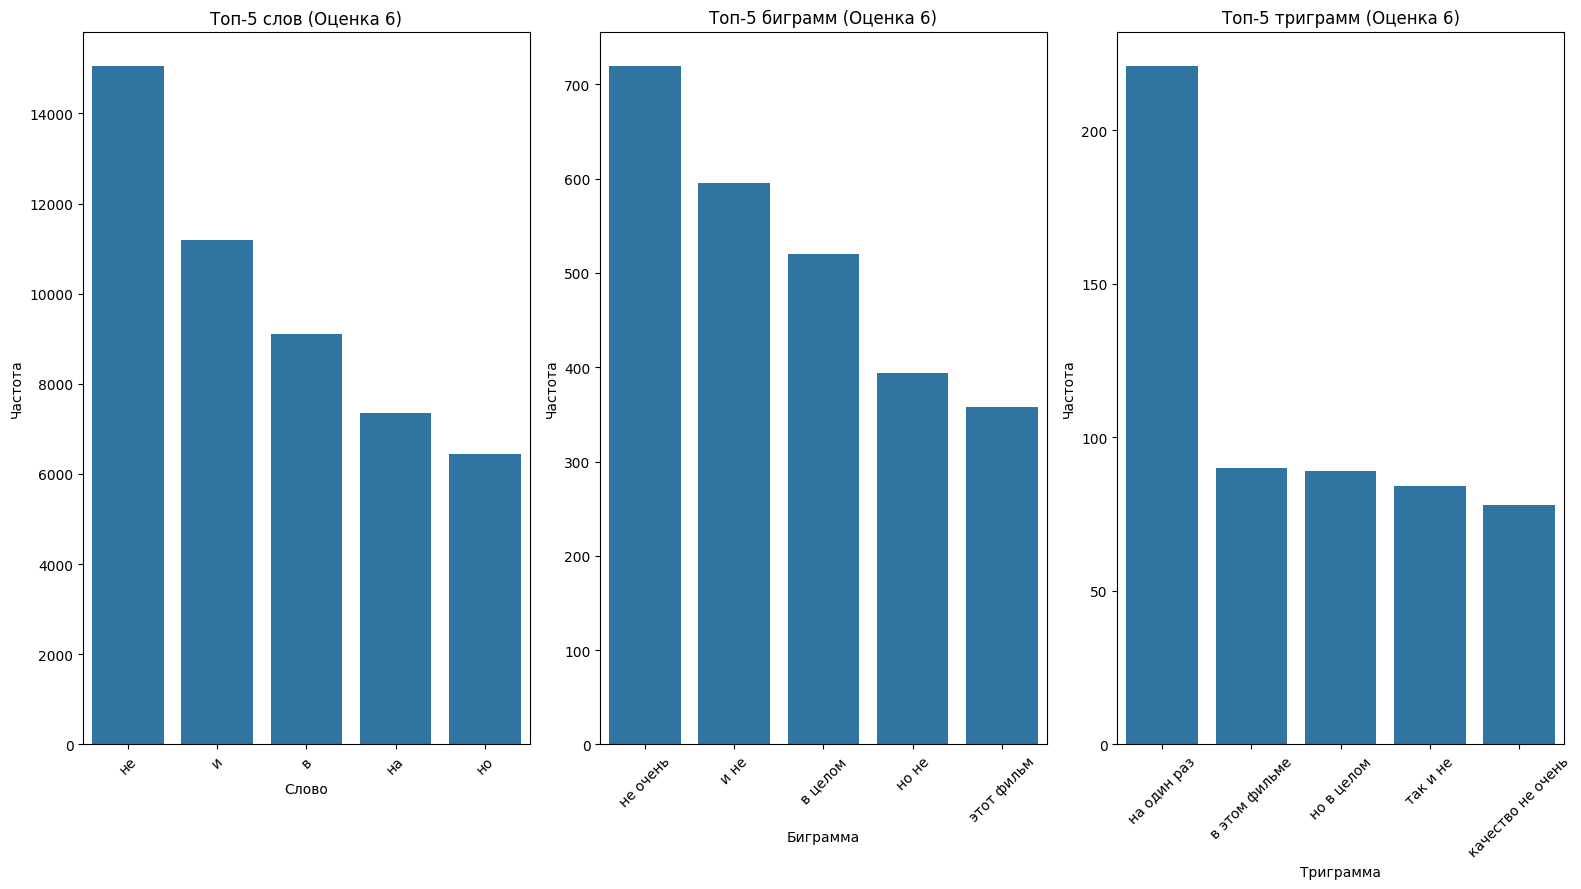

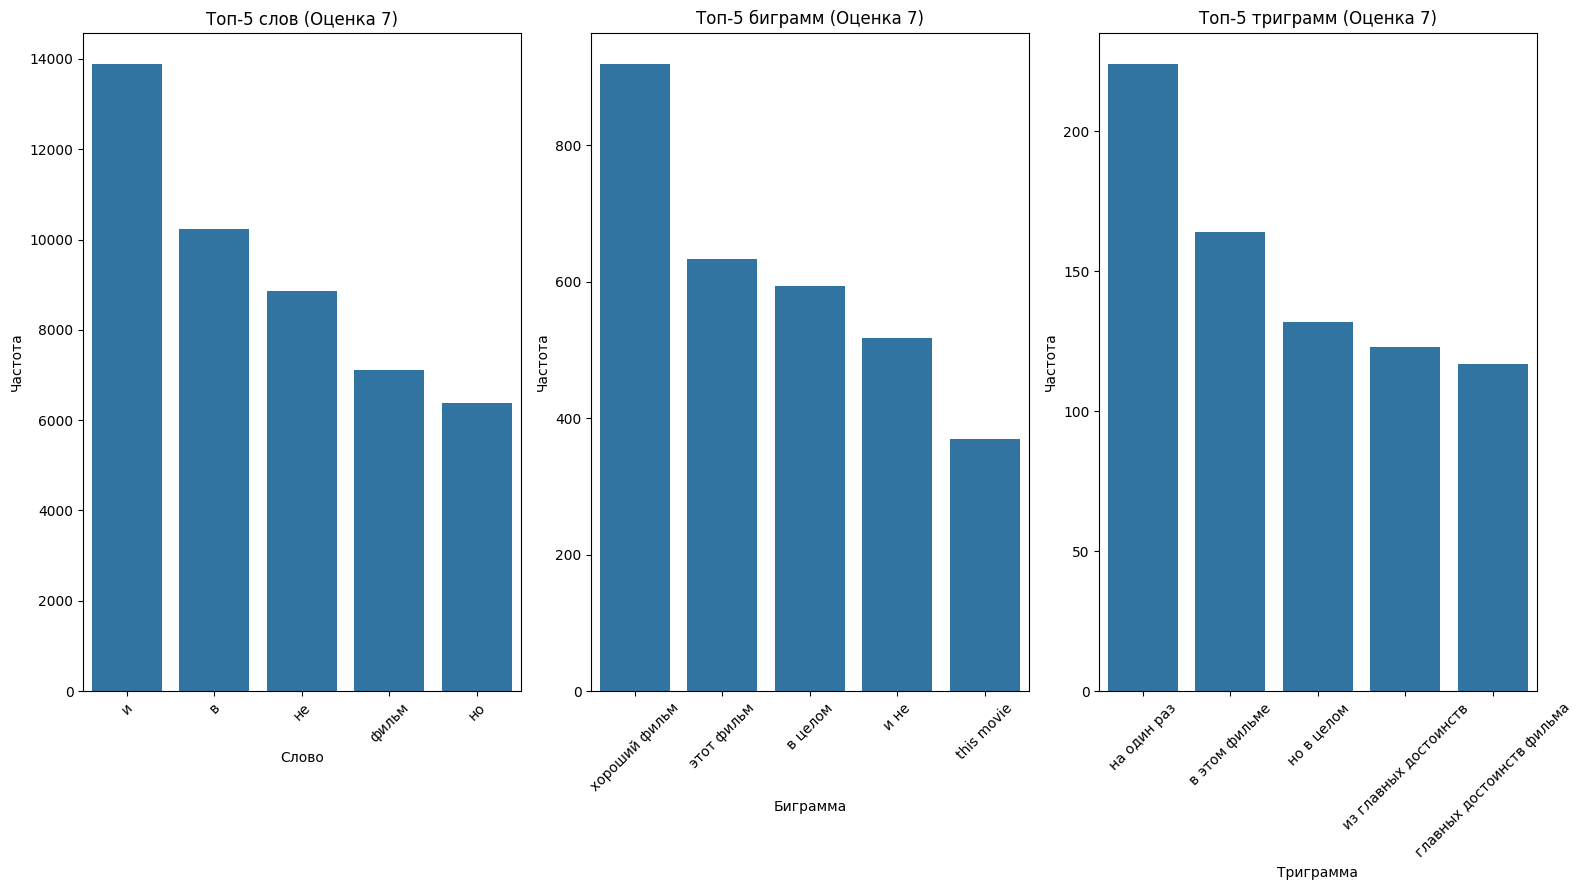

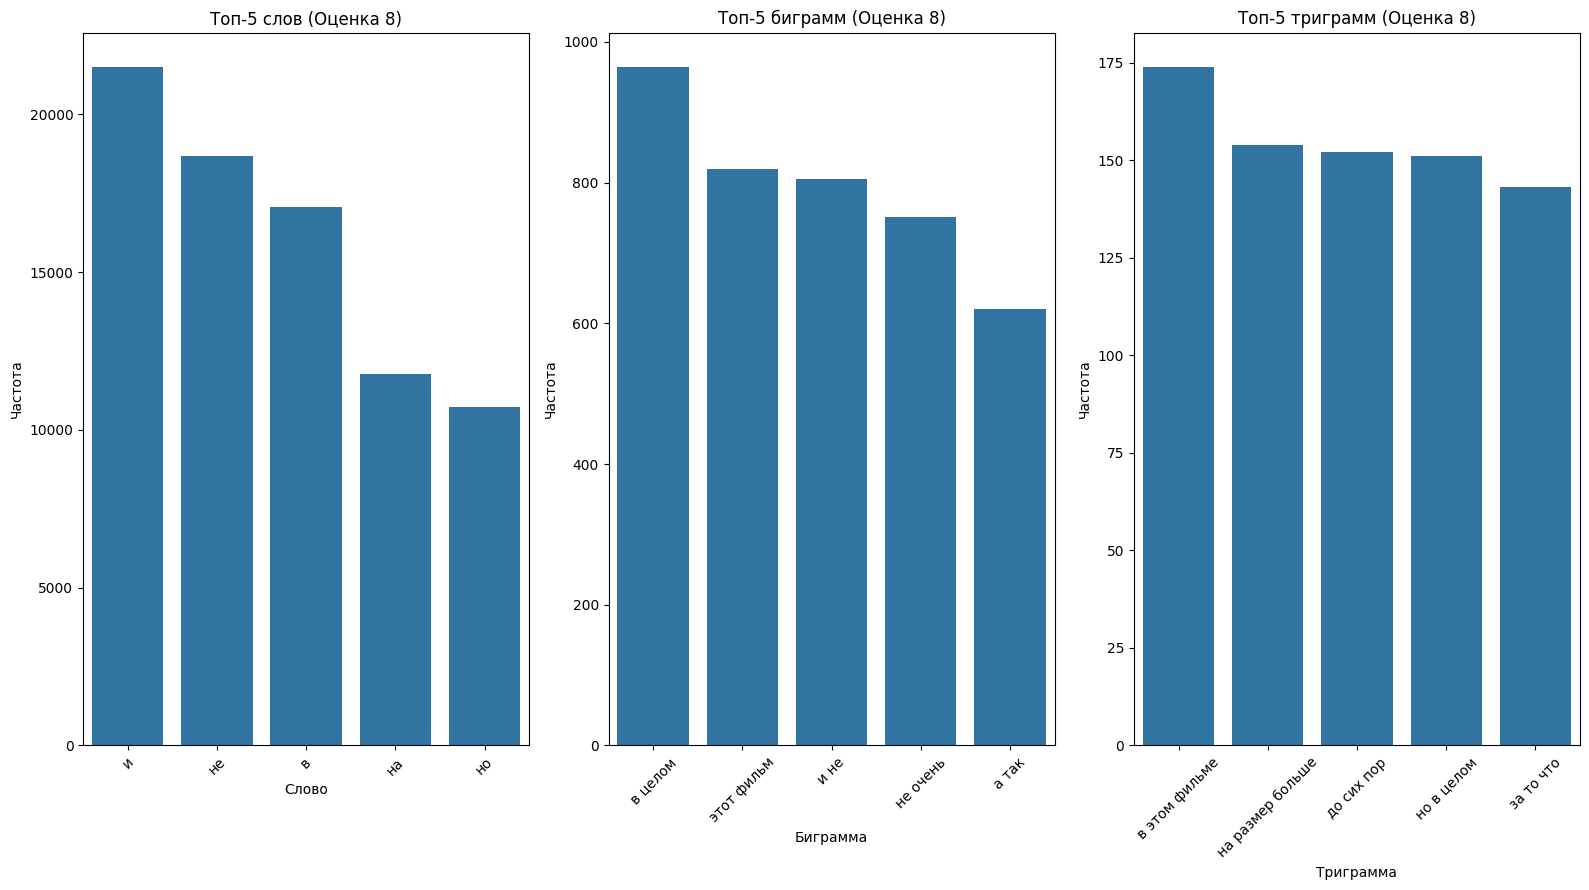

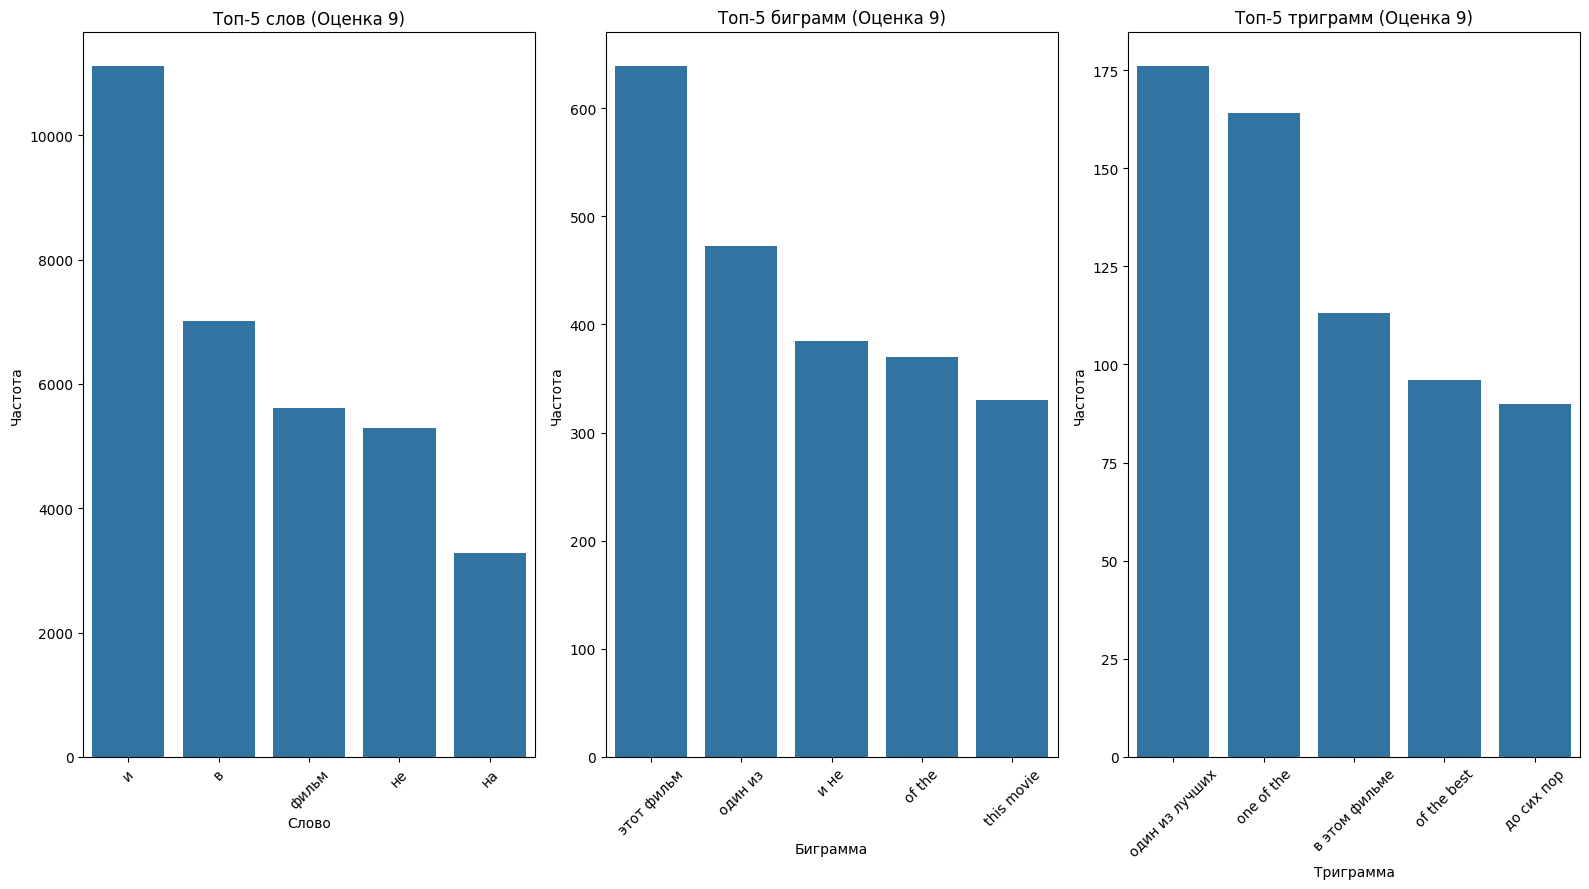

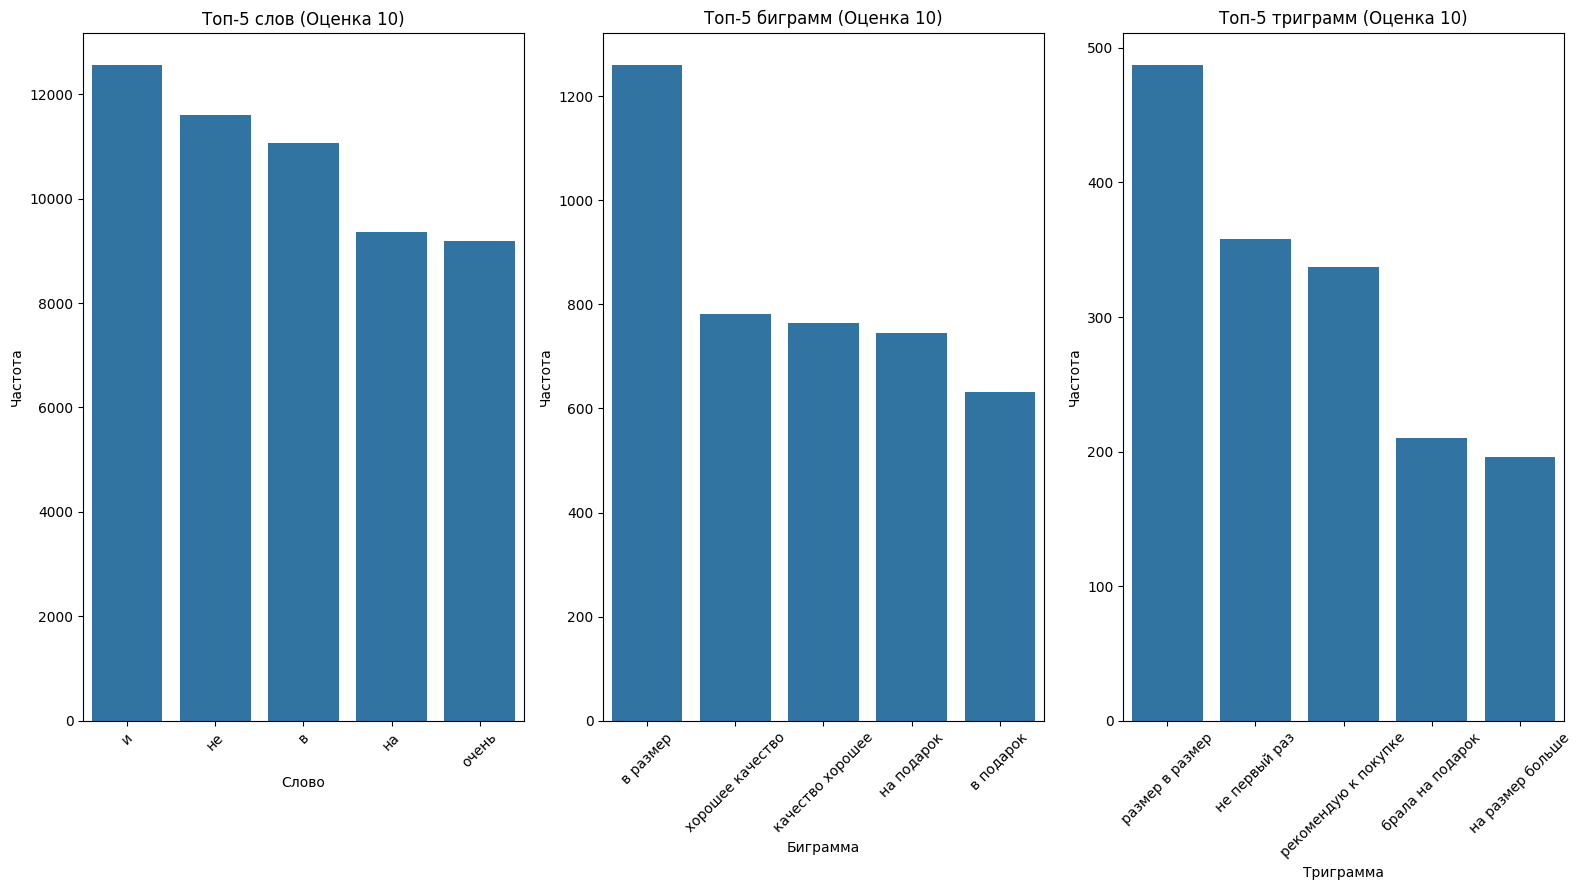

In [59]:
from collections import Counter
from nltk.util import ngrams
import re

def preprocess_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

all_words = []
all_bigrams = []
all_trigrams = []

words_by_rating = {i: [] for i in range(1, 11)}
bigrams_by_rating = {i: [] for i in range(1, 11)}
trigrams_by_rating = {i: [] for i in range(1, 11)}

for review, rating in zip(df['Review'], df['Rating']):
    text = preprocess_text(review)

    words = text.split()

    if len(words) < 1:
      continue

    all_words.extend(words)
    all_bigrams.extend(list(ngrams(words, 2)))
    all_trigrams.extend(list(ngrams(words, 3)))

    words_by_rating[rating].extend(words)
    bigrams_by_rating[rating].extend(list(ngrams(words, 2)))
    trigrams_by_rating[rating].extend(list(ngrams(words, 3)))

print("Топ-20 самых частых слов во всем датасете:")
print(pd.DataFrame(Counter(all_words).most_common(20), columns=['Слово', 'Частота']))

print("\nТоп-20 самых частых биграмм во всем датасете:")
print(pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота']))

print("\nТоп-20 самых частых триграмм во всем датасете:")
print(pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота']))

for rating in range(1, 11):
    print(f"\n\nАнализ для оценки {rating}:")

    print(f"\nТоп-10 самых частых слов для оценки {rating}:")
    print(pd.DataFrame(Counter(words_by_rating[rating]).most_common(10),
                      columns=['Слово', 'Частота']))

    print(f"\nТоп-10 самых частых биграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(10),
                      columns=['Биграмма', 'Частота']))

    print(f"\nТоп-10 самых частых триграмм для оценки {rating}:")
    print(pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(10),
                      columns=['Триграмма', 'Частота']))

top_words = pd.DataFrame(Counter(all_words).most_common(10), columns=['Слово', 'Частота'])
plt.figure(figsize=(16, 9))
sns.barplot(data=top_words, x='Слово', y='Частота')
plt.title('Топ-10 самых частых слов во всем датасете')
plt.xticks(rotation=45)
plt.show()

top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(10), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
plt.figure(figsize=(16, 9))
sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
plt.title('Топ-10 самых частых биграмм во всем датасете')
plt.xticks(rotation=45)
plt.show()

for rating in range(1, 11):
    if words_by_rating[rating]:
        plt.figure(figsize=(16, 9))

        plt.subplot(131)
        top_words = pd.DataFrame(Counter(words_by_rating[rating]).most_common(5),
                               columns=['Слово', 'Частота'])
        sns.barplot(data=top_words, x='Слово', y='Частота')
        plt.title(f'Топ-5 слов (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(132)
        top_bigrams = pd.DataFrame(Counter(bigrams_by_rating[rating]).most_common(5),
                                 columns=['Биграмма', 'Частота'])
        top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_bigrams, x='Биграмма', y='Частота')
        plt.title(f'Топ-5 биграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.subplot(133)
        top_trigrams = pd.DataFrame(Counter(trigrams_by_rating[rating]).most_common(5),
                                  columns=['Триграмма', 'Частота'])
        top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))
        sns.barplot(data=top_trigrams, x='Триграмма', y='Частота')
        plt.title(f'Топ-5 триграмм (Оценка {rating})')
        plt.xticks(rotation=45)

        plt.tight_layout()
        plt.show()

In [60]:
data = df.copy()
data.head()

Name  \
318025                                        Большой куш   
207712         Эфиопия Сидамо Кофе в зернах 1000 г - 1 кг   
384541                                 Американский пирог   
160991                                Куртка демисезонная   
230313  Вешалки плечики для одежды деревянные набор 10 шт   

                                              Description  \
318025  Фрэнки Четыре Пальца должен был переправить кр...   
207712  ETHIOPIA SIDAMO Кофе в зернах  1 кг Эфиопия – ...   
384541                                                NaN   
160991  Весенняя куртка для мальчика от российского бр...   
230313  Представляем вам идеальное решение для организ...   

                                                   Review  Rating  \
318025  Сформировало моё отношение к цыганам и способа...      10   
207712  Кофе понравился, буду брать еще, нет кислинки,...      10   
384541                                гениально\n              10   
160991                     Крутая куртка. Ребенок заценил      10   
230313                                     Замечательные👍      10   

        Review size in symbols  Review size in words  review_length  \
318025                      77                    18           77.0   
207712                      80                    12           80.0   
384541                      18                     9           18.0   
160991                      30                     4           30.0   
230313                      14                     1           14.0   

        has_emoji  emoji_count  Review length  Outlier Sentiment  
318025      False            0             77        0  positive  
207712      False            0             80        0  positive  
384541      False            0             18        0  positive  
160991      False            0             30        0  positive  
230313      False            1             14        0  positive

In [61]:
all_words_without_stops = list(all_words)
for word in set(all_words):
    if word in STOPWORDS_RU:
        all_words_without_stops = [elem for elem in all_words_without_stops if elem != word]

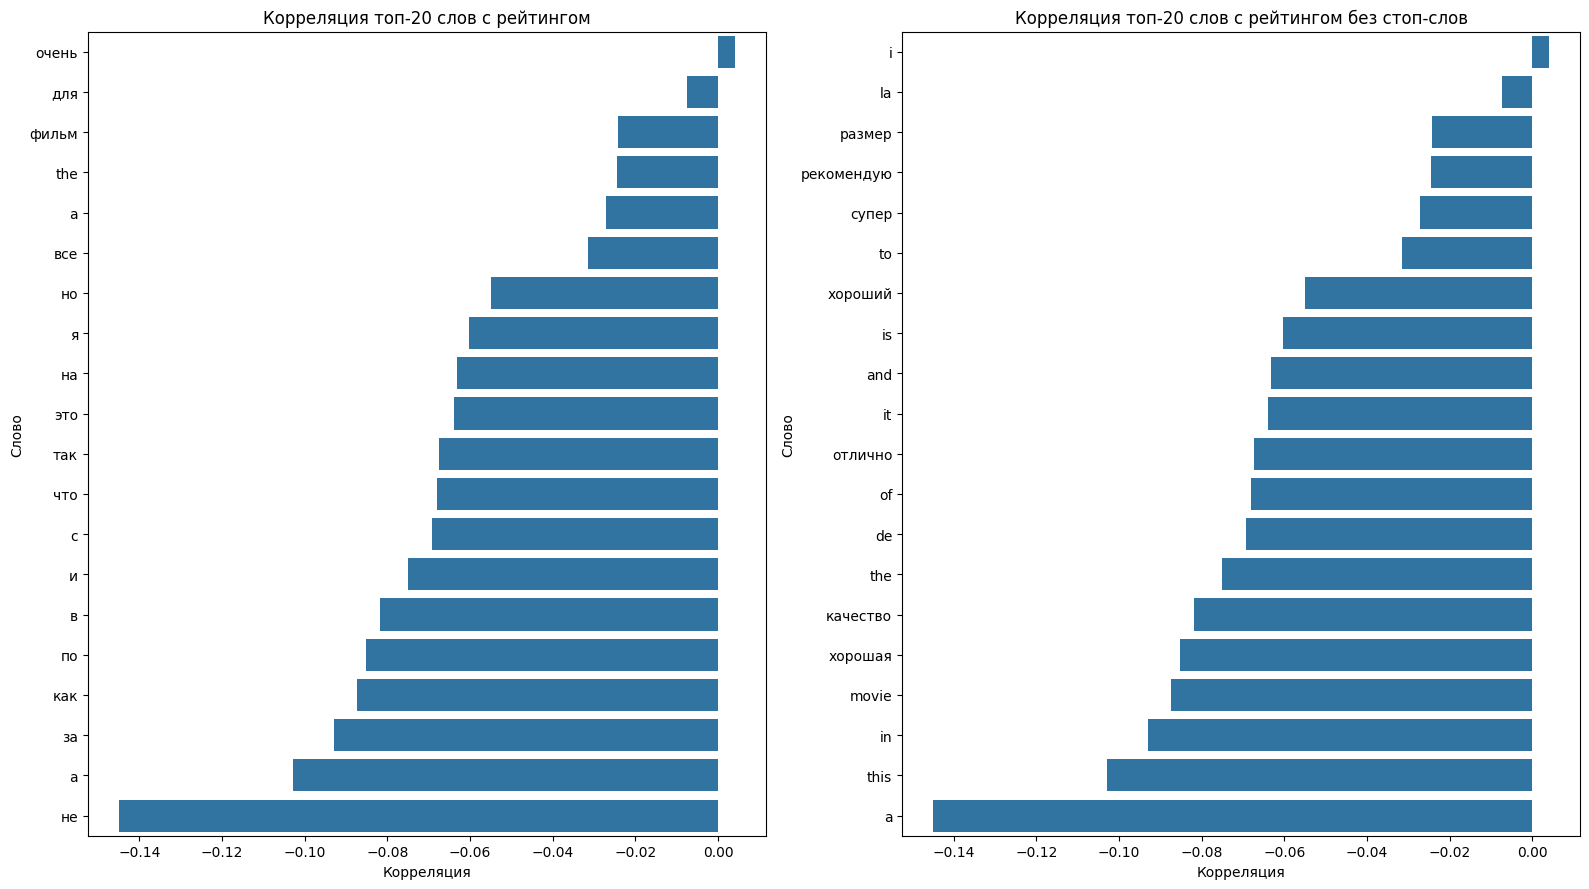

In [62]:
word_counts = Counter(all_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Слово", "Частота"])

correlations = []

for word in common_words["Слово"]:
    data[word] = data["Review"].apply(lambda x: str(x).count(word))
    correlation = data[word].corr(data["Rating"])
    correlations.append(correlation)

common_words["Корреляция"] = correlations

common_words = common_words.sort_values(by="Корреляция", ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 9))
sns.barplot(x="Корреляция", y="Слово", data=common_words, ax=axes[0])


word_counts_without_stops = Counter(all_words_without_stops)
common_words_without_stops = pd.DataFrame(word_counts_without_stops.most_common(20), columns=["Слово", "Частота"])

correlations_without_stops = []

for word in common_words_without_stops["Слово"]:
    data[word] = data["Review"].apply(lambda x: str(x).count(word))
    correlation = data[word].corr(data["Rating"])
    correlations_without_stops.append(correlation)

common_words_without_stops["Корреляция"] = correlations

common_words_without_stops = common_words_without_stops.sort_values(by="Корреляция", ascending=False)

sns.barplot(x="Корреляция", y="Слово", data=common_words_without_stops, ax=axes[1])


axes[0].set_title("Корреляция топ-20 слов с рейтингом")
axes[1].set_title("Корреляция топ-20 слов с рейтингом без стоп-слов")
plt.xlabel("Корреляция")
plt.ylabel("Слово")
plt.tight_layout()
plt.show()

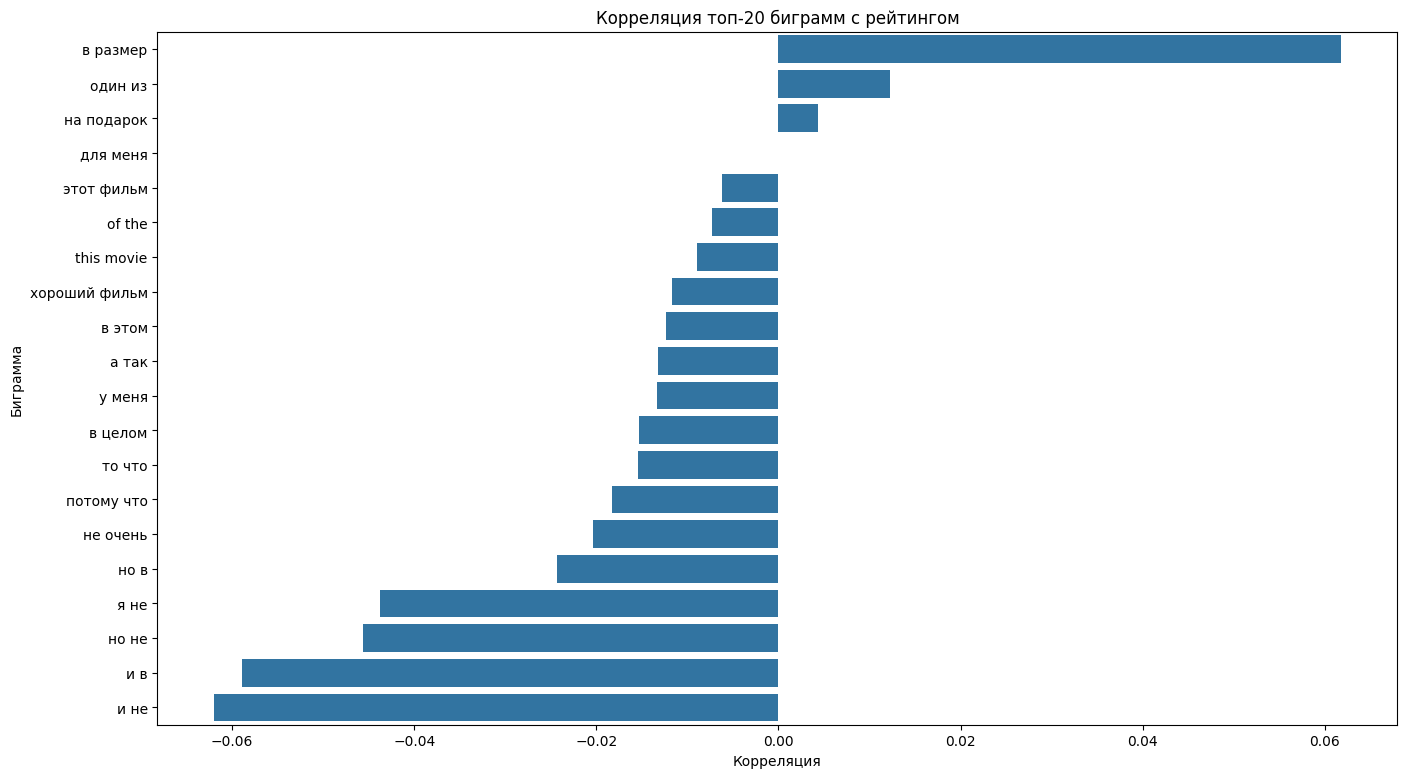

In [63]:
top_bigrams = pd.DataFrame(Counter(all_bigrams).most_common(20), columns=['Биграмма', 'Частота'])
top_bigrams['Биграмма'] = top_bigrams['Биграмма'].apply(lambda x: ' '.join(x))

correlations_bigrams = []

for bigram in top_bigrams['Биграмма']:
    data[bigram] = data["Review"].apply(lambda x: str(x).count(bigram))
    correlation = data[bigram].corr(data['Rating'])
    correlations_bigrams.append(correlation)

top_bigrams['Корреляция'] = correlations_bigrams
top_bigrams = top_bigrams.sort_values(by='Корреляция', ascending=False)

plt.figure(figsize=(16, 9))
sns.barplot(x='Корреляция', y='Биграмма', data=top_bigrams)
plt.title('Корреляция топ-20 биграмм с рейтингом')
plt.xlabel('Корреляция')
plt.ylabel('Биграмма')
plt.show()


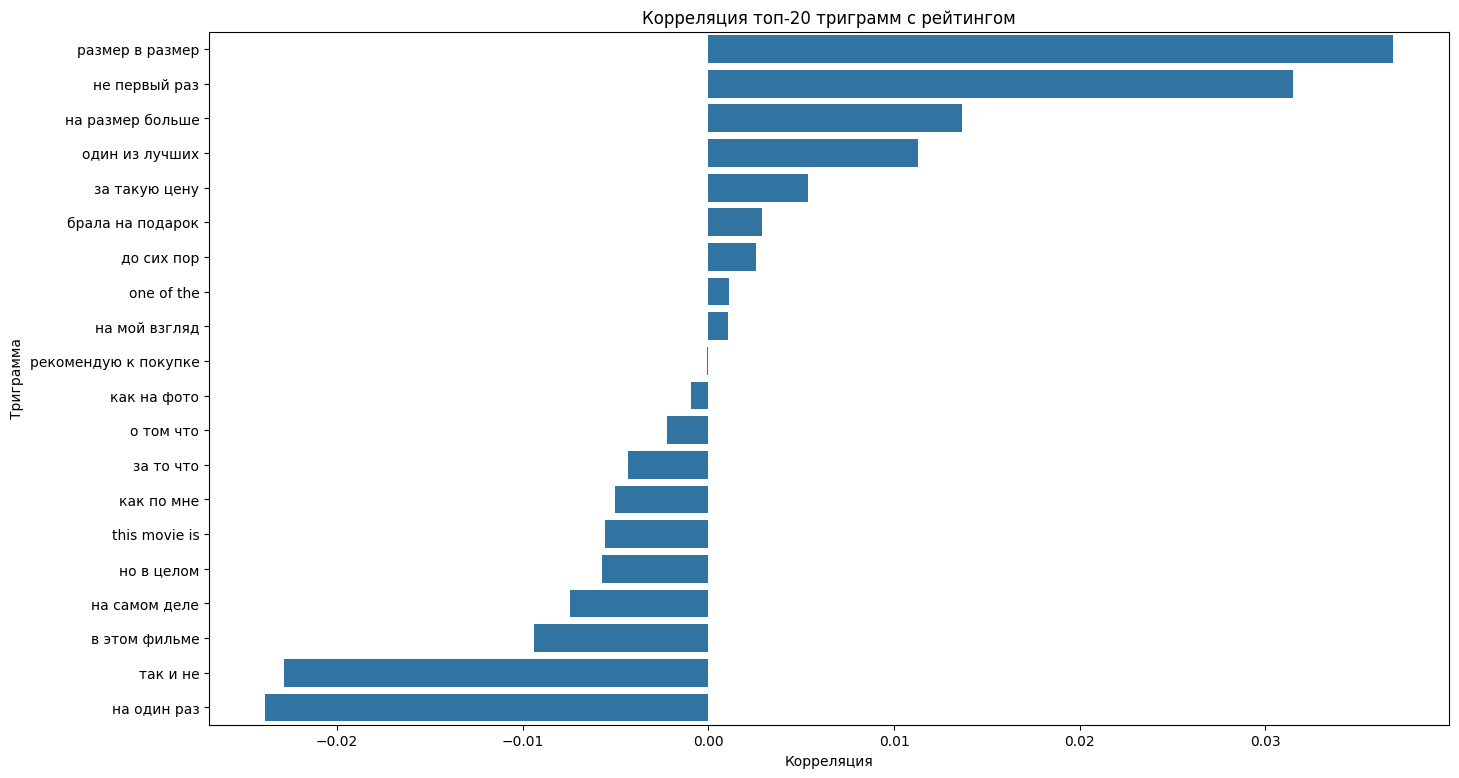

In [64]:
top_trigrams = pd.DataFrame(Counter(all_trigrams).most_common(20), columns=['Триграмма', 'Частота'])
top_trigrams['Триграмма'] = top_trigrams['Триграмма'].apply(lambda x: ' '.join(x))

correlations_trigrams = []
for trigram in top_trigrams['Триграмма']:
    data[trigram] = data["Review"].apply(lambda x: str(x).count(trigram))
    correlation = data[trigram].corr(data['Rating'])
    correlations_trigrams.append(correlation)

top_trigrams['Корреляция'] = correlations_trigrams
top_trigrams = top_trigrams.sort_values(by='Корреляция', ascending=False)

plt.figure(figsize=(16, 9))
sns.barplot(x='Корреляция', y='Триграмма', data=top_trigrams)
plt.title('Корреляция топ-20 триграмм с рейтингом')
plt.xlabel('Корреляция')
plt.ylabel('Триграмма')
plt.show()

Количество длинных отзывов: 12268 из 245723 (4.99%)


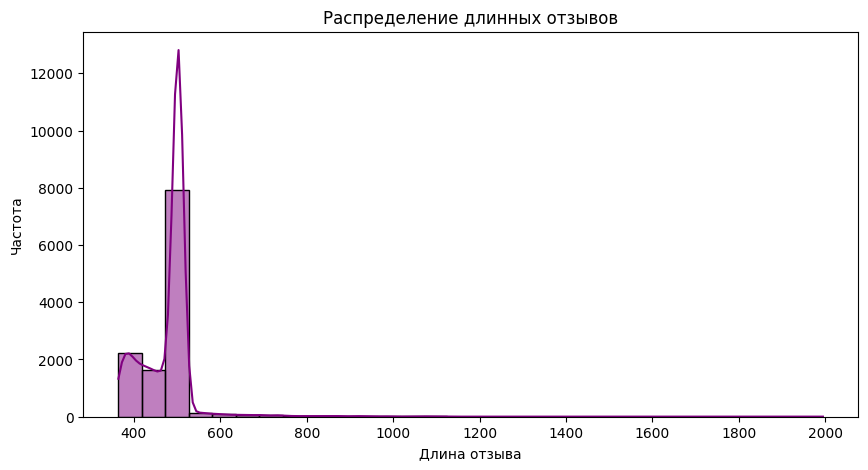

Корреляция между длинными отзывами и оценкой: -0.04


<ipython-input-65-7bc82daf3ee4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlier', y='Rating', data=df, palette=['orange', 'blue'])


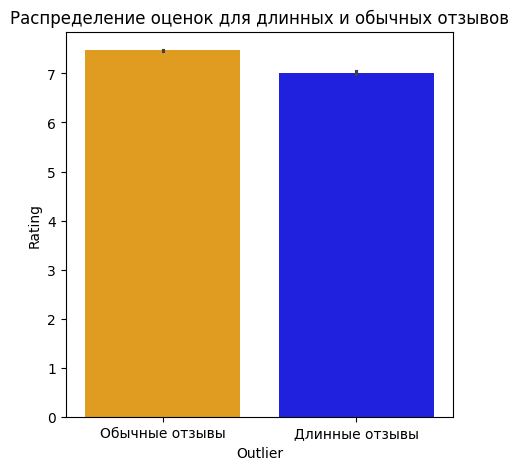

In [65]:
df['Review length'] = df['Review'].apply(lambda x: len(str(x)))
length_threshold = np.percentile(df['Review length'], 95)

df['Outlier'] = (df['Review length'] > length_threshold).astype(int)

outlier_count = df['Outlier'].sum()
total_count = len(df)
print(f'Количество длинных отзывов: {outlier_count} из {total_count} ({outlier_count/total_count:.2%})')

plt.figure(figsize=(10, 5))
sns.histplot(df[df['Outlier'] == 1]['Review length'], bins=30, kde=True, color='purple')
plt.title('Распределение длинных отзывов')
plt.xlabel('Длина отзыва')
plt.ylabel('Частота')
plt.show()

corr_outlier_score = df[['Outlier', 'Rating']].corr().iloc[0, 1]
print(f'Корреляция между длинными отзывами и оценкой: {corr_outlier_score:.2f}')

plt.figure(figsize=(5, 5))
sns.barplot(x='Outlier', y='Rating', data=df, palette=['orange', 'blue'])
plt.xticks([0, 1], ['Обычные отзывы', 'Длинные отзывы'])
plt.title('Распределение оценок для длинных и обычных отзывов')
plt.show()

In [66]:
df_bin = df.dropna(subset=['Sentiment'])
df_bin = df[df['Sentiment'].notnull()]
# display(df_bin)
# print(df_bin['Sentiment'].unique())

In [67]:
model = pipeline(model='seara/rubert-tiny2-russian-sentiment')

def get_sentiment(text):
    prediction = model(str(text))[0]['label']
    return prediction

df_bin_ = df_bin.sample(20000, random_state=42)
df_bin_['Predicted Sentiment'] = df_bin_['Review'].apply(get_sentiment)

df_bin_ = df_bin_[df_bin_['Predicted Sentiment'] != 'neutral']

Device set to use cpu


Accuracy: 0.86
Precision: [0.44727744 0.97421041]
Recall: [0.82012678 0.87020499]
F1-score: [0.57885906 0.9192753 ]


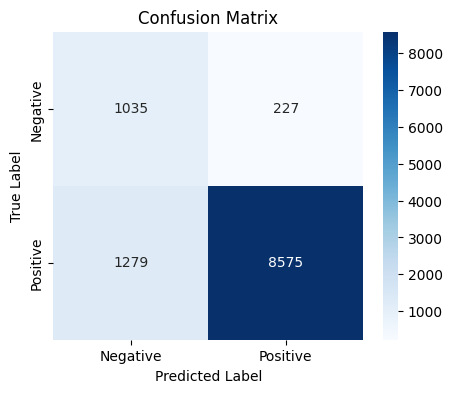

In [68]:
accuracy = accuracy_score(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])
precision, recall, f1, _ = precision_recall_fscore_support(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

cm = confusion_matrix(df_bin_['Sentiment'], df_bin_['Predicted Sentiment'])

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Вывод для датасета WB
Хотим сделать вывод из всего сказанного выше. Начнем с того, что слова в отдельности, даже самые популярные, мало дают понимания об оценке. Однако, если мы говорим о триграммах, а нередко и о биграммах - уже можно наблюдать о явной корреляции с рейтингом отзыва. Также стоит заметить, что самые популярные слова в отдельности зачастую являются вспомогательными частями речи(а-ля предлог, союз или частица). Идем дальше. Видно, что нет как таковой корреляции между количеством символов/смайлов в тексте отзыва и оценкой отзыва. А вот отдельные(на примере самых популярных) смайлы вносят сильное влияние на итоговую оценку, что особенно хорошо видно в "урезанном" датасете. При наличии определенного emoji разброс оценки очень сильно уменьшается. Это основные вывода из всего выше, подробности можно посмотреть на диаграммах непосредственно.

# Вывод для датасета Lamoda
В целом -- вообще ничего удивительного, кроме того что слово тушь имеет наибольшую корреляцию с рейтингом. Никогда бы не подумал что на моих данных это так. Длина отзыва также не особо влияет, да и конкретные слова на самом деле тоже. К сожалению, биграммы и триграммы помогли не существенно, оказалось очень немного сильнокоррелируемых выражений и смайликов. Самый коррелируемый смайлик -- смайлик пальца вверх, имеет корреляцию 0.06. Биграмма "не очень" имеет корреляцию 0.2, в то время как триграмма  "размер в размер" имеет корреляцию в 0.18. На них и стоит обратить внимание. Более подробные выводы представлены в различных диаграммах и графиках, которые можно посмотреть в ноутбуке.

# Вывод All-In-One

На самом деле все не очень то и весело. Наблюдается слабая отрицательная корреляция между длиной отзыва и оценкой, что указывает на тенденцию: более длинные отзывы чаще связаны с низкими оценками. Это подтверждается разницей в средних значениях — очень длинные отзывы имеют среднюю оценку 7.79 против 8.80 у обычных. Однако корреляция смайликов с оценкой крайне низкая (0.073), а влияние отдельных слов и их комбинаций на оценку минимально — максимальные значения не превышают 0.15 для слов, 0.08 для биграмм, 0.05 для триграмм. Про это поговорим отдельнее: слово "не" коррелирует больше всего, причем с явным отрывом от остальных. Биграмма "в размер" имеет самую сильную корреляцию, в то время как "и в" имеет самую отрицательную корреляцию. Триграмма "на один раз" имеет самую сильную отрицательную корреляцию, в 2 раза выше чем у ближайшего преследователя. Если мы смотрим на урезанную выборку, то корреляции сильно отличаются, например сильно коррелируемое слово "качество" (топ2) даже не попало в топ-10.